# Final Project: Fake News Detection

## Introduction
This document presents the project, which aims to design, implement, and evaluate several classifiers to compare their performances in the task of detecting fake news. By systematically developing and testing different classification models, the project seeks to identify the most effective approach for accurately identifying false information in news articles, contributing valuable insights to the field of fake news detection.

### Template used
The template chosen for this project is Fake News Detection (Natural Language Processing).

### Dataset

For this project I will be using multiple datasets:

- ISOT dataset. It was compiled by the University of Victoria ISOT Research Lab and is available for download from their website. It consists of the articles published by Reuters and covers a period from 2015 to 2018. There are 23502 fake news articles and 21417 true news articles in the dataset. It was collected from reputable and unreliable sources: truthful articles were obtained through web crawling Reuters.com, a respected news website, while fake news articles originated from sources flagged by Politifact and Wikipedia as unreliable. These sources were chosen specifically to represent a variety of topics, with a notable focus on political and global news.

- Guardian dataset. It includes roughly 150,000 news articles of different categories obtained through the Guardian's API. It is publicly available and can be downloaded from Kaggle website. The articles span from January 2016 to the end of June 2022, without any restrictions on topics or keywords. For this project I will use only the articles from 'World news' category.

I will use all the articles labeled as 'fake' from the ISOT dataset and supplement them with a selection of 'real' articles from both the ISOT and Guardian datasets.

## Implementation

### Retrieving the Data
I will retrieve datasets from the csv files stored locally on my machine.

Dataset from the University of Victoria ISOT Research Lab includes two csv files with real and fake news articles.

In [2]:
import pandas as pd

isot_true_dataset_path = '../data/ISOT Dataset True.csv'
isot_true_df = pd.read_csv(isot_true_dataset_path)
isot_true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [3]:
isot_fake_dataset_path = '../data/ISOT Dataset Fake.csv'
isot_fake_df = pd.read_csv(isot_fake_dataset_path)
isot_fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


The both files 'ISOT Dataset True' and 'ISOT Dataset Fake' consist of news articles, categorized by the following attributes:

- title: Title of the article.
- text: Main content of the article.
- subject: Subject under which the article falls (e.g., politicsNews, worldnews).
- date: Date when the article was published.

In [4]:
isot_true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [5]:
isot_fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


Add the labels to the articles:

In [6]:
isot_true_df['label'] = 'true'
isot_true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [7]:
isot_fake_df['label'] = 'fake'
isot_fake_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


Combine true and fake articles in one dataframe:

In [8]:
df = pd.concat([isot_fake_df, isot_true_df], ignore_index=True)
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true


In [9]:
df.describe()

,title,text,subject,date,label
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",fake
freq,14,627,11272,182,23481


Check if any values are missing:

In [10]:
df.isna().sum() 

title      0
text       0
subject    0
date       0
label      0
dtype: int64

Check for duplicated entries:

In [11]:
df.duplicated().sum()

209

Check for duplicated 'text' data:

In [12]:
df[df.duplicated(['text'])]

,title,text,subject,date,label
9114,WHY THIS BLUE-COLLAR DEMOCRAT STRONGHOLD Count...,AP News The regulars amble in before dawn and...,politics,"Dec 27, 2017",fake
9738,LEFTIST STORE OWNER Makes Video Asking Libs To...,Things didn t go as well as Nicholle had hoped...,politics,"Oct 6, 2017",fake
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",fake
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",fake
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",fake
...,...,...,...,...,...
44709,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017",true
44744,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",true
44771,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",true
44834,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",true


There are 6252 duplicated entries in the dataset. Let's remove them.

In [13]:
df = df.drop_duplicates(['text'], ignore_index=True)

Confirm there are no duplicated entries left:

In [14]:
df.duplicated().sum()

0

In [15]:
df[df.duplicated(['text'])]

,title,text,subject,date,label


In [16]:
df['label'].value_counts()

label
true    21191
fake    17455
Name: count, dtype: int64

After cleaning the data, it has become more imbalanced. However, I will address this issue when combining this dataset with another one containing true articles from The Guardian.

Check the articles subjects (categories):

In [17]:
grouped_data = df.groupby(['subject', 'label']).size().reset_index(name='count')
grouped_data

,subject,label,count
0,Government News,fake,514
1,News,fake,9050
2,US_News,fake,783
3,left-news,fake,683
4,politics,fake,6425
5,politicsNews,true,11213
6,worldnews,true,9978


Based on the analysis of the dataset, it appears that fake news articles predominantly focus on subjects related to US politics and news. It would be ideal to complement it with the Guardian articles from the same domain. 
Total number of ISOT fake news is 17455, as stated above. So, I will randomply select 9000 ISOT true articles with subject 'politicsNews' and add 8455 true Guardian articles with the same subject if possible.  

Now let's explore Guardian dataset.

In [146]:
guardian_dataset_path = '../data/Guardian Dataset.csv'
guardian_df = pd.read_csv(guardian_dataset_path)
guardian_df

,article_id,sectionName,webTitle,webUrl,bodyContent,webPublicationDate,id
0,us-news/2016/jan/31/iowa-caucus-underdog-candi...,US news,Iowa underdogs put on brave faces despite all ...,https://www.theguardian.com/us-news/2016/jan/3...,As polling day looms and the cameras turn only...,2016-01-31T23:53:37Z,1
1,us-news/2016/jan/31/iowa-caucus-worlds-most-pa...,US news,Iowa caucus: hologram eagle and Jesus star on ...,https://www.theguardian.com/us-news/2016/jan/3...,"In Des Moines on Sunday, the Guardian was give...",2016-01-31T23:46:28Z,2
2,world/2016/jan/31/tanzania-britsh-helicopter-p...,World news,British pilot in Tanzania 'manoeuvred ​to save...,https://www.theguardian.com/world/2016/jan/31/...,A British pilot who was shot dead by an elepha...,2016-01-31T23:43:48Z,3
3,football/2016/jan/31/late-winner-gets-usa-off-...,Football,USA 3-2 Iceland | International friendly match...,https://www.theguardian.com/football/2016/jan/...,USA took a step toward shaking off the ghosts ...,2016-01-31T23:30:49Z,4
4,football/2016/jan/31/blackburn-paul-lambert-ox...,Football,Reinvigorated Paul Lambert reflects after impr...,https://www.theguardian.com/football/2016/jan/...,"The clean-shaven, spectacle free and suspiciou...",2016-01-31T22:30:10Z,5
...,...,...,...,...,...,...,...
149834,world/2022/jun/21/marble-head-of-hercules-pull...,World news,Marble head of Hercules pulled up from Roman s...,https://www.theguardian.com/world/2022/jun/21/...,"For archaeologists, it’s the underwater find t...",2022-06-21T17:31:32Z,149835
149835,music/2022/jun/22/i-got-sick-of-talking-about-...,Music,‘I got sick of talking about myself’: Spacey J...,https://www.theguardian.com/music/2022/jun/22/...,"From under a mop of curls, Caleb Harper – Spac...",2022-06-21T17:30:09Z,149836
149836,australia-news/2022/jun/22/the-small-town-with...,Australia news,The small town with a big potato that inspired...,https://www.theguardian.com/australia-news/202...,"Robertson is a small, pretty town perched on t...",2022-06-21T17:30:09Z,149837
149837,australia-news/2022/jun/22/power-to-ban-citize...,Australia news,Power to ban citizens from re-entering Austral...,https://www.theguardian.com/australia-news/202...,A high court decision striking down the home a...,2022-06-21T17:30:08Z,149838



This dataset consists of news articles from The Guardian, categorized by the following attributes:

- article_id: Unique identifier for each article.
- sectionName: Section under which the article falls (e.g., US news, World news).
- webTitle: Title of the article.
- webUrl: URL of the article.
- bodyContent: Main content of the article.
- webPublicationDate: Date when the article was published.
- id: Unique identifier for tracking purposes.

In [19]:
guardian_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149839 entries, 0 to 149838
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   article_id          149839 non-null  object
 1   sectionName         149839 non-null  object
 2   webTitle            149839 non-null  object
 3   webUrl              149839 non-null  object
 4   bodyContent         148731 non-null  object
 5   webPublicationDate  149839 non-null  object
 6   id                  149839 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 8.0+ MB


Check if any values are missing:

In [20]:
guardian_df.isna().sum() 

article_id               0
sectionName              0
webTitle                 0
webUrl                   0
bodyContent           1108
webPublicationDate       0
id                       0
dtype: int64

In [21]:
guardian_df = guardian_df.dropna()
guardian_df.isna().sum() 

article_id            0
sectionName           0
webTitle              0
webUrl                0
bodyContent           0
webPublicationDate    0
id                    0
dtype: int64

Check for duplicated entries:

In [22]:
guardian_df.duplicated().sum()

0

Check for duplicated 'bodyContent' data:

In [23]:
guardian_df[guardian_df.duplicated(['bodyContent'])]

,article_id,sectionName,webTitle,webUrl,bodyContent,webPublicationDate,id
2546,lifeandstyle/2016/feb/28/observer-killer-sudoku,Life and style,Observer killer sudoku,https://www.theguardian.com/lifeandstyle/2016/...,"Normal Sudoku rules apply, except the numbers ...",2016-02-28T00:01:06Z,2547
2549,lifeandstyle/2016/feb/28/observer-sudoku,Life and style,Observer sudoku,https://www.theguardian.com/lifeandstyle/2016/...,Fill the grid using the numbers 1 to 9. Each n...,2016-02-28T00:01:06Z,2550
3069,technology/2016/feb/26/chatterbox-friday,Games,Chatterbox: Friday,https://www.theguardian.com/technology/2016/fe...,It’s Friday!,2016-02-26T07:00:16Z,3070
5277,lifeandstyle/2016/mar/27/observer-killer-sudoku,Life and style,Observer killer sudoku,https://www.theguardian.com/lifeandstyle/2016/...,"Normal Sudoku rules apply, except the numbers ...",2016-03-27T00:01:01Z,5278
5279,lifeandstyle/2016/mar/27/observer-sudoku,Life and style,Observer sudoku,https://www.theguardian.com/lifeandstyle/2016/...,Fill the grid using the numbers 1 to 9. Each n...,2016-03-27T00:01:01Z,5280
...,...,...,...,...,...,...,...
146597,lifeandstyle/2022/may/29/observer-killer-sudoku,Life and style,Observer killer sudoku,https://www.theguardian.com/lifeandstyle/2022/...,Click here to access the print version. Normal...,2022-05-28T23:01:43Z,146598
146732,lifeandstyle/2022/may/28/which-animals-are-rel...,Life and style,"Which animals are related to the hyrax, and wh...",https://www.theguardian.com/lifeandstyle/2022/...,"Molly Oldfield hosts Everything Under the Sun,...",2022-05-28T06:00:23Z,146733
148947,lifeandstyle/2022/jun/26/observer-sudoku,Life and style,Observer sudoku,https://www.theguardian.com/lifeandstyle/2022/...,Click here to access the print version. Fill t...,2022-06-25T23:01:27Z,148948
148948,lifeandstyle/2022/jun/26/observer-killer-sudoku,Life and style,Observer killer sudoku,https://www.theguardian.com/lifeandstyle/2022/...,Click here to access the print version. Normal...,2022-06-25T23:01:27Z,148949


There are 291 duplicated entries in the Guardian dataset. Let's remove them. 

In [24]:
guardian_df = guardian_df.drop_duplicates(['bodyContent'], ignore_index=True)

Confirm there are no duplicated articles content left:

In [25]:
guardian_df[guardian_df.duplicated(['bodyContent'])]

,article_id,sectionName,webTitle,webUrl,bodyContent,webPublicationDate,id


Confirm the counts of different categories of the articles:

In [26]:
guardian_df['sectionName'].value_counts()

sectionName
World news                                            15474
Opinion                                               11962
Football                                              10722
Sport                                                 10266
Australia news                                         7798
                                                      ...  
Westpac Foundation: Investing in social enterprise        1
Dark Matter Distribution: The Leadership                  1
Specsavers: Liberty London                                1
Westpac Scholars: Rethink tomorrow                        1
Archie Rose: Tailored spirits                             1
Name: count, Length: 159, dtype: int64

Let's check if the dataset contains any articles with 'politics' sectionName:

In [27]:
count_politics = guardian_df['sectionName'].str.contains('politics', case=True, na=False).sum()
count_politics

0

Probably there are articles from 'US news' category?

In [28]:
count_US_news = guardian_df['sectionName'].str.contains('US news', case=True, na=False).sum()
count_US_news

7451

Perfect! There are 7451 US news articles. I will add them to ISOT dataset to balance the data. But first, I will remove unnecessary columns and rename the rest, so they are the same as in ISOT dataset.

In [29]:
guardian_df.drop(columns = ['article_id', 'webUrl', 'webPublicationDate', 'id'], inplace = True)
guardian_df

,sectionName,webTitle,bodyContent
0,US news,Iowa underdogs put on brave faces despite all ...,As polling day looms and the cameras turn only...
1,US news,Iowa caucus: hologram eagle and Jesus star on ...,"In Des Moines on Sunday, the Guardian was give..."
2,World news,British pilot in Tanzania 'manoeuvred ​to save...,A British pilot who was shot dead by an elepha...
3,Football,USA 3-2 Iceland | International friendly match...,USA took a step toward shaking off the ghosts ...
4,Football,Reinvigorated Paul Lambert reflects after impr...,"The clean-shaven, spectacle free and suspiciou..."
...,...,...,...
148435,World news,Marble head of Hercules pulled up from Roman s...,"For archaeologists, it’s the underwater find t..."
148436,Music,‘I got sick of talking about myself’: Spacey J...,"From under a mop of curls, Caleb Harper – Spac..."
148437,Australia news,The small town with a big potato that inspired...,"Robertson is a small, pretty town perched on t..."
148438,Australia news,Power to ban citizens from re-entering Austral...,A high court decision striking down the home a...


In [30]:
guardian_df.rename(columns={
    'webTitle': 'title',
    'bodyContent': 'text',
    'sectionName': 'subject'
}, inplace=True)
guardian_df

,subject,title,text
0,US news,Iowa underdogs put on brave faces despite all ...,As polling day looms and the cameras turn only...
1,US news,Iowa caucus: hologram eagle and Jesus star on ...,"In Des Moines on Sunday, the Guardian was give..."
2,World news,British pilot in Tanzania 'manoeuvred ​to save...,A British pilot who was shot dead by an elepha...
3,Football,USA 3-2 Iceland | International friendly match...,USA took a step toward shaking off the ghosts ...
4,Football,Reinvigorated Paul Lambert reflects after impr...,"The clean-shaven, spectacle free and suspiciou..."
...,...,...,...
148435,World news,Marble head of Hercules pulled up from Roman s...,"For archaeologists, it’s the underwater find t..."
148436,Music,‘I got sick of talking about myself’: Spacey J...,"From under a mop of curls, Caleb Harper – Spac..."
148437,Australia news,The small town with a big potato that inspired...,"Robertson is a small, pretty town perched on t..."
148438,Australia news,Power to ban citizens from re-entering Austral...,A high court decision striking down the home a...


Set articles label to 'true'.

In [96]:
guardian_df['label'] = 'true'
guardian_df.head()

,subject,title,text,label
0,US news,Iowa underdogs put on brave faces despite all ...,As polling day looms and the cameras turn only...,true
1,US news,Iowa caucus: hologram eagle and Jesus star on ...,"In Des Moines on Sunday, the Guardian was give...",true
2,World news,British pilot in Tanzania 'manoeuvred ​to save...,A British pilot who was shot dead by an elepha...,true
3,Football,USA 3-2 Iceland | International friendly match...,USA took a step toward shaking off the ghosts ...,true
4,Football,Reinvigorated Paul Lambert reflects after impr...,"The clean-shaven, spectacle free and suspiciou...",true


Building final dataset.

Final dataset will include all 17455 fake articles from ISOT data, 7451 true articles from Guardian with 'US news' subject, and 10004 true ISOT articles with 'politicsNews' subject.

In [32]:
fake_news = df[df['label'] == 'fake']
true_guardian_news = guardian_df[guardian_df['subject'] == 'US news']
true_ISOT_news = df[(df['label'] == 'true') & (df['subject'] == 'politicsNews')]

# Randomly select 10004 records from the filtered DataFrame
sampled_true_ISOT_news = true_ISOT_news.sample(n=10004, random_state=1)

final_dataset = pd.concat([fake_news, true_guardian_news, sampled_true_ISOT_news], ignore_index=True)
# Shuffle the entries in the final dataset
final_dataset = final_dataset.sample(frac=1, random_state=1).reset_index(drop=True)

final_dataset

,title,text,subject,date,label
0,Colorado lawmaker aims to outlaw pot-laced gum...,(Reuters) - A Colorado lawmaker is trying to o...,politicsNews,"April 8, 2016",true
1,"Trump warns he could end NATO guarantee, scrap...",CLEVELAND (Reuters) - Republican presidential ...,politicsNews,"July 21, 2016",true
2,"Germany's Schulz calls Trump 'un-American', wa...",BERLIN (Reuters) - Germany’s center-left chanc...,politicsNews,"February 1, 2017",true
3,Trump Claims ‘Any Negative Polls’ Are ‘FAKE N...,Donald Trump kicked off his Monday morning by ...,News,"February 6, 2017",fake
4,Trump lawyer Dowd says he drafted tweet on Fly...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"December 3, 2017",true
...,...,...,...,...,...
34905,"Bette Midler SLAMS Trump, Rubio, And Terrible...","Once again, Bette Midler has outdone herself i...",News,"February 28, 2016",fake
34906,Factbox: Issues at stake in Trump-China summit...,(Reuters) - President Donald Trump faces his b...,politicsNews,"April 4, 2017",true
34907,D’oh!: Trump Tells Crowd In Richest County In...,"While in Virginia, GOP presidential nominee Do...",News,"August 3, 2016",fake
34908,NAILS IT! MIKE ROWE On Why Trump Won…Hillary S...,This is fantastic! Mike Rowe tells a fan why T...,politics,"Nov 11, 2016",fake


Remove unnecassary 'subject' and 'date' columns as we do not need them anymore.

In [33]:
final_dataset.drop(columns = ['date', 'subject'], inplace = True)
final_dataset

,title,text,label
0,Colorado lawmaker aims to outlaw pot-laced gum...,(Reuters) - A Colorado lawmaker is trying to o...,true
1,"Trump warns he could end NATO guarantee, scrap...",CLEVELAND (Reuters) - Republican presidential ...,true
2,"Germany's Schulz calls Trump 'un-American', wa...",BERLIN (Reuters) - Germany’s center-left chanc...,true
3,Trump Claims ‘Any Negative Polls’ Are ‘FAKE N...,Donald Trump kicked off his Monday morning by ...,fake
4,Trump lawyer Dowd says he drafted tweet on Fly...,WASHINGTON (Reuters) - U.S. President Donald T...,true
...,...,...,...
34905,"Bette Midler SLAMS Trump, Rubio, And Terrible...","Once again, Bette Midler has outdone herself i...",fake
34906,Factbox: Issues at stake in Trump-China summit...,(Reuters) - President Donald Trump faces his b...,true
34907,D’oh!: Trump Tells Crowd In Richest County In...,"While in Virginia, GOP presidential nominee Do...",fake
34908,NAILS IT! MIKE ROWE On Why Trump Won…Hillary S...,This is fantastic! Mike Rowe tells a fan why T...,fake


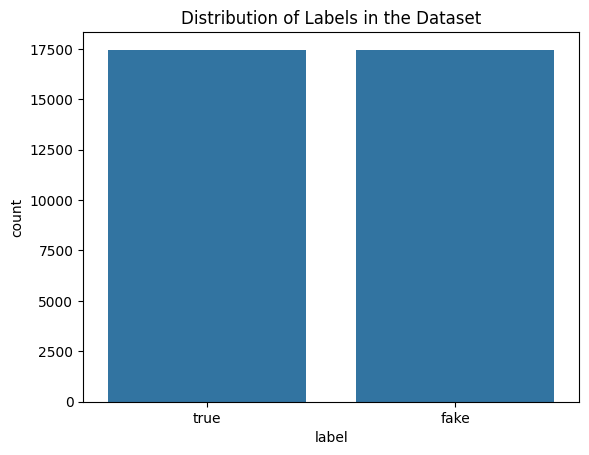

In [34]:
from helpers import display_distribution_of_labels

display_distribution_of_labels(final_dataset)

The dataset is well-structured, with an equal representation of both 'true' and 'fake' labels, providing a robust foundation for training and evaluating a classification model for fake news detection.

### Data preprocessing

I will be using the traditional preprocessing steps which include:
-   Removing special and numeric characters
-   Removing stopwords
-   Removing URLs
-   Text lowercasing
-   Tokenization (will be done by vectorizer)
-   Splitting the dataset into training and testing sets

First, let's check the occurances of the top stopwords and non-stopwords found in news articles.
Stopwords are words that are commonly used in a language but typically do not contribute much to the meaning of a sentence.

We will use custom function *plot_top_words* to plot the frequencies of the top stopwords or non-stopwords found in a set of articles.
The function parameters:
- articles: Pandas Series containing the articles.
- is_stopwords: Boolean indicating whether to count stopwords or non-stopwords.
- number_to_display: Number of top words to visualize.

In [176]:
# TO DELETE

from collections import Counter
from nltk.corpus import stopwords

from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

def plot_top_words(articles, is_stopwords, number_to_display):
    # Create a set of English stopwords from 'stopwords' module of nltk library
    stopwords_set = set(stopwords.words('english'))
    
    # Tokenize the articles into lists of words
    tokenized_articles = articles.str.split()
    
    # Flatten the list of words from all articles
    all_words = [word for articles_words in tokenized_articles for word in articles_words]
    
    # Count the occurrences of either stopwords or non-stopwords
    word_counts = Counter(all_words)
    
    # Filter the 'word_counts' dictionary based on the specified is_stopwords parameter.
    # If 'is_stopwords' is True, keep only words in the 'stopwords_set'. Otherwise, keep only words not in the 'stopwords_set'.
    word_counts = {word: count for word, count in word_counts.items() if word in stopwords_set} if is_stopwords else {word: count for word, count in word_counts.items() if word not in stopwords_set}
    
    # Sort the words by their occurrences in descending order
    top_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:number_to_display]
    
    # Unpack the sorted words and counts into separate lists for plotting
    top_words, counts = zip(*top_words)
    
    # Plot the top words
    plt.figure(figsize=(15, 6))
    plt.bar(top_words, counts)
    plt.ylabel('Frequency')
    plt.xlabel('Words')
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.grid(False)
    if is_stopwords:
        plt.title(f'Top {number_to_display} Stopwords in Articles')
    else:
        plt.title(f'Top {number_to_display} Non-Stopwords in Articles')
    
    plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
    plt.show()

# Example usage
# plot_top_words(final_dataset['text'], is_stopwords=False, number_to_display=25)


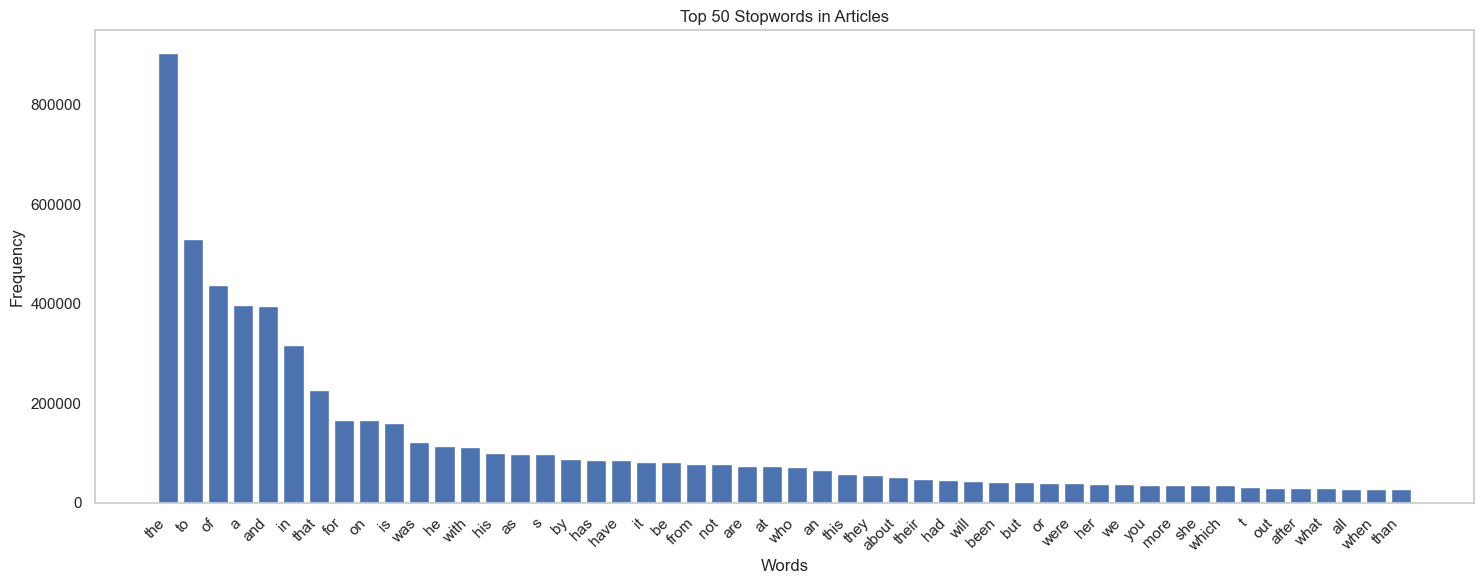

In [177]:
plot_top_words(final_dataset['text'], is_stopwords = True, number_to_display = 50)

In the list of top stopwords we can see the words like 'have' and 'not', 'is', 'was'.
These words can contribute to the overall context and meaning of a sentence. For example, the presence or absence of words like "not" can drastically change the meaning of a statement. Keeping stopwords ensures that the full context is preserved, which can be critical in understanding and detecting subtle cues in fake news.

Based on that observation I will create two versions of the training dataset — one with stopwords and one without. Later, both versions will be used to test the classifiers performance, and the impact of including or excluding stopwords will be observed and analyzed.

The rationale behind this approach is to investigate whether certain stopwords, typically considered as noise and often removed during text processing, carry valuable information in the context of fake news detection task. By comparing the performance of the classifier trained on datasets with and without stopwords, the goal is to assess the significance of these common words in influencing the accuracy of fake news detection.

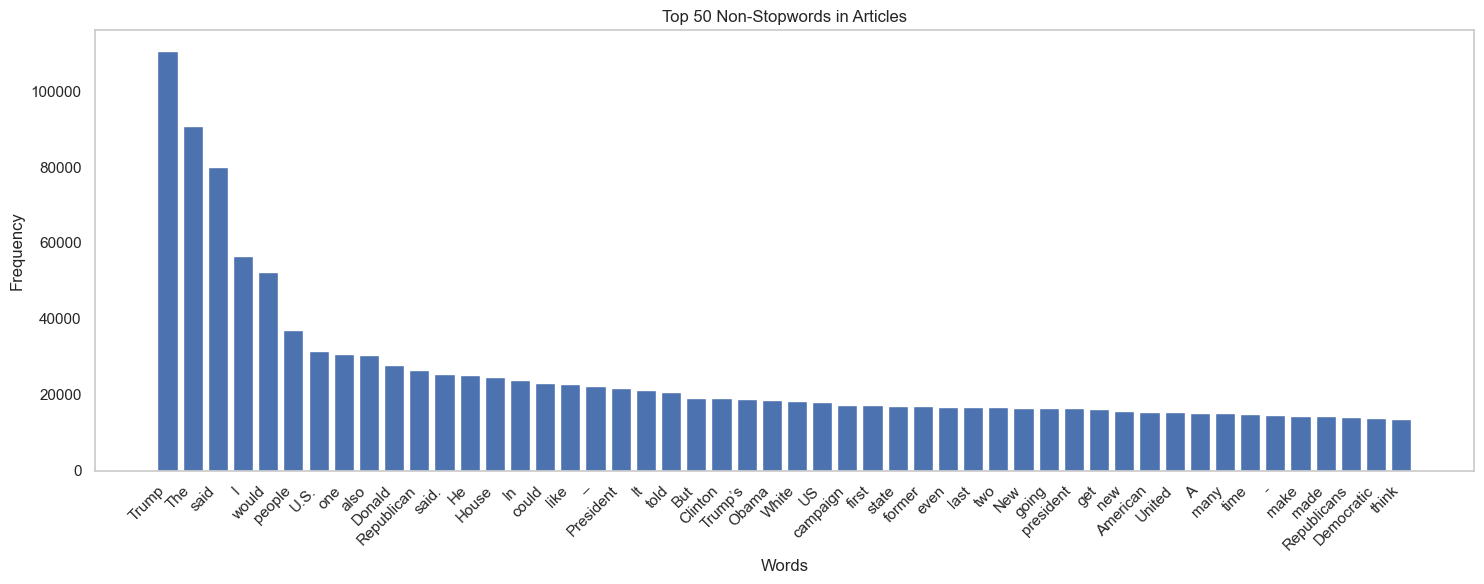

In [178]:
plot_top_words(final_dataset['text'], is_stopwords = False, number_to_display = 50)

The list of top non-stop words indicates a presence of significant amount of special characters like '-'. We will remove these noisy items and other special characters from the dataset to make it more consistent and standardized.

We will use helper functions *denoise_text* and *denoise_text_keep_stopwords* for data cleaning.

In [37]:
from helpers import denoise_text

# Build new dataframe without noise and stopwords
processed_dataframe = final_dataset.copy()
processed_dataframe['text'] = final_dataset['text'].apply(denoise_text)

/Users/user/Downloads/Final-Project-Fake-News-Detection/src/helpers.py:69: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(articles, "html.parser")
/Users/user/Downloads/Final-Project-Fake-News-Detection/src/helpers.py:69: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(articles, "html.parser")


In [38]:
from helpers import denoise_text_keep_stopwords

# Build new dataframe without noise but keep stopwords
processed_dataframe_with_stopwords = final_dataset.copy()
processed_dataframe_with_stopwords['text'] = final_dataset['text'].apply(denoise_text_keep_stopwords)

In [204]:
# BeautifulSoup library for HTML parsing.
from bs4 import BeautifulSoup
# re (regular expression) module for text pattern matching.
import re
# nltk for stopwords
from nltk.corpus import stopwords

# Function to remove HTML tags from articles using BeautifulSoup
def remove_html_tags(articles):
    soup = BeautifulSoup(articles, "html.parser")
    return soup.get_text()

# Function to remove URLs from articles using regular expressions
def remove_urls(articles):
    return re.sub(r'http\S+', '', articles)

# Function to remove special characters and numeric values, leaving only alphabetic characters
def remove_spec_numer_char(articles):
    articles = re.sub(r'[^a-zA-Z]', ' ', articles)
    return articles

# Function to remove stopwords from articles
def remove_stopwords(articles):
    # Create a set of English stopwords from the 'stopwords' module of the nltk library.
    stop_words = set(stopwords.words('english'))
    final_articles_text = [i.strip() for i in articles.split() if i.strip().lower() not in stop_words and i.strip().lower().isalpha()]
    return " ".join(final_articles_text)

# New function to remove the words 'Reuters' or 'reuters' from articles
def remove_reuters(articles):
    return re.sub(r'\b[Rr]euters\b', '', articles)

# Helper function to denoise text
def denoise_text_and_remove_reuters(text):
    text = remove_html_tags(text)
    text = remove_urls(text)
    text = remove_spec_numer_char(text)
    text = remove_reuters(text)  # Include the new function here
    text = remove_stopwords(text)
    return text

# Example usage
#sample_text = "Reuters reported that in 2021, the market grew by 5%. Visit http://example.com for more info."
#cleaned_text = denoise_text(sample_text)
#print(cleaned_text)


In [205]:
# from helpers import denoise_text_and_remove_reuters

# Build new dataframe without noise but keep stopwords
processed_dataframe_without_reuters = final_dataset.copy()
processed_dataframe_without_reuters['text'] = final_dataset['text'].apply(denoise_text_and_remove_reuters)

/var/folders/zk/y5rpd5612h1f5zmx7dm2bry40000gn/T/ipykernel_16566/3383226636.py:10: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

/var/folders/zk/y5rpd5612h1f5zmx7dm2bry40000gn/T/ipykernel_16566/3383226636.py:10: MarkupResemblesLocatorWarning:

The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



To compare the results of the data preprocessing, we can check the article's text under index 1 in the three dataframes:
-   the original dataframe *final_dataset*
-   processed dataframe without stopwords *processed_dataframe*
-   processed dataframe with stopwords *processed_dataframe_with_stopwords*.

In [39]:
final_dataset['text'][1]

'CLEVELAND (Reuters) - Republican presidential nominee Donald Trump said he might abandon NATO’s guarantee of mutual defense and would renegotiate or scrap the NAFTA trade deal if he is elected, drawing fire from some senior Republicans and his Democratic rival. In response to a question about potential Russian aggression against the Baltic states, Trump told the New York Times that  Washington would help defend other NATO members only if they had “fulfilled their obligations to us.”  All three Baltic states, Estonia, Latvia and Lithuania, are former Soviet republics and now NATO members. Trump campaign manager Paul Manafort did not dispute the quotes, saying they were consistent with the candidate’s desire to modernize the United States’ international treaties.  But national security officials and some Republicans said abandoning NATO’s mutual defense guarantee, enshrined in  Article 5 of the treaty, would abandon 66 years of U.S. foreign policy and threaten the world’s most powerful 

In [40]:
processed_dataframe['text'][1]

'CLEVELAND Reuters Republican presidential nominee Donald Trump said might abandon NATO guarantee mutual defense would renegotiate scrap NAFTA trade deal elected drawing fire senior Republicans Democratic rival response question potential Russian aggression Baltic states Trump told New York Times Washington would help defend NATO members fulfilled obligations us three Baltic states Estonia Latvia Lithuania former Soviet republics NATO members Trump campaign manager Paul Manafort dispute quotes saying consistent candidate desire modernize United States international treaties national security officials Republicans said abandoning NATO mutual defense guarantee enshrined Article treaty would abandon years U foreign policy threaten world powerful military alliance Also weighing campaign Democrat Hillary Clinton former secretary state Trump likely opponent Nov election Trump apparently decided America lacks moral authority advance interests values around world Clinton senior foreign policy 

In [41]:
processed_dataframe_with_stopwords['text'][1]

'CLEVELAND  Reuters    Republican presidential nominee Donald Trump said he might abandon NATO s guarantee of mutual defense and would renegotiate or scrap the NAFTA trade deal if he is elected  drawing fire from some senior Republicans and his Democratic rival  In response to a question about potential Russian aggression against the Baltic states  Trump told the New York Times that  Washington would help defend other NATO members only if they had  fulfilled their obligations to us    All three Baltic states  Estonia  Latvia and Lithuania  are former Soviet republics and now NATO members  Trump campaign manager Paul Manafort did not dispute the quotes  saying they were consistent with the candidate s desire to modernize the United States  international treaties   But national security officials and some Republicans said abandoning NATO s mutual defense guarantee  enshrined in  Article   of the treaty  would abandon    years of U S  foreign policy and threaten the world s most powerful 

In [206]:
processed_dataframe_without_reuters['text'][1]

'CLEVELAND Republican presidential nominee Donald Trump said might abandon NATO guarantee mutual defense would renegotiate scrap NAFTA trade deal elected drawing fire senior Republicans Democratic rival response question potential Russian aggression Baltic states Trump told New York Times Washington would help defend NATO members fulfilled obligations us three Baltic states Estonia Latvia Lithuania former Soviet republics NATO members Trump campaign manager Paul Manafort dispute quotes saying consistent candidate desire modernize United States international treaties national security officials Republicans said abandoning NATO mutual defense guarantee enshrined Article treaty would abandon years U foreign policy threaten world powerful military alliance Also weighing campaign Democrat Hillary Clinton former secretary state Trump likely opponent Nov election Trump apparently decided America lacks moral authority advance interests values around world Clinton senior foreign policy adviser 

In [42]:
final_dataset

,title,text,label
0,Colorado lawmaker aims to outlaw pot-laced gum...,(Reuters) - A Colorado lawmaker is trying to o...,true
1,"Trump warns he could end NATO guarantee, scrap...",CLEVELAND (Reuters) - Republican presidential ...,true
2,"Germany's Schulz calls Trump 'un-American', wa...",BERLIN (Reuters) - Germany’s center-left chanc...,true
3,Trump Claims ‘Any Negative Polls’ Are ‘FAKE N...,Donald Trump kicked off his Monday morning by ...,fake
4,Trump lawyer Dowd says he drafted tweet on Fly...,WASHINGTON (Reuters) - U.S. President Donald T...,true
...,...,...,...
34905,"Bette Midler SLAMS Trump, Rubio, And Terrible...","Once again, Bette Midler has outdone herself i...",fake
34906,Factbox: Issues at stake in Trump-China summit...,(Reuters) - President Donald Trump faces his b...,true
34907,D’oh!: Trump Tells Crowd In Richest County In...,"While in Virginia, GOP presidential nominee Do...",fake
34908,NAILS IT! MIKE ROWE On Why Trump Won…Hillary S...,This is fantastic! Mike Rowe tells a fan why T...,fake


In [99]:
processed_dataframe

,title,text,label
0,Colorado lawmaker aims to outlaw pot-laced gum...,Reuters Colorado lawmaker trying outlaw mariju...,1
1,"Trump warns he could end NATO guarantee, scrap...",CLEVELAND Reuters Republican presidential nomi...,1
2,"Germany's Schulz calls Trump 'un-American', wa...",BERLIN Reuters Germany center left chancellor ...,1
3,Trump Claims ‘Any Negative Polls’ Are ‘FAKE N...,Donald Trump kicked Monday morning tweeting so...,0
4,Trump lawyer Dowd says he drafted tweet on Fly...,WASHINGTON Reuters U President Donald Trump pe...,1
...,...,...,...
34905,"Bette Midler SLAMS Trump, Rubio, And Terrible...",Bette Midler outdone lambasting insane Right W...,0
34906,Factbox: Issues at stake in Trump-China summit...,Reuters President Donald Trump faces biggest t...,1
34907,D’oh!: Trump Tells Crowd In Richest County In...,Virginia GOP presidential nominee Donald Trump...,0
34908,NAILS IT! MIKE ROWE On Why Trump Won…Hillary S...,fantastic Mike Rowe tells fan Trump nails Rowe...,0


In [44]:
processed_dataframe_with_stopwords

,title,text,label
0,Colorado lawmaker aims to outlaw pot-laced gum...,Reuters A Colorado lawmaker is trying to o...,true
1,"Trump warns he could end NATO guarantee, scrap...",CLEVELAND Reuters Republican presidential ...,true
2,"Germany's Schulz calls Trump 'un-American', wa...",BERLIN Reuters Germany s center left chanc...,true
3,Trump Claims ‘Any Negative Polls’ Are ‘FAKE N...,Donald Trump kicked off his Monday morning by ...,fake
4,Trump lawyer Dowd says he drafted tweet on Fly...,WASHINGTON Reuters U S President Donald T...,true
...,...,...,...
34905,"Bette Midler SLAMS Trump, Rubio, And Terrible...",Once again Bette Midler has outdone herself i...,fake
34906,Factbox: Issues at stake in Trump-China summit...,Reuters President Donald Trump faces his b...,true
34907,D’oh!: Trump Tells Crowd In Richest County In...,While in Virginia GOP presidential nominee Do...,fake
34908,NAILS IT! MIKE ROWE On Why Trump Won…Hillary S...,This is fantastic Mike Rowe tells a fan why T...,fake


Then I will convert the textual label categories to numerical categories ('true' -> 1, 'fake' -> 0) in all dataframes.

In [45]:
final_dataset.label.replace("true" , 1 , inplace = True)
final_dataset.label.replace("fake" , 0 , inplace = True)
final_dataset.head()

,title,text,label
0,Colorado lawmaker aims to outlaw pot-laced gum...,(Reuters) - A Colorado lawmaker is trying to o...,1
1,"Trump warns he could end NATO guarantee, scrap...",CLEVELAND (Reuters) - Republican presidential ...,1
2,"Germany's Schulz calls Trump 'un-American', wa...",BERLIN (Reuters) - Germany’s center-left chanc...,1
3,Trump Claims ‘Any Negative Polls’ Are ‘FAKE N...,Donald Trump kicked off his Monday morning by ...,0
4,Trump lawyer Dowd says he drafted tweet on Fly...,WASHINGTON (Reuters) - U.S. President Donald T...,1


In [46]:
processed_dataframe.label.replace("true" , 1 , inplace = True)
processed_dataframe.label.replace("fake" , 0 , inplace = True)
processed_dataframe.head()

,title,text,label
0,Colorado lawmaker aims to outlaw pot-laced gum...,Reuters Colorado lawmaker trying outlaw mariju...,1
1,"Trump warns he could end NATO guarantee, scrap...",CLEVELAND Reuters Republican presidential nomi...,1
2,"Germany's Schulz calls Trump 'un-American', wa...",BERLIN Reuters Germany center left chancellor ...,1
3,Trump Claims ‘Any Negative Polls’ Are ‘FAKE N...,Donald Trump kicked Monday morning tweeting so...,0
4,Trump lawyer Dowd says he drafted tweet on Fly...,WASHINGTON Reuters U President Donald Trump pe...,1


In [47]:
processed_dataframe_with_stopwords.label.replace("true" , 1 , inplace = True)
processed_dataframe_with_stopwords.label.replace("fake" , 0 , inplace = True)
processed_dataframe_with_stopwords.head()

,title,text,label
0,Colorado lawmaker aims to outlaw pot-laced gum...,Reuters A Colorado lawmaker is trying to o...,1
1,"Trump warns he could end NATO guarantee, scrap...",CLEVELAND Reuters Republican presidential ...,1
2,"Germany's Schulz calls Trump 'un-American', wa...",BERLIN Reuters Germany s center left chanc...,1
3,Trump Claims ‘Any Negative Polls’ Are ‘FAKE N...,Donald Trump kicked off his Monday morning by ...,0
4,Trump lawyer Dowd says he drafted tweet on Fly...,WASHINGTON Reuters U S President Donald T...,1


Now let's check the number of words in each article after processing with stopwords removal.

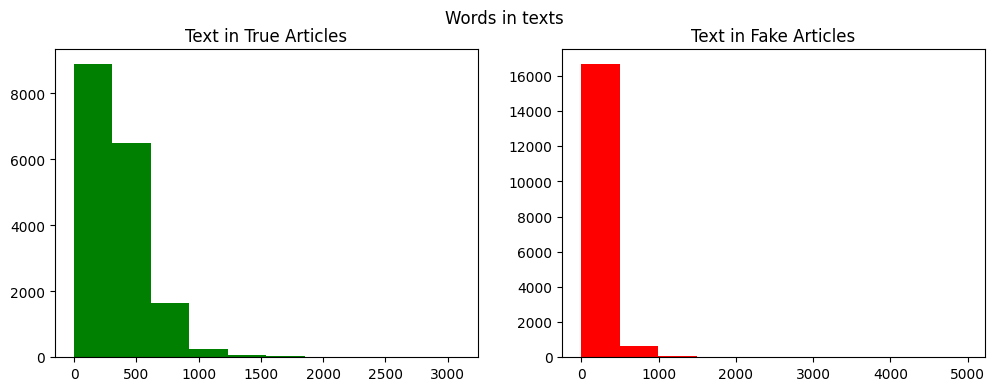

In [48]:
from helpers import display_number_of_words_in_text

# Number of words in each text after processing with stopwords removal
display_number_of_words_in_text(processed_dataframe)

Here we see that the data cleaning process, which involved removing noisy symbols and words, resulted in the majority of articles being relatively short, with lengths of no more than 500 words.

##### Bigrams and Trigrams Analysis
Incorporating n-grams, particularly bi-grams (a pair of consecutive words) and tri-grams (set of three consecutive words), can significantly enhance the performance of a fake news detection model by capturing more contextual information and nuanced patterns in the text that single words (unigrams) might not reveal. 

Let's take a look at the top common bigrams and trigrams found in our news dataset.

We will use custom function *get_top_text_ngrams* to get the top ngrams from the text.
The function takes three parameters:

-   news: Pandas Series containing the news text.
-   n: The number of top n-grams to retrieve.
-   g: The gram value, specifying whether it's unigram (1), bigram (2), trigram (3), etc.

In [49]:
from helpers import get_top_text_ngrams

top_true_news_bigrams = get_top_text_ngrams(processed_dataframe[processed_dataframe['label'] == 1]['text'], 30, 2)
print(top_true_news_bigrams)

{'donald trump': 13451, 'white house': 12455, 'new york': 8828, 'united states': 8691, 'washington reuters': 5461, 'president donald': 4161, 'barack obama': 4012, 'trump said': 3945, 'hillary clinton': 3619, 'year old': 3423, 'last year': 3389, 'supreme court': 3309, 'trump administration': 3277, 'last week': 3146, 'said statement': 2852, 'said would': 2742, 'national security': 2633, 'president barack': 2596, 'trump campaign': 2507, 'secretary state': 2452, 'said trump': 2397, 'attorney general': 2390, 'house representatives': 2313, 'told reporters': 2278, 'vice president': 2172, 'north korea': 2068, 'presidential election': 2014, 'joe biden': 1938, 'justice department': 1829, 'law enforcement': 1799}


And we will use another function *plot_top_ngrams* to plot n-grams dictionary data retrieved from text news.

In [50]:
from helpers import plot_top_ngrams

plot_top_ngrams(top_true_news_bigrams, 'Commmon Bigrams in True News')

Let's use the same functions to also take a look at the top bigrams from fake news and trigrams from true and fake news.

In [51]:
top_fake_news_bigrams = get_top_text_ngrams(processed_dataframe[processed_dataframe['label'] == 0]['text'], 30, 2)
plot_top_ngrams(top_fake_news_bigrams, 'Commmon Bigrams in Fake News')

In [265]:
top_true_news_trigrams = get_top_text_ngrams(processed_dataframe[processed_dataframe['label'] == 0]['text'], 30, 3)
plot_top_ngrams(top_true_news_trigrams, 'Commmon Trigrams in True News')

In [266]:
top_fake_news_trigrams = get_top_text_ngrams(processed_dataframe[processed_dataframe['label'] == 0]['text'], 30, 3)
plot_top_ngrams(top_fake_news_trigrams, 'Commmon Trigrams in Fake News')

##### Splitting the dataset into training and testing sets

In [52]:
processed_text_data = processed_dataframe['text']
processed_text_data

0        Reuters Colorado lawmaker trying outlaw mariju...
1        CLEVELAND Reuters Republican presidential nomi...
2        BERLIN Reuters Germany center left chancellor ...
3        Donald Trump kicked Monday morning tweeting so...
4        WASHINGTON Reuters U President Donald Trump pe...
                               ...                        
34905    Bette Midler outdone lambasting insane Right W...
34906    Reuters President Donald Trump faces biggest t...
34907    Virginia GOP presidential nominee Donald Trump...
34908    fantastic Mike Rowe tells fan Trump nails Rowe...
34909    WASHINGTON Reuters U Treasury Secretary Steven...
Name: text, Length: 34910, dtype: object

In [53]:
processed_label_data = processed_dataframe['label']
processed_label_data

0        1
1        1
2        1
3        0
4        1
        ..
34905    0
34906    1
34907    0
34908    0
34909    1
Name: label, Length: 34910, dtype: int64

I will use the *train_test_split* function from the scikit-learn library to randomly split the dataset into training and testing sets, with 80% of the data used for training and 20% for testing.

Allocating a larger percentage (80%) to the training set will allow the model to learn from a substantial amount of data, improving its ability to capture underlying patterns.

We pass *shuffle = True* parameter to the function so the data should be shuffled before splitting. Shuffling is generally a good practice to avoid any bias in the data order. 

Also, *stratify = processed_sentiment_data* parameter specifies that the data splitting should be stratified based on the label data. This ensures that the class distribution is preserved in both the training and testing sets.

In [54]:
from sklearn.model_selection import train_test_split

# Splitting the dataset without stopwords
train_text_data, test_text_data, train_label_data, test_label_data = train_test_split(processed_text_data, processed_label_data, test_size = 0.20, shuffle = True, random_state = 0, stratify = processed_label_data)

In [55]:
# Splitting the dataset containing stopwords
train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data = train_test_split(processed_dataframe_with_stopwords['text'], processed_dataframe_with_stopwords['label'], test_size = 0.20, shuffle = True, random_state = 0, stratify = processed_dataframe_with_stopwords['label'])

In [208]:
# Splitting the dataset without reuters and stopwords
train_text_without_reuters_data, test_text_without_reuters_data, train_label_wwithout_reuters_data, test_label_without_reuters_data = train_test_split(processed_dataframe_without_reuters['text'], processed_dataframe_without_reuters['label'], test_size = 0.20, shuffle = True, random_state = 0, stratify = processed_dataframe_without_reuters['label'])

### Models trained on the dataset without stopwords

#### Naive Bayes Classifier with TfidfVectorizer (dataset without stopwords) - Baseline Model
The Naive Bayes classifier is frequently chosen as a baseline model in various classification tasks, including fake news detection, due to several inherent advantages it offers:

- Ease of Implementation: Naive Bayes is straightforward to implement, making it a convenient choice for establishing an initial benchmark. Its simplicity is derived from its assumption of feature independence given the class.
- Computational Efficiency: It requires a relatively small amount of computational resources compared to more complex models. This efficiency stems from its ability to make classification decisions based on direct probability comparisons, without requiring iterative parameter adjustments.

I am going to use Grid Search with the default 5-fold cross-validation to optimize the parameters for the classification models. By testing different combinations of parameters, such as n-gram ranges and IDF weighting, Grid Search will evaluate each model's performance across multiple data splits, ensuring robust results. The process will identify the best parameter settings for each model by averaging the performance over the 5 folds, ultimately selecting the most effective configuration for classifying news articles. This method ensures that the chosen model generalizes well to unseen data.

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

from helpers import get_score

nb_tfidf_model = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB())
])
get_score(nb_tfidf_model, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9038599255227728
testing score:0.8805499856774563


In [901]:
from sklearn.model_selection import GridSearchCV

nb_tfidf_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    # Specifies whether to enable IDF weighting in TF-IDF transformation
    'vect__use_idf':[True,False]
}
nb_tfidf_grid = GridSearchCV(nb_tfidf_model, nb_tfidf_parameters)
get_score(nb_tfidf_grid, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.8984173589229447
testing score:0.8854196505299341


In [902]:
nb_tfidf_best_parameters = nb_tfidf_grid.best_params_
nb_tfidf_best_parameters

{'vect__ngram_range': (1, 1), 'vect__use_idf': False}

In [903]:
nb_tfidf_grid_result = pd.DataFrame(nb_tfidf_grid.cv_results_)[['param_vect__ngram_range','param_vect__use_idf','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
nb_tfidf_grid_result

,param_vect__ngram_range,param_vect__use_idf,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,"(1, 1)",True,0.881266,0.003652,2,5.193389,1.143507
1,"(1, 1)",False,0.886171,0.003605,1,4.816371,1.179343
2,"(1, 2)",True,0.858207,0.004318,5,30.031484,4.172092
3,"(1, 2)",False,0.867659,0.003304,3,26.132051,3.319677
4,"(1, 3)",True,0.857813,0.004337,6,71.364222,6.628381
5,"(1, 3)",False,0.864795,0.003448,4,62.045584,5.277052


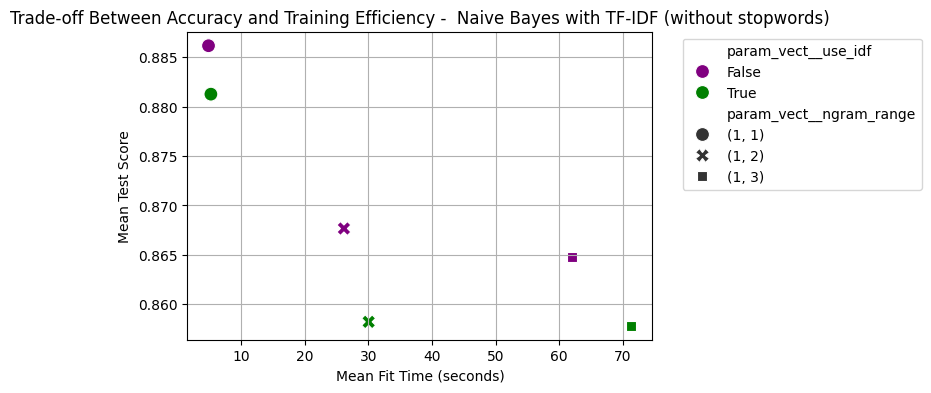

In [904]:
from helpers import plot_accuracy_vs_efficiency

plot_accuracy_vs_efficiency(nb_tfidf_grid_result, 'Naive Bayes with TF-IDF (without stopwords)', 'param_vect__use_idf', 'param_vect__ngram_range')

In [905]:
from sklearn.metrics import classification_report


best_nb_tfidf_model = nb_tfidf_grid.best_estimator_
nb_tfidf_predictions = best_nb_tfidf_model.predict(test_text_data)

labels = ['1','0']
nb_tfidf_report = classification_report(test_label_data, nb_tfidf_predictions, target_names=labels)
print(nb_tfidf_report)

              precision    recall  f1-score   support

           1       0.93      0.83      0.88      3491
           0       0.85      0.94      0.89      3491

    accuracy                           0.89      6982
   macro avg       0.89      0.89      0.89      6982
weighted avg       0.89      0.89      0.89      6982



In [906]:
from helpers import evaluate_model

nb_tfidf_results = evaluate_model(test_label_data, nb_tfidf_predictions)
nb_tfidf_results

{'accuracy': 0.8854196505299341,
 'precision': 0.890041096330626,
 'recall': 0.8854196505299341,
 'f1': 0.8850792376352165}

[[2901  590]
 [ 210 3281]]


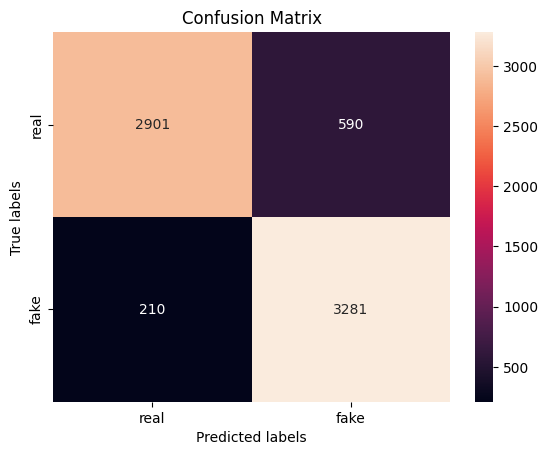

In [907]:
from sklearn import metrics
from helpers import plot_confusion_matrix

nb_tfidf_confusion_matrix = metrics.confusion_matrix(test_label_data, nb_tfidf_predictions, labels=[0,1])
plot_confusion_matrix(nb_tfidf_confusion_matrix)

#### Naive Bayes Classifier with CountVectorizer (dataset without stopwords)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

nb_count_model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])
get_score(nb_count_model, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9365153251217416
testing score:0.9133486107132627


In [383]:
nb_count_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)]
}
nb_count_grid = GridSearchCV(nb_count_model, nb_count_parameters)
get_score(nb_count_grid, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9955242050988256
testing score:0.9169292466342023


In [384]:
nb_count_best_parameters = nb_count_grid.best_params_
print(nb_count_best_parameters)

{'vect__ngram_range': (1, 2)}


In [395]:
nb_count_grid_result = pd.DataFrame(nb_count_grid.cv_results_)[['param_vect__ngram_range','mean_test_score','std_test_score',
                                               'rank_test_score','mean_fit_time','mean_score_time']]
nb_count_grid_result

,param_vect__ngram_range,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,"(1, 1)",0.910985,0.005031,2,4.333299,1.016203
1,"(1, 2)",0.915998,0.003461,1,25.890844,3.309869
2,"(1, 3)",0.905972,0.003805,3,60.133995,5.227873


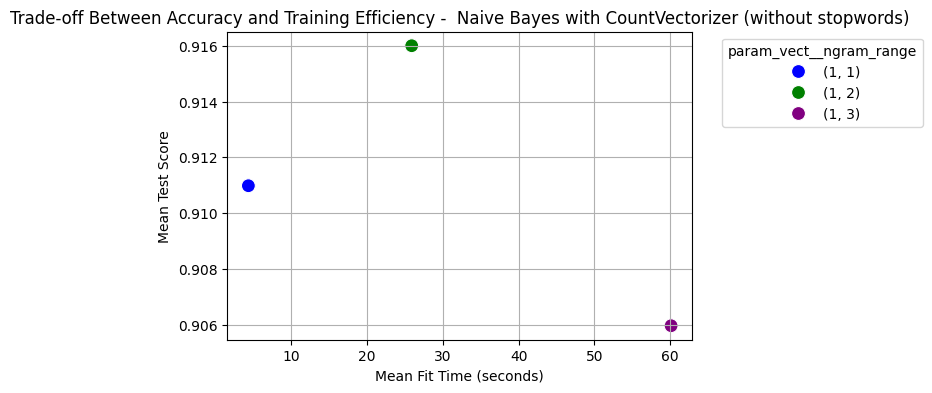

In [701]:
plot_accuracy_vs_efficiency(nb_count_grid_result, 'Naive Bayes with CountVectorizer (without stopwords)', 'param_vect__ngram_range',  'param_vect__ngram_range')

In [386]:
best_nb_count_model = nb_count_grid.best_estimator_
nb_count_predictions = best_nb_count_model.predict(test_text_data)

labels = ['1','0']
nb_count_report = classification_report(test_label_data, nb_count_predictions, target_names=labels)
print(nb_count_report)

              precision    recall  f1-score   support

           1       0.98      0.86      0.91      3491
           0       0.87      0.98      0.92      3491

    accuracy                           0.92      6982
   macro avg       0.92      0.92      0.92      6982
weighted avg       0.92      0.92      0.92      6982



In [387]:
nb_count_results = evaluate_model(test_label_data, nb_count_predictions)
nb_count_results

{'accuracy': 0.9169292466342023,
 'precision': 0.9232917443393592,
 'recall': 0.9169292466342023,
 'f1': 0.9166159100951835}

[[2987  504]
 [  76 3415]]


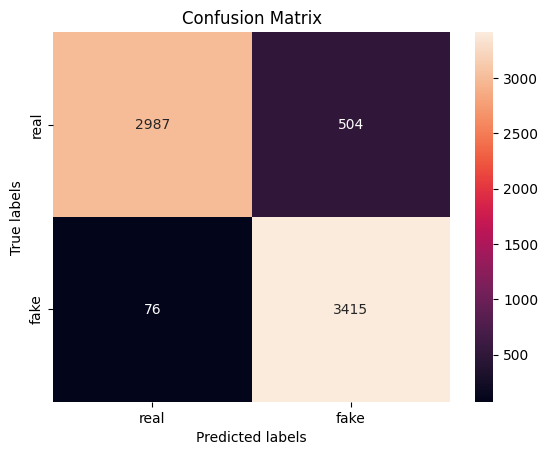

In [422]:
confusion_matrix = metrics.confusion_matrix(test_label_data, nb_count_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### Logistic Regression classifier with TfidfVectorizer (dataset without stopwords)

In [388]:
from sklearn.linear_model import LogisticRegression

lr_tfidf_model = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegression())
])
get_score(lr_tfidf_model, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9788026353480378
testing score:0.9649097679747923


In [389]:
parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'clf__C':[0.1,1,10]
}
lr_tfidf_grid = GridSearchCV(lr_tfidf_model, parameters)
get_score(lr_tfidf_grid, train_text_data, test_text_data, train_label_data, test_label_data)

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/site-packages/sklearn/

training score:0.9983171011171584
testing score:0.9750787739902607


In [390]:
lr_tfidf_best_parameters = lr_tfidf_grid.best_params_
print(lr_tfidf_best_parameters)

{'clf__C': 10, 'vect__ngram_range': (1, 1)}


In [392]:
lr_tfidf_grid_result = pd.DataFrame(lr_tfidf_grid.cv_results_)[['param_vect__ngram_range','param_clf__C','mean_test_score','std_test_score',
'rank_test_score','mean_fit_time','mean_score_time']]
lr_tfidf_grid_result

,param_vect__ngram_range,param_clf__C,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,"(1, 1)",0.1,0.932039,0.002143,7,8.492136,1.697855
1,"(1, 2)",0.1,0.925523,0.002226,8,60.116720,5.321565
2,"(1, 3)",0.1,0.910770,0.002718,9,136.183078,8.941015
3,"(1, 1)",1,0.961222,0.002726,3,7.689603,1.459632
4,"(1, 2)",1,0.954383,0.001451,4,77.170383,5.758593
5,"(1, 3)",1,0.937804,0.000994,6,171.275960,8.387582
6,"(1, 1)",10,0.973324,0.001859,1,9.792086,1.750257
7,"(1, 2)",10,0.966772,0.002304,2,93.966036,5.497493
8,"(1, 3)",10,0.952413,0.002513,5,246.964605,9.306687


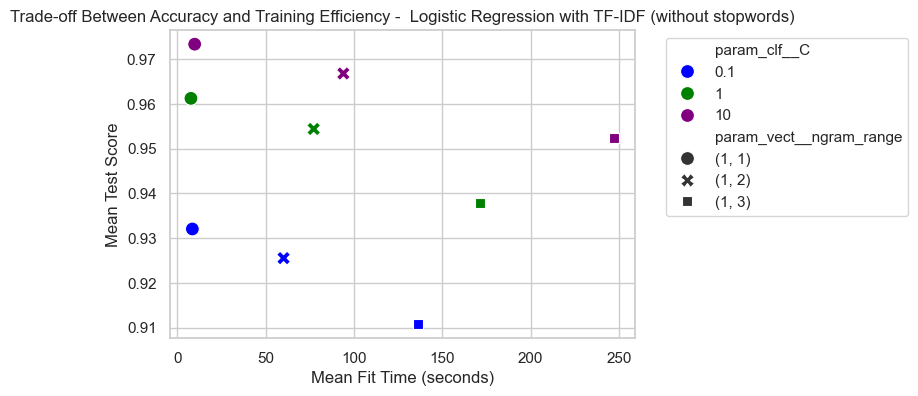

In [393]:
plot_accuracy_vs_efficiency(lr_tfidf_grid_result, 'Logistic Regression with TF-IDF (without stopwords)', 'param_clf__C',  'param_vect__ngram_range')

In [394]:
best_lr_tf_model = lr_tfidf_grid.best_estimator_
lr_tfidf_predictions = best_lr_tf_model.predict(test_text_data)

labels = ['1','0']
lr_tfidf_report = classification_report(test_label_data, lr_tfidf_predictions, target_names=labels)
print(lr_tfidf_report)

              precision    recall  f1-score   support

           1       0.98      0.97      0.98      3491
           0       0.97      0.98      0.98      3491

    accuracy                           0.98      6982
   macro avg       0.98      0.98      0.98      6982
weighted avg       0.98      0.98      0.98      6982



In [395]:
lr_tfidf_results = evaluate_model(test_label_data, lr_tfidf_predictions)
lr_tfidf_results

{'accuracy': 0.9750787739902607,
 'precision': 0.9750914045467552,
 'recall': 0.9750787739902607,
 'f1': 0.9750786083531632}

[[3395   96]
 [  78 3413]]


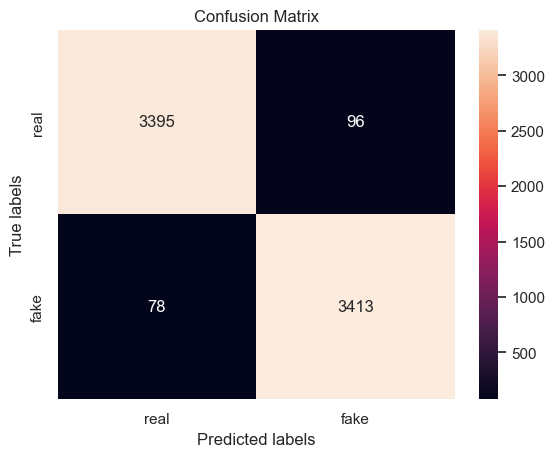

In [396]:
confusion_matrix = metrics.confusion_matrix(test_label_data, lr_tfidf_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### LogisticRegression classifier with CountVectorizer (dataset without stopwords and without 'Reuters')

In [209]:
lr_count_no_reuters_model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])
get_score(lr_count_no_reuters_model, train_text_without_reuters_data, test_text_without_reuters_data, train_label_wwithout_reuters_data, test_label_without_reuters_data)

training score:0.9999641936407906
testing score:0.9636207390432541


In [210]:
lr_count_no_reuters_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'clf__C':[0.1,1,10]
}
lr_count_no_reuters_grid = GridSearchCV(lr_count_no_reuters_model, lr_count_no_reuters_parameters)
get_score(lr_count_no_reuters_grid, train_text_without_reuters_data, test_text_without_reuters_data, train_label_wwithout_reuters_data, test_label_without_reuters_data)

training score:0.9998925809223718
testing score:0.9679175021483816


In [211]:
lr_count_no_reuters_best_parameters = lr_count_no_reuters_grid.best_params_
print(lr_count_no_reuters_best_parameters)

{'clf__C': 0.1, 'vect__ngram_range': (1, 2)}


In [212]:
lr_count_no_reuters_grid_result = pd.DataFrame(lr_count_no_reuters_grid.cv_results_)[['param_vect__ngram_range','param_clf__C','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
lr_count_no_reuters_grid_result

,param_vect__ngram_range,param_clf__C,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,"(1, 1)",0.1,0.964373,0.002473,3,12.046361,1.779782
1,"(1, 2)",0.1,0.965769,0.002005,1,109.096927,4.977427
2,"(1, 3)",0.1,0.963406,0.002345,5,243.427153,7.801858
3,"(1, 1)",1,0.961544,0.002908,8,14.381398,1.746632
4,"(1, 2)",1,0.965017,0.001728,2,120.724536,4.514545
5,"(1, 3)",1,0.962367,0.002431,7,268.314299,7.216681
6,"(1, 1)",10,0.959216,0.003536,9,16.166419,1.777597
7,"(1, 2)",10,0.964229,0.001901,4,134.912034,4.515790
8,"(1, 3)",10,0.962403,0.002363,6,307.246691,7.260841


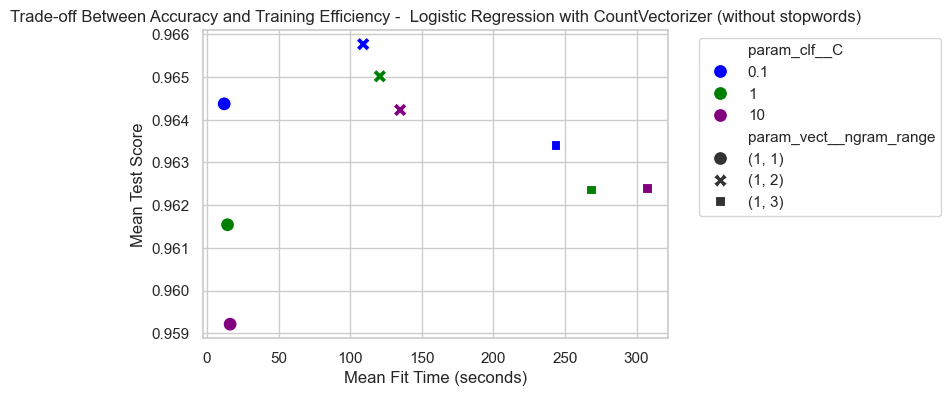

In [213]:
plot_accuracy_vs_efficiency(lr_count_no_reuters_grid_result, 'Logistic Regression with CountVectorizer (without stopwords)', 'param_clf__C',  'param_vect__ngram_range')

In [214]:
best_lr_count_no_reuters_model = lr_count_no_reuters_grid.best_estimator_
lr_count_no_reuters_predictions = best_lr_count_no_reuters_model.predict(test_text_without_reuters_data)

labels = ['1','0']
lr_count_no_reuters_report = classification_report(test_label_without_reuters_data, lr_count_no_reuters_predictions, target_names=labels)
print(lr_count_no_reuters_report)

              precision    recall  f1-score   support

           1       0.97      0.97      0.97      3491
           0       0.97      0.97      0.97      3491

    accuracy                           0.97      6982
   macro avg       0.97      0.97      0.97      6982
weighted avg       0.97      0.97      0.97      6982



In [217]:
lr_count_no_reuters_results = evaluate_model(test_label_without_reuters_data, lr_count_no_reuters_predictions)
lr_count_no_reuters_results

{'accuracy': 0.9679175021483816,
 'precision': 0.9679176557266357,
 'recall': 0.9679175021483816,
 'f1': 0.9679174995158808}

[[3380  111]
 [ 113 3378]]


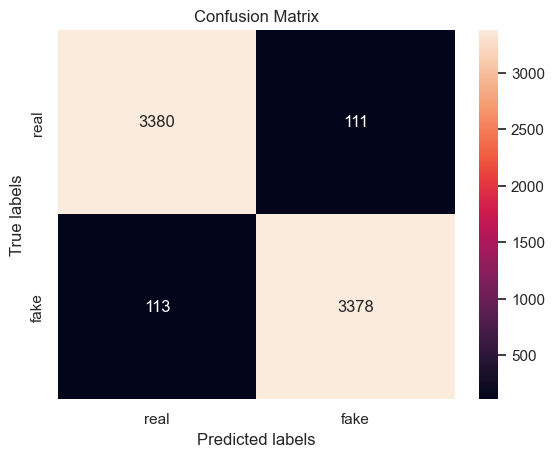

In [216]:
confusion_matrix = metrics.confusion_matrix(test_label_without_reuters_data, lr_count_no_reuters_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### LogisticRegression classifier with CountVectorizer (dataset without stopwords)

In [60]:
lr_count_model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])
get_score(lr_count_model, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9999641936407906
testing score:0.9736465196218849


In [63]:
lr_count_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'clf__C':[0.1,1,10]
}
lr_count_grid = GridSearchCV(lr_count_model, lr_count_parameters)
get_score(lr_count_grid, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9999641936407906
testing score:0.9753652248639358


In [64]:
lr_count_best_parameters = lr_count_grid.best_params_
print(lr_count_best_parameters)

{'clf__C': 1, 'vect__ngram_range': (1, 2)}


In [79]:
lr_count_grid_result = pd.DataFrame(lr_count_grid.cv_results_)[['param_vect__ngram_range','param_clf__C','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
lr_count_grid_result

,param_vect__ngram_range,param_clf__C,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,"(1, 1)",0.1,0.973969,0.001871,7,9.246922,1.230542
1,"(1, 2)",0.1,0.976081,0.001239,2,88.460721,3.162678
2,"(1, 3)",0.1,0.974076,0.001435,6,213.567132,5.290271
3,"(1, 1)",1,0.973217,0.002451,8,10.902129,1.246134
4,"(1, 2)",1,0.976117,0.001391,1,103.920845,3.185249
5,"(1, 3)",1,0.974792,0.001534,4,242.089867,4.966672
6,"(1, 1)",10,0.972751,0.002173,9,12.531441,1.243484
7,"(1, 2)",10,0.976081,0.001621,3,117.356914,3.172549
8,"(1, 3)",10,0.974506,0.001690,5,266.696271,4.955978


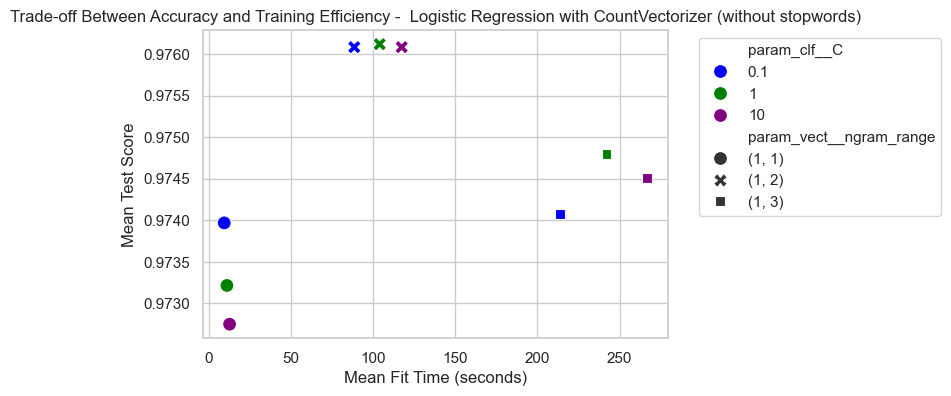

In [80]:
plot_accuracy_vs_efficiency(lr_count_grid_result, 'Logistic Regression with CountVectorizer (without stopwords)', 'param_clf__C',  'param_vect__ngram_range')

In [83]:
best_lr_count_model = lr_count_grid.best_estimator_
lr_count_predictions = best_lr_count_model.predict(test_text_data)

labels = ['1','0']
lr_count_report = classification_report(test_label_data, lr_count_predictions, target_names=labels)
print(lr_count_report)

              precision    recall  f1-score   support

           1       0.97      0.98      0.98      3491
           0       0.98      0.97      0.98      3491

    accuracy                           0.98      6982
   macro avg       0.98      0.98      0.98      6982
weighted avg       0.98      0.98      0.98      6982



In [85]:
# TO DELETE
from helpers import evaluate_model

In [86]:
lr_count_results = evaluate_model(test_label_data, lr_count_predictions)
lr_count_results

{'accuracy': 0.9753652248639358,
 'precision': 0.9753677212397422,
 'recall': 0.9753652248639358,
 'f1': 0.9753651925217434}

[[3409   82]
 [  90 3401]]


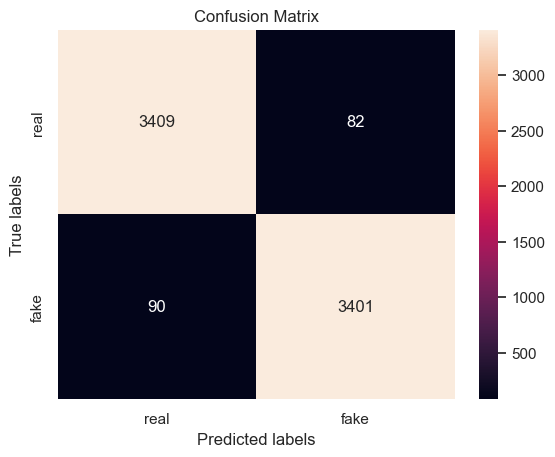

In [89]:
confusion_matrix = metrics.confusion_matrix(test_label_data, lr_count_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### Random Forest classifier with TfidfVectorizer (dataset without stopwords)

In [402]:
from sklearn.ensemble import RandomForestClassifier

rf_tfidf_model = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])
get_score(rf_tfidf_model, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9999641936407906
testing score:0.9418504726439416


In [403]:
rf_tfidf_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'vect__use_idf':[True,False]
}
rf_tfidf_grid = GridSearchCV(rf_tfidf_model, rf_tfidf_parameters)
get_score(rf_tfidf_grid, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9999641936407906
testing score:0.9401317674018905


In [404]:
rf_tfidf_best_parameters = rf_tfidf_grid.best_params_
print(rf_tfidf_best_parameters)

{'vect__ngram_range': (1, 1), 'vect__use_idf': True}


In [405]:
rf_tfidf_grid_result = pd.DataFrame(rf_tfidf_grid.cv_results_)[['param_vect__ngram_range','param_vect__use_idf','mean_test_score','std_test_score',
                                               'rank_test_score','mean_fit_time','mean_score_time']]
rf_tfidf_grid_result

,param_vect__ngram_range,param_vect__use_idf,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,"(1, 1)",True,0.943390,0.001500,1,57.211132,1.795688
1,"(1, 1)",False,0.941528,0.002217,2,54.320357,1.709518
2,"(1, 2)",True,0.931073,0.002209,4,540.152237,7.048542
3,"(1, 2)",False,0.931073,0.003262,3,551.811790,6.376698
4,"(1, 3)",True,0.922980,0.003796,6,1116.868884,11.258897
5,"(1, 3)",False,0.928423,0.004449,5,1122.735309,10.198623


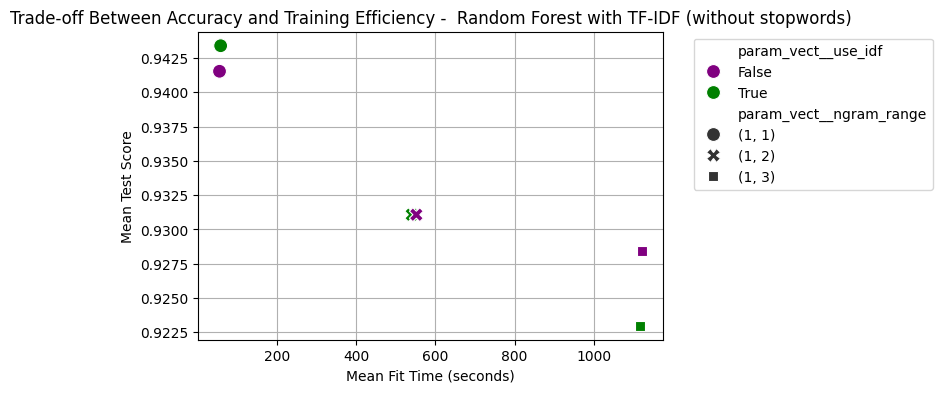

In [704]:
plot_accuracy_vs_efficiency(rf_tfidf_grid_result, 'Random Forest with TF-IDF (without stopwords)', 'param_vect__use_idf',  'param_vect__ngram_range')

In [406]:
best_rf_tfidf_model = rf_tfidf_grid.best_estimator_
rf_tfidf_predictions = best_rf_tfidf_model.predict(test_text_data)

labels = ['1','0']
rf_tfidf_report = classification_report(test_label_data, rf_tfidf_predictions, target_names=labels)
print(rf_tfidf_report)

              precision    recall  f1-score   support

           1       0.95      0.93      0.94      3491
           0       0.93      0.95      0.94      3491

    accuracy                           0.94      6982
   macro avg       0.94      0.94      0.94      6982
weighted avg       0.94      0.94      0.94      6982



In [407]:
rf_tfidf_results = evaluate_model(test_label_data, rf_tfidf_predictions)
rf_tfidf_results

{'accuracy': 0.9401317674018905,
 'precision': 0.940507824918079,
 'recall': 0.9401317674018905,
 'f1': 0.9401189874331937}

[[3231  260]
 [ 158 3333]]


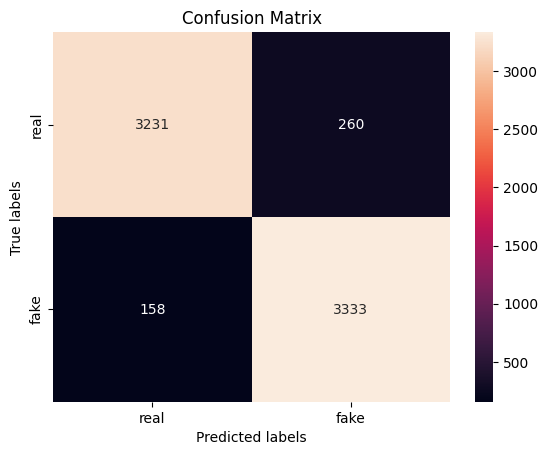

In [424]:
confusion_matrix = metrics.confusion_matrix(test_label_data, rf_tfidf_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### Random Forest classifier with CountVectorizer (dataset without stopwords)

In [408]:
rf_count_model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', RandomForestClassifier())
])
get_score(rf_count_model, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9999641936407906
testing score:0.9415640217702664


In [409]:
rf_count_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)]
}
rf_count_grid = GridSearchCV(rf_count_model, rf_count_parameters)
get_score(rf_count_grid, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9999641936407906
testing score:0.9398453165282155


In [410]:
rf_count_best_parameters = rf_count_grid.best_params_
print(rf_count_best_parameters)

{'vect__ngram_range': (1, 1)}


In [411]:
rf_count_grid_result = pd.DataFrame(rf_count_grid.cv_results_)[['param_vect__ngram_range','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
rf_count_grid_result

,param_vect__ngram_range,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,"(1, 1)",0.945073,0.002990,1,65.165834,1.870890
1,"(1, 2)",0.933400,0.002177,2,600.444068,6.885471
2,"(1, 3)",0.932684,0.001799,3,1168.479469,10.296195


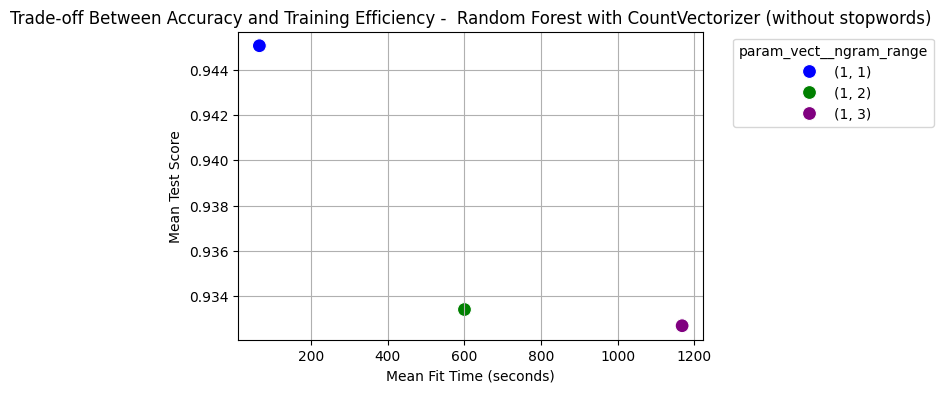

In [705]:
plot_accuracy_vs_efficiency(rf_count_grid_result, 'Random Forest with CountVectorizer (without stopwords)', 'param_vect__ngram_range',  'param_vect__ngram_range')

In [412]:
best_rf_count_model = rf_count_grid.best_estimator_
rf_count_predictions = best_rf_count_model.predict(test_text_data)

labels = ['1','0']
rf_count_report = classification_report(test_label_data, rf_count_predictions, target_names=labels)
print(rf_count_report)

              precision    recall  f1-score   support

           1       0.96      0.92      0.94      3491
           0       0.92      0.96      0.94      3491

    accuracy                           0.94      6982
   macro avg       0.94      0.94      0.94      6982
weighted avg       0.94      0.94      0.94      6982



In [413]:
rf_count_results = evaluate_model(test_label_data, rf_count_predictions)
rf_count_results

{'accuracy': 0.9398453165282155,
 'precision': 0.940658868562756,
 'recall': 0.9398453165282155,
 'f1': 0.939817539052803}

[[3206  285]
 [ 135 3356]]


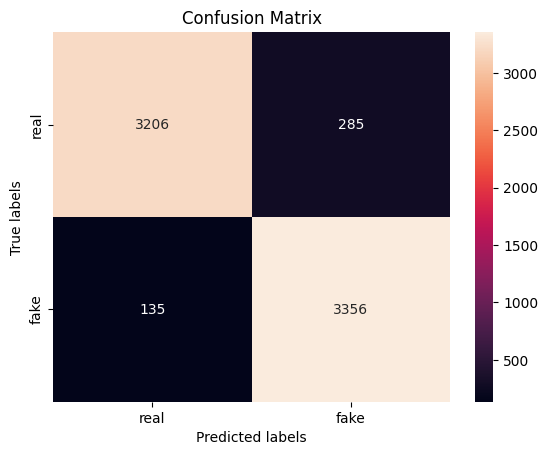

In [425]:
confusion_matrix = metrics.confusion_matrix(test_label_data, rf_count_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### Decision Tree with TfidfVectorizer (dataset without stopwords)

In [426]:
from sklearn.tree import DecisionTreeClassifier

dt_tfidf_model = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier())
])
get_score(dt_tfidf_model, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9999641936407906
testing score:0.9341162990547122


In [427]:
dt_tfidf_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'vect__use_idf':[True,False]
}
dt_tfidf_grid = GridSearchCV(dt_tfidf_model, dt_tfidf_parameters)
get_score(dt_tfidf_grid, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9999641936407906
testing score:0.9437124033228301


In [428]:
dt_tfidf_best_parameters = dt_tfidf_grid.best_params_
print(dt_tfidf_best_parameters)

{'vect__ngram_range': (1, 2), 'vect__use_idf': False}


In [429]:
dt_tfidf_grid_result = pd.DataFrame(dt_tfidf_grid.cv_results_)[['param_vect__ngram_range','param_vect__use_idf','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
dt_tfidf_grid_result

,param_vect__ngram_range,param_vect__use_idf,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,"(1, 1)",True,0.930249,0.004148,5,37.055893,1.304167
1,"(1, 1)",False,0.933472,0.001882,3,35.082374,1.257608
2,"(1, 2)",True,0.933042,0.002220,4,214.775478,4.233738
3,"(1, 2)",False,0.937160,0.002834,1,205.870566,3.373548
4,"(1, 3)",True,0.928673,0.004509,6,468.121136,6.261857
5,"(1, 3)",False,0.936121,0.002998,2,472.441839,5.153827


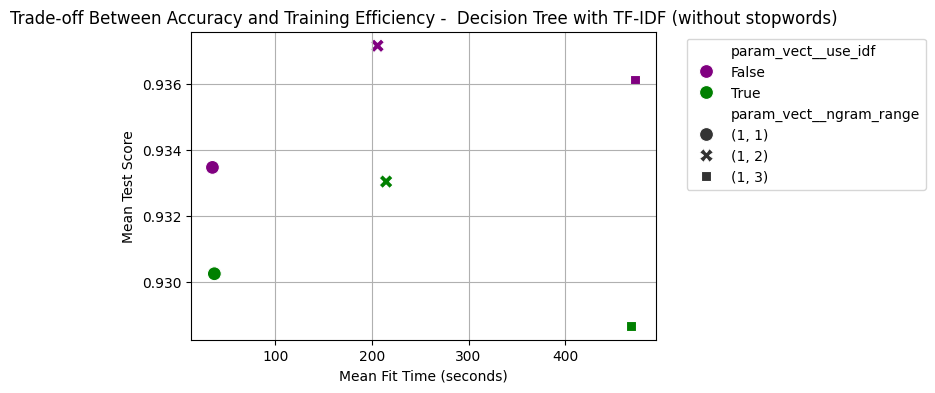

In [706]:
plot_accuracy_vs_efficiency(dt_tfidf_grid_result, 'Decision Tree with TF-IDF (without stopwords)', 'param_vect__use_idf',  'param_vect__ngram_range')

In [430]:
best_dt_tfidf_model = dt_tfidf_grid.best_estimator_
dt_tfidf_predictions = best_dt_tfidf_model.predict(test_text_data)

labels = ['1','0']
dt_tfidf_report = classification_report(test_label_data, dt_tfidf_predictions, target_names=labels)
print(dt_tfidf_report)

              precision    recall  f1-score   support

           1       0.94      0.95      0.94      3491
           0       0.95      0.94      0.94      3491

    accuracy                           0.94      6982
   macro avg       0.94      0.94      0.94      6982
weighted avg       0.94      0.94      0.94      6982



In [431]:
dt_tfidf_results = evaluate_model(test_label_data, dt_tfidf_predictions)
dt_tfidf_results

{'accuracy': 0.9437124033228301,
 'precision': 0.943728460018512,
 'recall': 0.9437124033228301,
 'f1': 0.9437118941144582}

[[3305  186]
 [ 207 3284]]


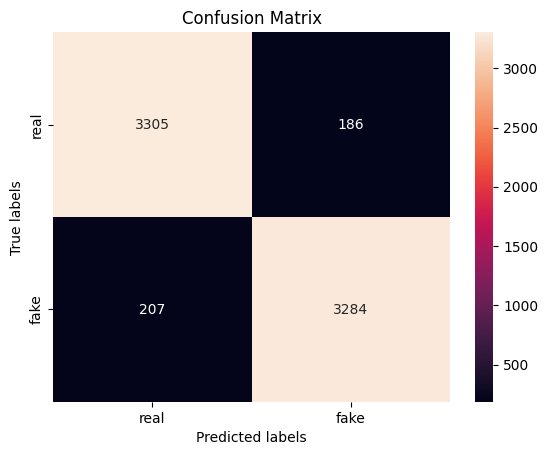

In [432]:
confusion_matrix = metrics.confusion_matrix(test_label_data, dt_tfidf_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### Decision Tree with CountVectorizer (dataset without stopwords)

In [433]:
dt_count_model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', DecisionTreeClassifier())
])
get_score(dt_count_model, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9999641936407906
testing score:0.9475794901174449


In [434]:
dt_count_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)]
}
dt_count_grid = GridSearchCV(dt_count_model, dt_count_parameters)
get_score(dt_count_grid, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9999641936407906
testing score:0.9543110856488112


In [435]:
dt_count_best_parameters = dt_count_grid.best_params_
print(dt_count_best_parameters)

{'vect__ngram_range': (1, 2)}


In [436]:
dt_count_grid_result = pd.DataFrame(dt_count_grid.cv_results_)[['param_vect__ngram_range','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
dt_count_grid_result

,param_vect__ngram_range,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,"(1, 1)",0.940168,0.001927,3,20.908620,1.064158
1,"(1, 2)",0.947293,0.002822,1,186.265106,3.275271
2,"(1, 3)",0.946756,0.002106,2,471.447366,5.166577


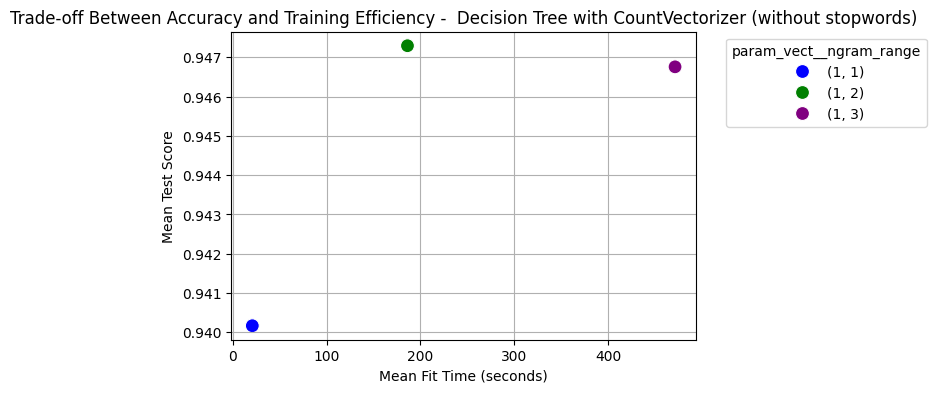

In [707]:
plot_accuracy_vs_efficiency(dt_count_grid_result, 'Decision Tree with CountVectorizer (without stopwords)', 'param_vect__ngram_range',  'param_vect__ngram_range')

In [437]:
best_dt_count_model = dt_count_grid.best_estimator_
dt_count_predictions = best_dt_count_model.predict(test_text_data)

labels = ['1','0']
dt_count_report = classification_report(test_label_data, dt_count_predictions, target_names=labels)
print(dt_count_report)

              precision    recall  f1-score   support

           1       0.95      0.96      0.95      3491
           0       0.96      0.95      0.95      3491

    accuracy                           0.95      6982
   macro avg       0.95      0.95      0.95      6982
weighted avg       0.95      0.95      0.95      6982



In [438]:
dt_count_results = evaluate_model(test_label_data, dt_count_predictions)
dt_count_results

{'accuracy': 0.9543110856488112,
 'precision': 0.9543129122824984,
 'recall': 0.9543110856488112,
 'f1': 0.9543110397239698}

[[3335  156]
 [ 163 3328]]


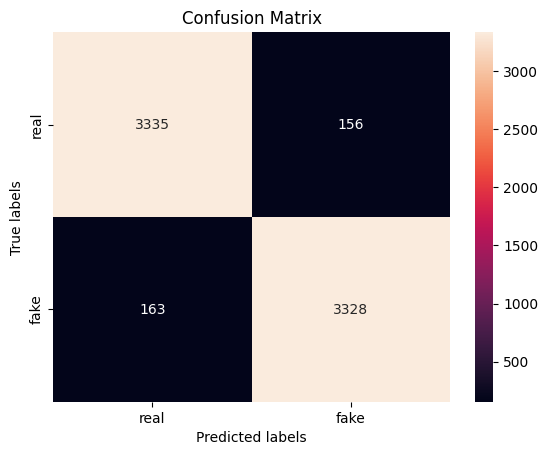

In [439]:
confusion_matrix = metrics.confusion_matrix(test_label_data, dt_count_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### Linear SVC classifier with TfidfVectorizer (dataset without stopwords)

In [181]:
from sklearn.svm import LinearSVC

linearSVC_tfidf_model = Pipeline([
    ('vect', TfidfVectorizer()),
    # Parameter 'dual' dictates whether to solve the dual or primal optimization problem.
    # dual=False is more efficient when the number of samples is greater than the number of features (common in text data).
    ('clf', LinearSVC(dual=False))
])
get_score(linearSVC_tfidf_model, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9991048410197652
testing score:0.9778000572901747


In [182]:
linearSVC_tfidf_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    # The C parameter is a regularization parameter in the LinearSVC model that controls the trade-off between achieving a low error on the training data and minimizing the norm of the weights.
    # [0.1, 1, 10]: These values allow to explore the effect of this regularization strength on the performance of the classifier. Testing multiple values helps in identifying the best compromise between overfitting and underfitting.
    'clf__C':[0.1,1,10] 
}

linearSVC_tfidf_grid = GridSearchCV(linearSVC_tfidf_model, linearSVC_tfidf_parameters)
get_score(linearSVC_tfidf_grid, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9991048410197652
testing score:0.9778000572901747


In [442]:
linearSVC_tfidf_best_parameters = linearSVC_tfidf_grid.best_params_
print(linearSVC_tfidf_best_parameters)

{'clf__C': 1, 'vect__ngram_range': (1, 1)}


In [445]:
linearSVC_tfidf_grid_result = pd.DataFrame(linearSVC_tfidf_grid.cv_results_)[['param_clf__C','param_vect__ngram_range','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
linearSVC_tfidf_grid_result

,param_clf__C,param_vect__ngram_range,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,0.1,"(1, 1)",0.965554,0.002164,5,5.279718,1.249441
1,0.1,"(1, 2)",0.958178,0.001699,8,30.710243,4.118725
2,0.1,"(1, 3)",0.942065,0.001387,9,68.586469,6.113012
3,1,"(1, 1)",0.975723,0.002228,1,5.207876,1.254051
4,1,"(1, 2)",0.972465,0.002815,4,31.609369,4.036243
5,1,"(1, 3)",0.958894,0.002480,7,67.892997,6.096140
6,10,"(1, 1)",0.974828,0.002110,2,6.151323,1.134532
7,10,"(1, 2)",0.974721,0.002336,3,38.950301,3.932076
8,10,"(1, 3)",0.960291,0.003539,6,86.462810,6.254076


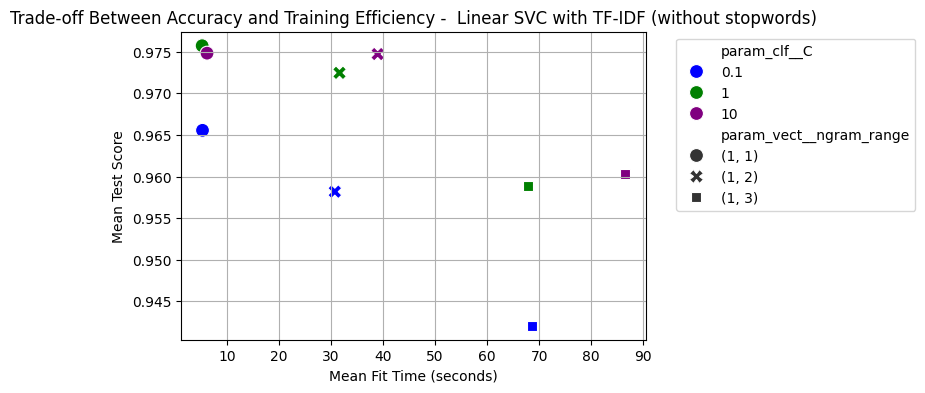

In [708]:
plot_accuracy_vs_efficiency(linearSVC_tfidf_grid_result, 'Linear SVC with TF-IDF (without stopwords)', 'param_clf__C',  'param_vect__ngram_range')

In [446]:
best_linearSVC_tfidf_model = linearSVC_tfidf_grid.best_estimator_
linearSVC_tfidf_predictions = best_linearSVC_tfidf_model.predict(test_text_data)

labels = ['1','0']
linearSVC_tfidf_report = classification_report(test_label_data, linearSVC_tfidf_predictions, target_names=labels)
print(linearSVC_tfidf_report)

              precision    recall  f1-score   support

           1       0.98      0.97      0.98      3491
           0       0.97      0.98      0.98      3491

    accuracy                           0.98      6982
   macro avg       0.98      0.98      0.98      6982
weighted avg       0.98      0.98      0.98      6982



In [447]:
linearSVC_tfidf_results = evaluate_model(test_label_data, linearSVC_tfidf_predictions)
linearSVC_tfidf_results

{'accuracy': 0.9778000572901747,
 'precision': 0.9778173475215481,
 'recall': 0.9778000572901747,
 'f1': 0.9777998564573563}

[[3403   88]
 [  67 3424]]


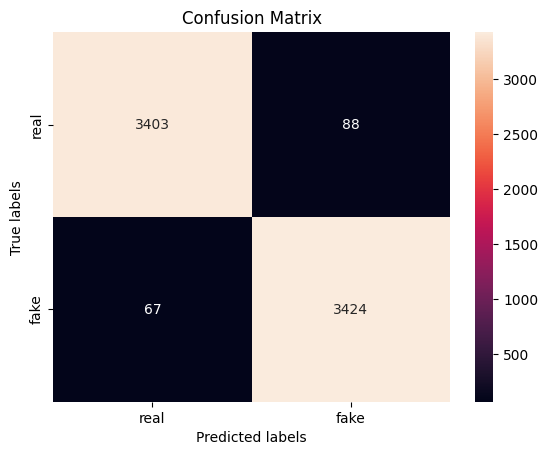

In [448]:
confusion_matrix = metrics.confusion_matrix(test_label_data, linearSVC_tfidf_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### Linear SVC classifier with CountVectorizer (dataset without stopwords)

In [183]:
linearSVC_count_model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LinearSVC(dual=False))
])
get_score(linearSVC_count_model, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9999641936407906
testing score:0.9690633056430822


In [184]:
linearSVC_count_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'clf__C':[0.1,1,10] 
}

linearSVC_count_grid = GridSearchCV(linearSVC_count_model, linearSVC_count_parameters)
get_score(linearSVC_count_grid, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9999641936407906
testing score:0.9742194213692352


In [452]:
linearSVC_count_best_parameters = linearSVC_count_grid.best_params_
print(linearSVC_count_best_parameters)

{'clf__C': 0.1, 'vect__ngram_range': (1, 2)}


In [453]:
linearSVC_count_grid_result = pd.DataFrame(linearSVC_count_grid.cv_results_)[['param_clf__C','param_vect__ngram_range','mean_test_score','std_test_score',
'rank_test_score','mean_fit_time','mean_score_time']]
linearSVC_count_grid_result

,param_clf__C,param_vect__ngram_range,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,0.1,"(1, 1)",0.970639,0.001298,7,6.811140,1.300595
1,0.1,"(1, 2)",0.973754,0.001004,1,34.568891,3.637222
2,0.1,"(1, 3)",0.973002,0.001201,3,74.321384,4.828596
3,1,"(1, 1)",0.969242,0.000790,8,5.048201,1.073023
4,1,"(1, 2)",0.973109,0.001211,2,29.711546,3.102541
5,1,"(1, 3)",0.971999,0.001203,5,76.400943,4.858164
6,10,"(1, 1)",0.969206,0.000691,9,5.324637,1.117271
7,10,"(1, 2)",0.972716,0.001153,4,34.825347,3.112881
8,10,"(1, 3)",0.971928,0.001309,6,67.381940,4.818226


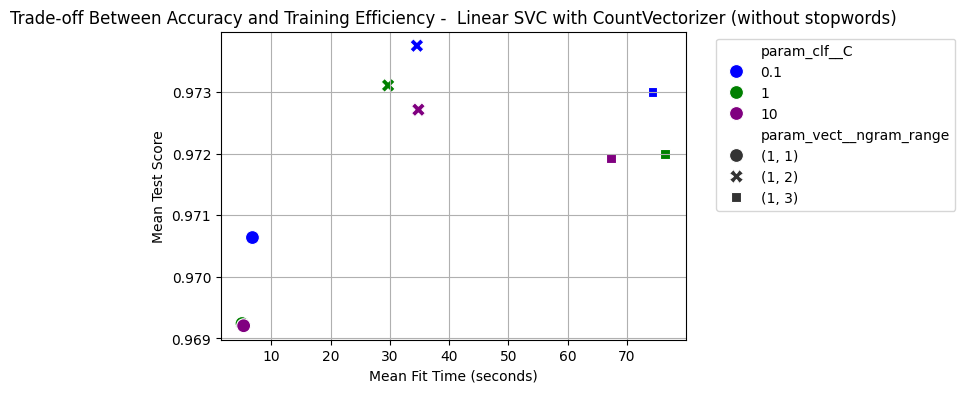

In [709]:
plot_accuracy_vs_efficiency(linearSVC_count_grid_result, 'Linear SVC with CountVectorizer (without stopwords)', 'param_clf__C',  'param_vect__ngram_range')

In [455]:
best_linearSVC_count_model = linearSVC_count_grid.best_estimator_
linearSVC_count_predictions = best_linearSVC_count_model.predict(test_text_data)

labels = ['1','0']
linearSVC_count_report = classification_report(test_label_data, linearSVC_count_predictions, target_names=labels)
print(linearSVC_count_report)

              precision    recall  f1-score   support

           1       0.97      0.98      0.97      3491
           0       0.98      0.97      0.97      3491

    accuracy                           0.97      6982
   macro avg       0.97      0.97      0.97      6982
weighted avg       0.97      0.97      0.97      6982



In [456]:
linearSVC_count_results = evaluate_model(test_label_data, linearSVC_count_predictions)
linearSVC_count_results

{'accuracy': 0.9743626468060728,
 'precision': 0.9743738959358623,
 'recall': 0.9743626468060728,
 'f1': 0.9743624948164578}

[[3410   81]
 [  98 3393]]


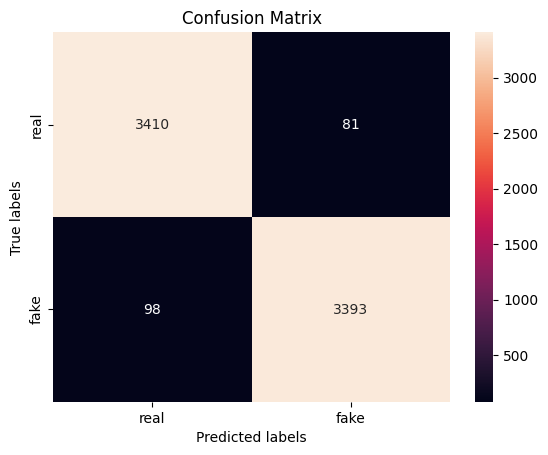

In [457]:
confusion_matrix = metrics.confusion_matrix(test_label_data, linearSVC_count_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### SGD classifier with TfidfVectorizer (dataset without stopwords)

In [461]:
from sklearn.linear_model import SGDClassifier

SGD_tfidf_model = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', SGDClassifier())
])
get_score(SGD_tfidf_model, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.986787453451733
testing score:0.9722142652535091


In [463]:
SGD_tfidf_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    # The different values of alpha are specified to find the optimal amount of regularization that provides the best balance between overfitting and underfitting. 
    'clf__alpha':[0.0001,0.001,0.1]
}

SGD_tfidf_grid = GridSearchCV(SGD_tfidf_model, SGD_tfidf_parameters)
get_score(SGD_tfidf_grid, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9868232598109424
testing score:0.9717845889429962


In [464]:
SGD_tfidf_best_parameters = SGD_tfidf_grid.best_params_
print(SGD_tfidf_best_parameters)

{'clf__alpha': 0.0001, 'vect__ngram_range': (1, 1)}


In [465]:
SGD_tfidf_grid_result = pd.DataFrame(SGD_tfidf_grid.cv_results_)[['param_clf__alpha','param_vect__ngram_range','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
SGD_tfidf_grid_result

,param_clf__alpha,param_vect__ngram_range,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,0.0001,"(1, 1)",0.971104,0.002140,1,4.949983,1.145731
1,0.0001,"(1, 2)",0.966879,0.001785,2,32.229189,4.193834
2,0.0001,"(1, 3)",0.952556,0.002527,3,70.514853,6.618318
3,0.001,"(1, 1)",0.941922,0.002211,4,4.700622,1.167685
4,0.001,"(1, 2)",0.931180,0.001468,5,31.472519,4.317865
5,0.001,"(1, 3)",0.914387,0.001897,6,67.233395,6.308081
6,0.1,"(1, 1)",0.726866,0.112723,7,4.456274,1.024841
7,0.1,"(1, 2)",0.548051,0.064524,9,28.009316,3.931226
8,0.1,"(1, 3)",0.634708,0.154008,8,64.815340,6.302736


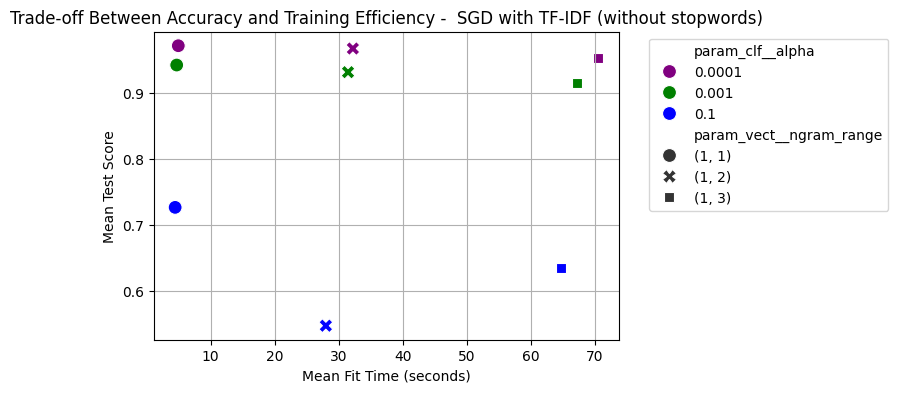

In [710]:
plot_accuracy_vs_efficiency(SGD_tfidf_grid_result, 'SGD with TF-IDF (without stopwords)', 'param_clf__alpha',  'param_vect__ngram_range')

In [466]:
best_SGD_tfidf_model = SGD_tfidf_grid.best_estimator_
SGD_tfidf_predictions = best_SGD_tfidf_model.predict(test_text_data)

labels = ['1','0']
SGD_tfidf_report = classification_report(test_label_data, SGD_tfidf_predictions, target_names=labels)
print(SGD_tfidf_report)

              precision    recall  f1-score   support

           1       0.98      0.97      0.97      3491
           0       0.97      0.98      0.97      3491

    accuracy                           0.97      6982
   macro avg       0.97      0.97      0.97      6982
weighted avg       0.97      0.97      0.97      6982



In [467]:
SGD_tfidf_results = evaluate_model(test_label_data, SGD_tfidf_predictions)
SGD_tfidf_results

{'accuracy': 0.9717845889429962,
 'precision': 0.971849672558964,
 'recall': 0.9717845889429962,
 'f1': 0.9717836159507436}

[[3372  119]
 [  78 3413]]


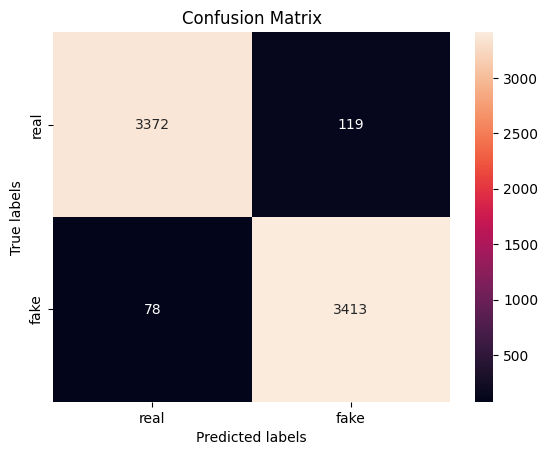

In [468]:
confusion_matrix = metrics.confusion_matrix(test_label_data, SGD_tfidf_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### SGD Classifier with CountVectorizer (dataset without stopwords)

In [469]:
SGD_count_model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', SGDClassifier())
])
get_score(SGD_count_model, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9995345173302779
testing score:0.9716413635061587


In [470]:
SGD_count_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'clf__alpha':[0.0001,0.001,0.1]
}

SGD_count_grid = GridSearchCV(SGD_count_model, SGD_count_parameters)
get_score(SGD_count_grid, train_text_data, test_text_data, train_label_data, test_label_data)

training score:0.9999641936407906
testing score:0.9760813520481237


In [471]:
SGD_count_best_parameters = SGD_count_grid.best_params_
print(SGD_count_best_parameters)

{'clf__alpha': 0.001, 'vect__ngram_range': (1, 3)}


In [472]:
SGD_count_grid_result = pd.DataFrame(SGD_count_grid.cv_results_)[['param_clf__alpha','param_vect__ngram_range','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
SGD_count_grid_result

,param_clf__alpha,param_vect__ngram_range,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,0.0001,"(1, 1)",0.970531,0.001769,7,4.730850,1.058432
1,0.0001,"(1, 2)",0.974363,0.001035,3,26.531277,3.214640
2,0.0001,"(1, 3)",0.974255,0.001730,4,61.055260,4.959579
3,0.001,"(1, 1)",0.973969,0.001266,5,4.617395,1.060843
4,0.001,"(1, 2)",0.975079,0.002871,2,26.329515,3.203620
5,0.001,"(1, 3)",0.975938,0.002410,1,58.751388,4.975782
6,0.1,"(1, 1)",0.964731,0.002250,9,4.603311,1.065521
7,0.1,"(1, 2)",0.970531,0.002306,6,26.341675,3.238745
8,0.1,"(1, 3)",0.970495,0.002501,8,60.751594,4.942146


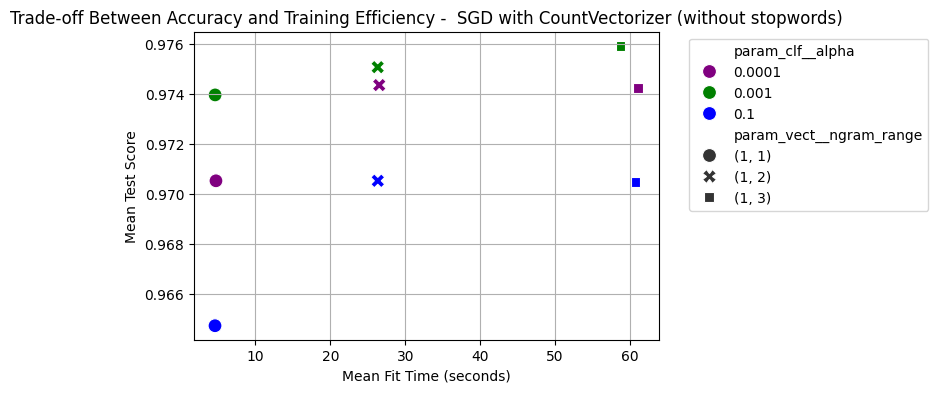

In [711]:
plot_accuracy_vs_efficiency(SGD_count_grid_result, 'SGD with CountVectorizer (without stopwords)', 'param_clf__alpha',  'param_vect__ngram_range')

In [473]:
best_SGD_count_model = SGD_count_grid.best_estimator_
SGD_count_predictions = best_SGD_count_model.predict(test_text_data)

labels = ['1','0']
SGD_count_report = classification_report(test_label_data, SGD_count_predictions, target_names=labels)
print(SGD_count_report)

              precision    recall  f1-score   support

           1       0.98      0.98      0.98      3491
           0       0.98      0.98      0.98      3491

    accuracy                           0.98      6982
   macro avg       0.98      0.98      0.98      6982
weighted avg       0.98      0.98      0.98      6982



In [474]:
SGD_count_results = evaluate_model(test_label_data, SGD_count_predictions)
SGD_count_results

{'accuracy': 0.9760813520481237,
 'precision': 0.9760813911125552,
 'recall': 0.9760813520481237,
 'f1': 0.9760813515574679}

[[3408   83]
 [  84 3407]]


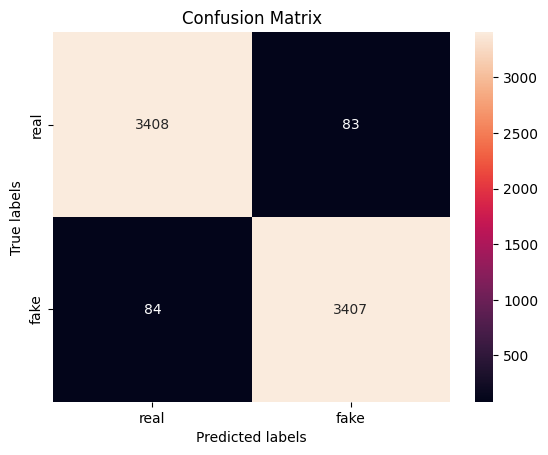

In [475]:
confusion_matrix = metrics.confusion_matrix(test_label_data, SGD_count_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

### Models trained on the dataset with stopwords

#### Naive Bayes Classifier with TfidfVectorizer (dataset with stopwords)

In [485]:
nb_tfidf_model_with_stopwords = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB())
])
get_score(nb_tfidf_model_with_stopwords, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9035734746490977
testing score:0.8851331996562589


In [486]:
nb_tfidf_with_stopwords_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'vect__use_idf':[True,False]
}
nb_tfidf_with_stopwords_grid = GridSearchCV(nb_tfidf_model_with_stopwords, nb_tfidf_with_stopwords_parameters)
get_score(nb_tfidf_with_stopwords_grid, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9044328272701232
testing score:0.8911486680034374


In [487]:
nb_tfidf_with_stopwords_best_parameters = nb_tfidf_with_stopwords_grid.best_params_
nb_tfidf_with_stopwords_best_parameters

{'vect__ngram_range': (1, 2), 'vect__use_idf': False}

In [488]:
nb_tfidf_grid_with_stopwords_result = pd.DataFrame(nb_tfidf_with_stopwords_grid.cv_results_)[['param_vect__ngram_range','param_vect__use_idf','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
nb_tfidf_grid_with_stopwords_result

,param_vect__ngram_range,param_vect__use_idf,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,"(1, 1)",True,0.882340,0.004270,3,6.732835,1.664866
1,"(1, 1)",False,0.879941,0.003463,4,6.575809,1.622183
2,"(1, 2)",True,0.866084,0.002241,5,34.054101,6.631175
3,"(1, 2)",False,0.890433,0.002179,1,29.382821,5.389225
4,"(1, 3)",True,0.858171,0.002963,6,86.841199,11.422444
5,"(1, 3)",False,0.888750,0.001493,2,76.210045,9.085567


I will use custom function *plot_accuracy_vs_efficiency* to build a scatter plot for displaying accuracy and training efficiency.

Each point represents a combination of param_clf__C and param_vect__ngram_range, plotted against its mean_test_score and mean_fit_time.

The color (hue) distinguishes different values of C, and the marker style (style) distinguishes different n-gram ranges, making it easy to see how these parameters influence performance and efficiency.
Size (s): Adjusts the size of the markers to make the plot clearer.

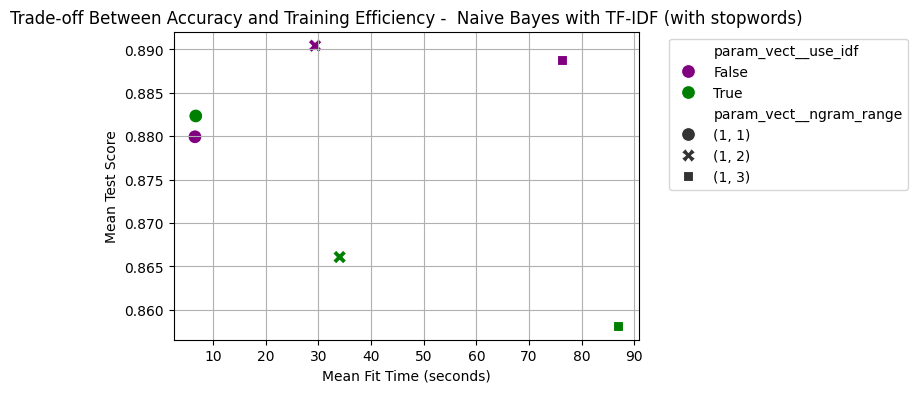

In [712]:
plot_accuracy_vs_efficiency(nb_tfidf_grid_with_stopwords_result, 'Naive Bayes with TF-IDF (with stopwords)', 'param_vect__use_idf', 'param_vect__ngram_range')

In [494]:
best_nb_tfidf_with_stopwords_model = nb_tfidf_with_stopwords_grid.best_estimator_
nb_tfidf_with_stopwords_predictions = best_nb_tfidf_with_stopwords_model.predict(test_text_with_stopwords_data)

labels = ['1','0']
nb_tfidf_with_stopwords_report = classification_report(test_label_with_stopwords_data, nb_tfidf_with_stopwords_predictions, target_names=labels)
print(nb_tfidf_with_stopwords_report)

              precision    recall  f1-score   support

           1       0.93      0.85      0.89      3491
           0       0.86      0.94      0.90      3491

    accuracy                           0.89      6982
   macro avg       0.89      0.89      0.89      6982
weighted avg       0.89      0.89      0.89      6982



In [495]:
nb_tfidf_with_stopwords_results = evaluate_model(test_label_with_stopwords_data, nb_tfidf_with_stopwords_predictions)
nb_tfidf_with_stopwords_results

{'accuracy': 0.8911486680034374,
 'precision': 0.8943389514897855,
 'recall': 0.8911486680034374,
 'f1': 0.8909280643871226}

[[2954  537]
 [ 223 3268]]


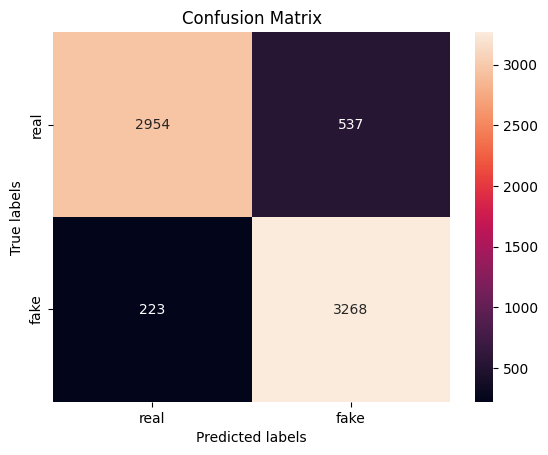

In [496]:
confusion_matrix = metrics.confusion_matrix(test_label_with_stopwords_data, nb_tfidf_with_stopwords_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### Naive Bayes Classifier with CountVectorizer (dataset with stopwords)

In [492]:
nb_count_model_with_stopwords = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])
get_score(nb_count_model_with_stopwords, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9334359782297336
testing score:0.9120595817817244


In [493]:
nb_count_with_stopwords_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)]
}
nb_count_with_stopwords_grid = GridSearchCV(nb_count_model_with_stopwords, nb_count_with_stopwords_parameters)
get_score(nb_count_with_stopwords_grid, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9845674591807505
testing score:0.9205098825551418


In [497]:
nb_count_with_stopwords_best_parameters = nb_count_with_stopwords_grid.best_params_
nb_count_with_stopwords_best_parameters

{'vect__ngram_range': (1, 2)}

In [537]:
nb_count_grid_with_stopwords_result = pd.DataFrame(nb_count_with_stopwords_grid.cv_results_)[['param_vect__ngram_range','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
nb_count_grid_with_stopwords_result

,param_vect__ngram_range,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,"(1, 1)",0.910699,0.003444,2,7.745594,2.020865
1,"(1, 2)",0.920724,0.002765,1,31.566670,5.978665
2,"(1, 3)",0.910054,0.001410,3,78.439710,9.490891


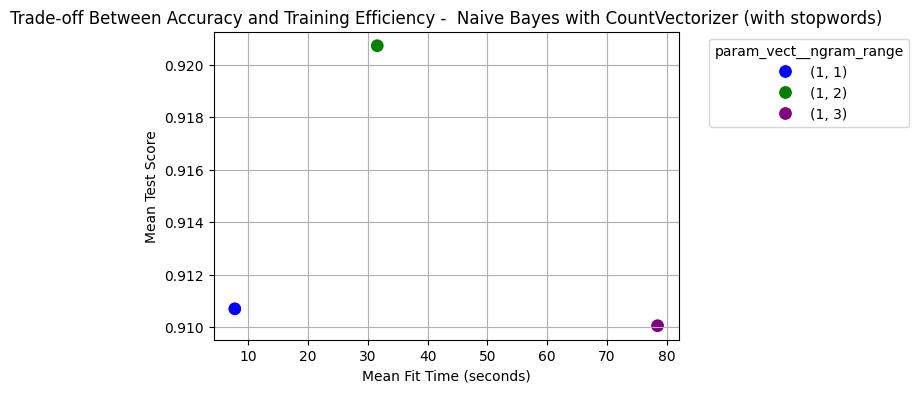

In [713]:
plot_accuracy_vs_efficiency(nb_count_grid_with_stopwords_result, 'Naive Bayes with CountVectorizer (with stopwords)', 'param_vect__ngram_range',  'param_vect__ngram_range')

In [499]:
best_nb_count_with_stopwords_model = nb_count_with_stopwords_grid.best_estimator_
nb_count_with_stopwords_predictions = best_nb_count_with_stopwords_model.predict(test_text_with_stopwords_data)

labels = ['1','0']
nb_count_with_stopwords_report = classification_report(test_label_with_stopwords_data, nb_count_with_stopwords_predictions, target_names=labels)
print(nb_count_with_stopwords_report)

              precision    recall  f1-score   support

           1       0.96      0.87      0.92      3491
           0       0.89      0.97      0.92      3491

    accuracy                           0.92      6982
   macro avg       0.92      0.92      0.92      6982
weighted avg       0.92      0.92      0.92      6982



In [500]:
nb_count_with_stopwords_results = evaluate_model(test_label_with_stopwords_data, nb_count_with_stopwords_predictions)
nb_count_with_stopwords_results

{'accuracy': 0.9205098825551418,
 'precision': 0.9240955839272296,
 'recall': 0.9205098825551418,
 'f1': 0.9203415056707553}

[[3053  438]
 [ 117 3374]]


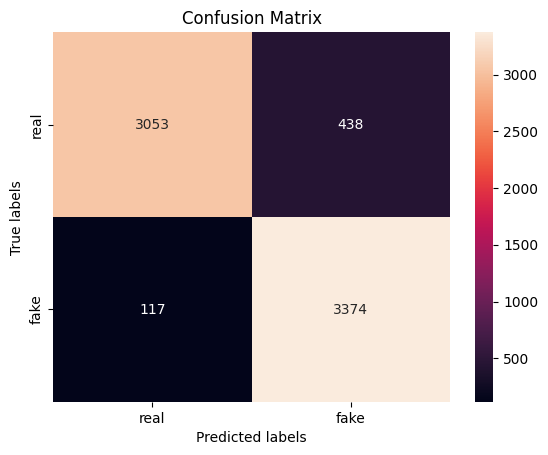

In [501]:
confusion_matrix = metrics.confusion_matrix(test_label_with_stopwords_data, nb_count_with_stopwords_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### Logistic Regression classifier with TfidfVectorizer (dataset with stopwords)

In [554]:
lr_tfidf_with_stopwords_model = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])
get_score(lr_tfidf_with_stopwords_model, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9760813520481237
testing score:0.9629046118590662


In [555]:
lr_tfidf_with_stopwords_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'clf__C':[0.1,1,10]
}
lr_tfidf_with_stopwords_grid = GridSearchCV(lr_tfidf_with_stopwords_model, lr_tfidf_with_stopwords_parameters)
get_score(lr_tfidf_with_stopwords_grid, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9976725866513892
testing score:0.9752219994270983


In [556]:
lr_tfidf_with_stopwords_best_parameters = lr_tfidf_with_stopwords_grid.best_params_
print(lr_tfidf_with_stopwords_best_parameters)

{'clf__C': 10, 'vect__ngram_range': (1, 1)}


In [557]:
lr_tfidf_with_stopwords_grid_result = pd.DataFrame(lr_tfidf_with_stopwords_grid.cv_results_)[['param_vect__ngram_range','param_clf__C','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
lr_tfidf_with_stopwords_grid_result

,param_vect__ngram_range,param_clf__C,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,"(1, 1)",0.1,0.928531,0.001118,7,8.659675,1.726661
1,"(1, 2)",0.1,0.919543,0.001730,8,52.350396,6.228199
2,"(1, 3)",0.1,0.890970,0.003054,9,133.484946,11.587579
3,"(1, 1)",1,0.960899,0.002108,3,10.883000,1.948420
4,"(1, 2)",1,0.957713,0.002012,5,73.376433,6.736978
5,"(1, 3)",1,0.939809,0.001948,6,220.909391,11.732873
6,"(1, 1)",10,0.973002,0.002833,1,13.849960,1.969332
7,"(1, 2)",10,0.972715,0.002951,2,111.147235,6.744644
8,"(1, 3)",10,0.960577,0.002654,4,313.496288,11.867875


#### Scatter Plot

Scatter Plot: Each point represents a combination of param_clf__C and param_vect__ngram_range, plotted against its mean_test_score and mean_fit_time.
Hue and Style: The color (hue) distinguishes different values of C, and the marker style (style) distinguishes different n-gram ranges, making it easy to see how these parameters influence performance and efficiency.
Size (s): Adjusts the size of the markers to make the plot clearer.

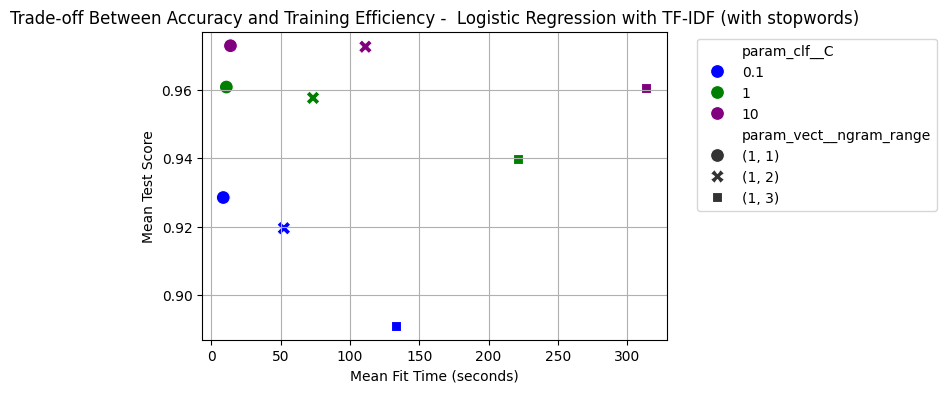

In [715]:
plot_accuracy_vs_efficiency(lr_tfidf_with_stopwords_grid_result, 'Logistic Regression with TF-IDF (with stopwords)', 'param_clf__C',  'param_vect__ngram_range')

In [559]:
best_lr_tfidf_with_stopwords_model = lr_tfidf_with_stopwords_grid.best_estimator_
lr_tfidf_with_stopwords_predictions = best_lr_tfidf_with_stopwords_model.predict(test_text_with_stopwords_data)

labels = ['1','0']
lr_tfidf_with_stopwords_report = classification_report(test_label_with_stopwords_data, lr_tfidf_with_stopwords_predictions, target_names=labels)
print(lr_tfidf_with_stopwords_report)

              precision    recall  f1-score   support

           1       0.98      0.97      0.98      3491
           0       0.97      0.98      0.98      3491

    accuracy                           0.98      6982
   macro avg       0.98      0.98      0.98      6982
weighted avg       0.98      0.98      0.98      6982



In [560]:
lr_tfidf_with_stopwords_results = evaluate_model(test_label_with_stopwords_data, lr_tfidf_with_stopwords_predictions)
lr_tfidf_with_stopwords_results

{'accuracy': 0.9752219994270983,
 'precision': 0.9752697717747526,
 'recall': 0.9752219994270983,
 'f1': 0.9752213767633638}

[[3387  104]
 [  69 3422]]


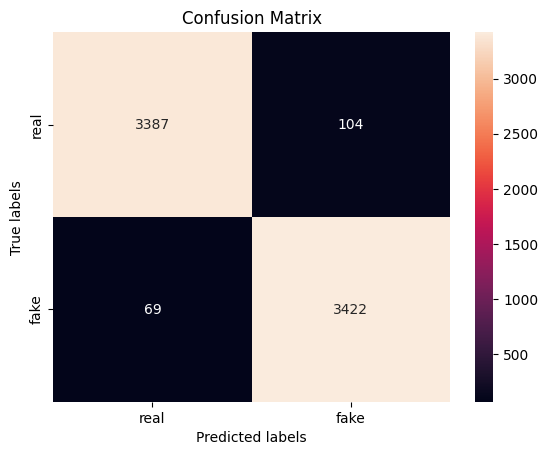

In [561]:
confusion_matrix = metrics.confusion_matrix(test_label_with_stopwords_data, lr_tfidf_with_stopwords_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### Logistic Regression classifier with CountVectorizer (dataset with stopwords)

In [572]:
lr_count_with_stopwords_model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])
get_score(lr_count_with_stopwords_model, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9999641936407906
testing score:0.9733600687482097


In [573]:
lr_count_with_stopwords_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'clf__C':[0.1,1,10]
}
lr_count_with_stopwords_grid = GridSearchCV(lr_count_with_stopwords_model, lr_count_with_stopwords_parameters)
get_score(lr_count_with_stopwords_grid, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9999641936407906
testing score:0.9792323116585505


In [574]:
lr_count_with_stopwords_best_parameters = lr_count_with_stopwords_grid.best_params_
print(lr_count_with_stopwords_best_parameters)

{'clf__C': 10, 'vect__ngram_range': (1, 2)}


In [575]:
lr_count_with_stopwords_grid_result = pd.DataFrame(lr_count_with_stopwords_grid.cv_results_)[['param_vect__ngram_range','param_clf__C','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
lr_count_with_stopwords_grid_result

,param_vect__ngram_range,param_clf__C,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,"(1, 1)",0.1,0.974828,0.002758,7,25.290289,1.904841
1,"(1, 2)",0.1,0.977979,0.002855,3,200.126111,5.260202
2,"(1, 3)",0.1,0.976905,0.002908,6,565.767856,9.541829
3,"(1, 1)",1,0.974541,0.003013,8,33.671354,1.958825
4,"(1, 2)",1,0.978230,0.002962,2,246.567712,5.422392
5,"(1, 3)",1,0.977442,0.003214,4,728.198246,9.233158
6,"(1, 1)",10,0.973933,0.002860,9,39.515429,1.904396
7,"(1, 2)",10,0.978552,0.003211,1,282.071462,5.379734
8,"(1, 3)",10,0.977442,0.003370,4,778.800085,9.519073


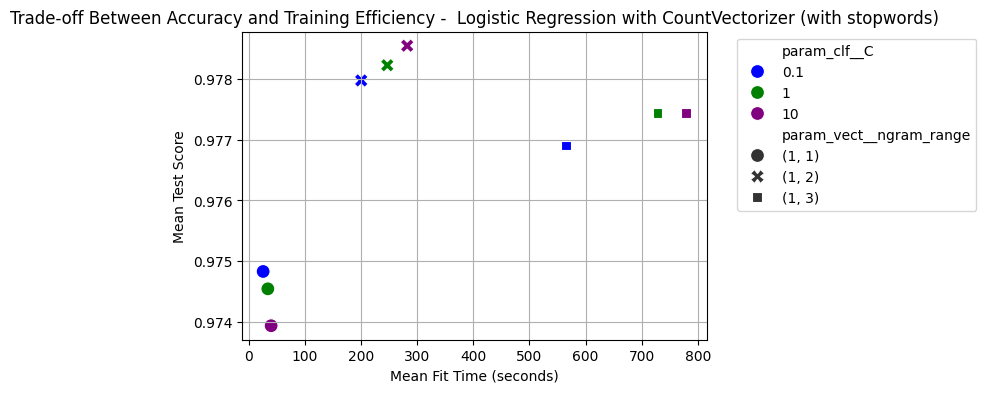

In [717]:
plot_accuracy_vs_efficiency(lr_count_with_stopwords_grid_result, 'Logistic Regression with CountVectorizer (with stopwords)', 'param_clf__C', 'param_vect__ngram_range')

In [577]:
best_lr_count_with_stopwords_model = lr_count_with_stopwords_grid.best_estimator_
lr_count_with_stopwords_predictions = best_lr_count_with_stopwords_model.predict(test_text_with_stopwords_data)

labels = ['1','0']
lr_count_with_stopwords_report = classification_report(test_label_with_stopwords_data, lr_count_with_stopwords_predictions, target_names=labels)
print(lr_count_with_stopwords_report)

              precision    recall  f1-score   support

           1       0.98      0.98      0.98      3491
           0       0.98      0.98      0.98      3491

    accuracy                           0.98      6982
   macro avg       0.98      0.98      0.98      6982
weighted avg       0.98      0.98      0.98      6982



In [578]:
lr_count_with_stopwords_results = evaluate_model(test_label_with_stopwords_data, lr_count_with_stopwords_predictions)
lr_count_with_stopwords_results

{'accuracy': 0.9792323116585505,
 'precision': 0.9792342384921939,
 'recall': 0.9792323116585505,
 'f1': 0.9792322907836225}

[[3422   69]
 [  76 3415]]


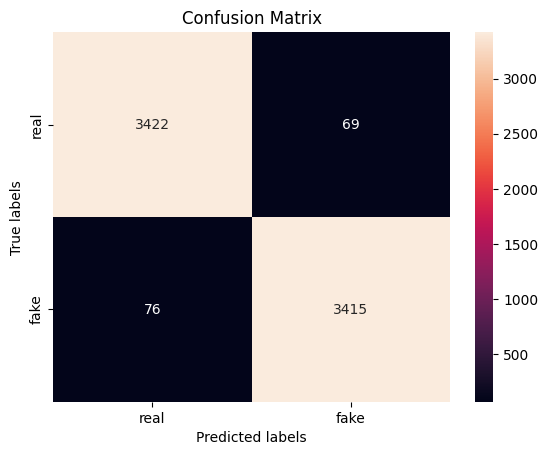

In [579]:
confusion_matrix = metrics.confusion_matrix(test_label_with_stopwords_data, lr_count_with_stopwords_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### Random Forest classifier with TfidfVectorizer (dataset with stopwords)

In [600]:
rf_tfidf_with_stopwords_model = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])
get_score(rf_tfidf_with_stopwords_model, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9999641936407906
testing score:0.9364079060441134


In [601]:
rf_tfidf_with_stopwords_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'vect__use_idf':[True,False]
}
rf_tfidf_with_stopwords_grid = GridSearchCV(rf_tfidf_with_stopwords_model, rf_tfidf_with_stopwords_parameters)
get_score(rf_tfidf_with_stopwords_grid, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9999641936407906
testing score:0.936551131480951


In [602]:
rf_tfidf_with_stopwords_best_parameters = rf_tfidf_with_stopwords_grid.best_params_
print(rf_tfidf_with_stopwords_best_parameters)

{'vect__ngram_range': (1, 1), 'vect__use_idf': True}


In [603]:
rf_tfidf_with_stopwords_grid_result = pd.DataFrame(rf_tfidf_with_stopwords_grid.cv_results_)[['param_vect__ngram_range','param_vect__use_idf','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
rf_tfidf_with_stopwords_grid_result

,param_vect__ngram_range,param_vect__use_idf,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,"(1, 1)",True,0.940239,0.001485,1,86.070057,3.405790
1,"(1, 1)",False,0.938306,0.000939,2,99.316671,3.449100
2,"(1, 2)",True,0.935047,0.002866,3,629.195709,19.824933
3,"(1, 2)",False,0.933937,0.003308,4,636.637402,17.514479
4,"(1, 3)",True,0.929927,0.003969,6,1168.493408,20.666358
5,"(1, 3)",False,0.932469,0.001783,5,1054.129885,18.539526


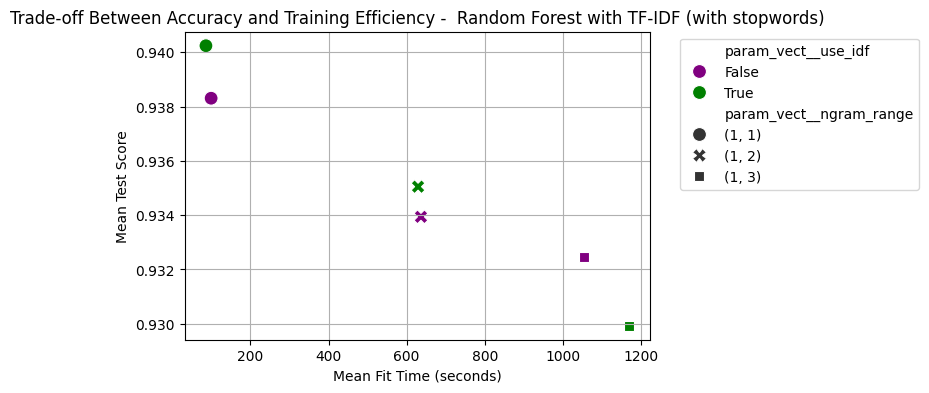

In [718]:
plot_accuracy_vs_efficiency(rf_tfidf_with_stopwords_grid_result, 'Random Forest with TF-IDF (with stopwords)', 'param_vect__use_idf',  'param_vect__ngram_range')

In [604]:
best_rf_tfidf_with_stopwords_model = rf_tfidf_with_stopwords_grid.best_estimator_
rf_tfidf_with_stopwords_predictions = best_rf_tfidf_with_stopwords_model.predict(test_text_with_stopwords_data)

labels = ['1','0']
rf_tfidf_with_stopwords_report = classification_report(test_label_with_stopwords_data, rf_tfidf_with_stopwords_predictions, target_names=labels)
print(rf_tfidf_with_stopwords_report)

              precision    recall  f1-score   support

           1       0.95      0.93      0.94      3491
           0       0.93      0.95      0.94      3491

    accuracy                           0.94      6982
   macro avg       0.94      0.94      0.94      6982
weighted avg       0.94      0.94      0.94      6982



In [605]:
rf_tfidf_with_stopwords_results = evaluate_model(test_label_with_stopwords_data, rf_tfidf_with_stopwords_predictions)
rf_tfidf_with_stopwords_results

{'accuracy': 0.936551131480951,
 'precision': 0.9367421040914311,
 'recall': 0.936551131480951,
 'f1': 0.9365441947094141}

[[3233  258]
 [ 185 3306]]


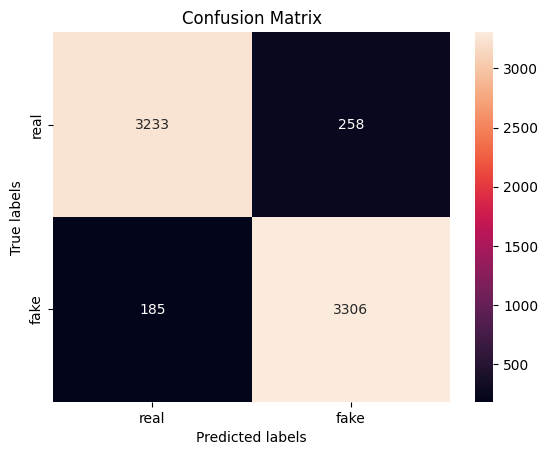

In [606]:
confusion_matrix = metrics.confusion_matrix(test_label_with_stopwords_data, rf_tfidf_with_stopwords_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### Random Forest classifier with CountVectorizer (dataset with stopwords)

In [721]:
rf_count_with_stopwords_model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', RandomForestClassifier())
])
get_score(rf_count_with_stopwords_model, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9999641936407906
testing score:0.936551131480951


In [723]:
rf_count_with_stopwords_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)]
}
rf_count_with_stopwords_grid = GridSearchCV(rf_count_with_stopwords_model, rf_count_with_stopwords_parameters)
get_score(rf_count_with_stopwords_grid, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9999641936407906
testing score:0.9389859639071899


In [724]:
rf_count_with_stopwords_best_parameters = rf_count_with_stopwords_grid.best_params_
print(rf_count_with_stopwords_best_parameters)

{'vect__ngram_range': (1, 1)}


In [725]:
rf_count_with_stopwords_grid_result = pd.DataFrame(rf_count_with_stopwords_grid.cv_results_)[['param_vect__ngram_range','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
rf_count_with_stopwords_grid_result

,param_vect__ngram_range,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,"(1, 1)",0.941098,0.003140,1,61.876218,2.284952
1,"(1, 2)",0.937804,0.002433,2,419.586939,9.524647
2,"(1, 3)",0.936730,0.001640,3,1038.506371,17.767154


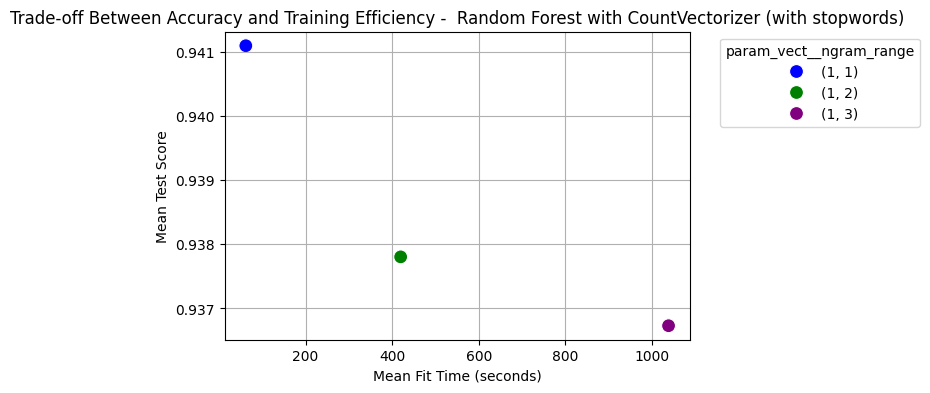

In [729]:
plot_accuracy_vs_efficiency(rf_count_with_stopwords_grid_result, 'Random Forest with CountVectorizer (with stopwords)', 'param_vect__ngram_range',  'param_vect__ngram_range')

In [726]:
best_rf_count_with_stopwords_model = rf_count_with_stopwords_grid.best_estimator_
rf_count_with_stopwords_predictions = best_rf_count_with_stopwords_model.predict(test_text_with_stopwords_data)

labels = ['1','0']
rf_count_with_stopwords_report = classification_report(test_label_with_stopwords_data, rf_count_with_stopwords_predictions, target_names=labels)
print(rf_count_with_stopwords_report)

              precision    recall  f1-score   support

           1       0.96      0.92      0.94      3491
           0       0.92      0.96      0.94      3491

    accuracy                           0.94      6982
   macro avg       0.94      0.94      0.94      6982
weighted avg       0.94      0.94      0.94      6982



In [727]:
rf_count_with_stopwords_results = evaluate_model(test_label_with_stopwords_data, rf_count_with_stopwords_predictions)
rf_count_with_stopwords_results

{'accuracy': 0.9389859639071899,
 'precision': 0.9395769198756654,
 'recall': 0.9389859639071899,
 'f1': 0.938965450585386}

[[3214  277]
 [ 149 3342]]


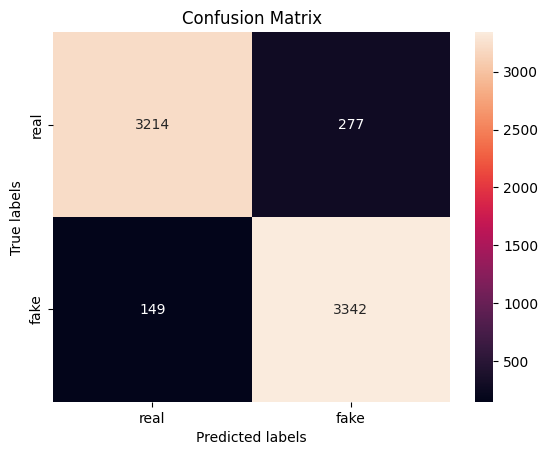

In [728]:
confusion_matrix = metrics.confusion_matrix(test_label_with_stopwords_data, rf_count_with_stopwords_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### Decision Tree with TfidfVectorizer (dataset with stopwords)

In [737]:
dt_tfidf_with_stopwords_model = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier())
])
get_score(dt_tfidf_with_stopwords_model, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9999641936407906
testing score:0.9356917788599255


In [738]:
dt_tfidf_with_stopwords_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'vect__use_idf':[True,False]
}
dt_tfidf_with_stopwords_grid = GridSearchCV(dt_tfidf_with_stopwords_model, dt_tfidf_with_stopwords_parameters)
get_score(dt_tfidf_with_stopwords_grid, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9999641936407906
testing score:0.9537381839014609


In [739]:
dt_tfidf_with_stopwords_best_parameters = dt_tfidf_with_stopwords_grid.best_params_
print(dt_tfidf_with_stopwords_best_parameters)

{'vect__ngram_range': (1, 2), 'vect__use_idf': False}


In [740]:
dt_tfidf_with_stopwords_grid_result = pd.DataFrame(dt_tfidf_with_stopwords_grid.cv_results_)[['param_vect__ngram_range','param_vect__use_idf','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
dt_tfidf_with_stopwords_grid_result

,param_vect__ngram_range,param_vect__use_idf,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,"(1, 1)",True,0.933687,0.001845,6,40.606298,1.667859
1,"(1, 1)",False,0.934474,0.002307,5,40.096880,1.591067
2,"(1, 2)",True,0.944679,0.001968,3,183.874289,6.589866
3,"(1, 2)",False,0.950516,0.001788,1,179.567954,5.245064
4,"(1, 3)",True,0.939200,0.004830,4,537.016317,12.946517
5,"(1, 3)",False,0.948224,0.001596,2,524.926615,9.953595


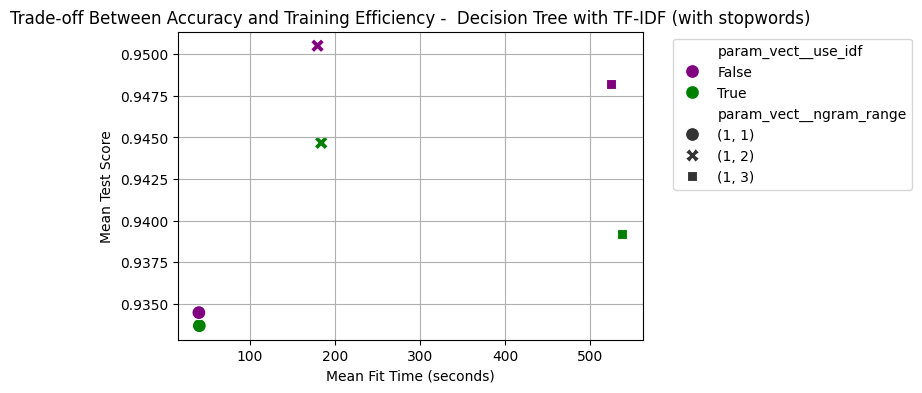

In [744]:
plot_accuracy_vs_efficiency(dt_tfidf_with_stopwords_grid_result, 'Decision Tree with TF-IDF (with stopwords)', 'param_vect__use_idf',  'param_vect__ngram_range')

In [741]:
best_dt_tfidf_with_stopwords_model = dt_tfidf_with_stopwords_grid.best_estimator_
dt_tfidf_with_stopwords_predictions = best_dt_tfidf_with_stopwords_model.predict(test_text_with_stopwords_data)

labels = ['1','0']
dt_tfidf_with_stopwords_report = classification_report(test_label_with_stopwords_data, dt_tfidf_with_stopwords_predictions, target_names=labels)
print(dt_tfidf_with_stopwords_report)

              precision    recall  f1-score   support

           1       0.95      0.96      0.95      3491
           0       0.96      0.95      0.95      3491

    accuracy                           0.95      6982
   macro avg       0.95      0.95      0.95      6982
weighted avg       0.95      0.95      0.95      6982



In [742]:
dt_tfidf_with_stopwords_results = evaluate_model(test_label_with_stopwords_data, dt_tfidf_with_stopwords_predictions)
dt_tfidf_with_stopwords_results

{'accuracy': 0.9537381839014609,
 'precision': 0.9537444760411825,
 'recall': 0.9537381839014609,
 'f1': 0.9537380235210954}

[[3336  155]
 [ 168 3323]]


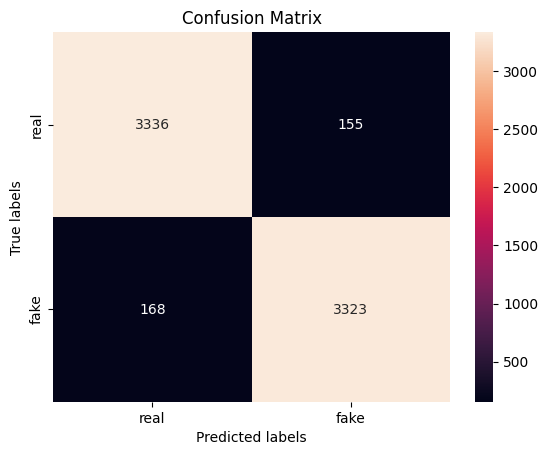

In [743]:
confusion_matrix = metrics.confusion_matrix(test_label_with_stopwords_data, dt_tfidf_with_stopwords_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### Decision Tree with CountVectorizer (dataset with stopwords)

In [745]:
dt_count_with_stopwords_model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', DecisionTreeClassifier())
])
get_score(dt_count_with_stopwords_model, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9999641936407906
testing score:0.9419936980807792


In [746]:
dt_count_with_stopwords_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)]
}
dt_count_with_stopwords_grid = GridSearchCV(dt_count_with_stopwords_model, dt_count_with_stopwords_parameters)
get_score(dt_count_with_stopwords_grid, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9999641936407906
testing score:0.9577484961329132


In [747]:
dt_count_with_stopwords_best_parameters = dt_count_with_stopwords_grid.best_params_
print(dt_count_with_stopwords_best_parameters)

{'vect__ngram_range': (1, 2)}


In [748]:
dt_count_with_stopwords_grid_result = pd.DataFrame(dt_count_with_stopwords_grid.cv_results_)[['param_vect__ngram_range','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
dt_count_with_stopwords_grid_result

,param_vect__ngram_range,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,"(1, 1)",0.940776,0.001747,3,25.705448,1.568209
1,"(1, 2)",0.954812,0.003275,1,163.894212,6.186568
2,"(1, 3)",0.953953,0.003332,2,484.684423,9.543424


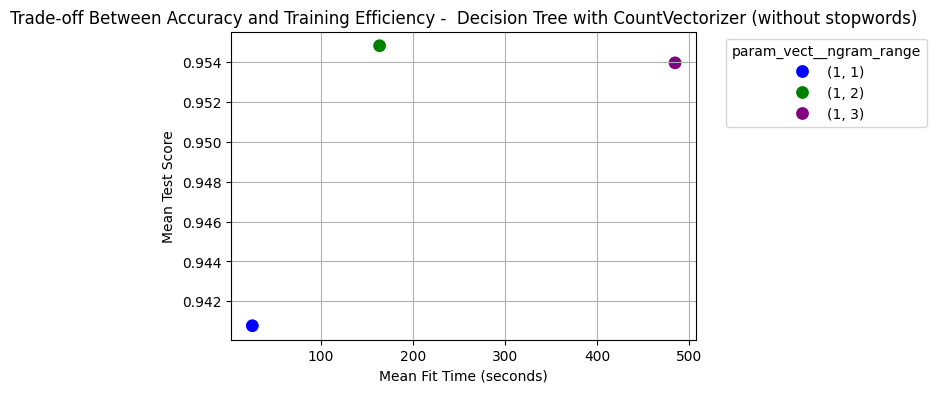

In [749]:
plot_accuracy_vs_efficiency(dt_count_with_stopwords_grid_result, 'Decision Tree with CountVectorizer (with stopwords)', 'param_vect__ngram_range',  'param_vect__ngram_range')

In [751]:
best_dt_count_with_stopwords_model = dt_count_with_stopwords_grid.best_estimator_
dt_count_with_stopwords_predictions = best_dt_count_with_stopwords_model.predict(test_text_with_stopwords_data)

labels = ['1','0']
dt_count_with_stopwords_report = classification_report(test_label_with_stopwords_data, dt_count_with_stopwords_predictions, target_names=labels)
print(dt_count_with_stopwords_report)

              precision    recall  f1-score   support

           1       0.96      0.96      0.96      3491
           0       0.96      0.96      0.96      3491

    accuracy                           0.96      6982
   macro avg       0.96      0.96      0.96      6982
weighted avg       0.96      0.96      0.96      6982



In [752]:
dt_count_with_stopwords_results = evaluate_model(test_label_with_stopwords_data, dt_count_with_stopwords_predictions)
dt_count_with_stopwords_results

{'accuracy': 0.9577484961329132,
 'precision': 0.9577530409552505,
 'recall': 0.9577484961329132,
 'f1': 0.9577483912586481}

[[3349  142]
 [ 153 3338]]


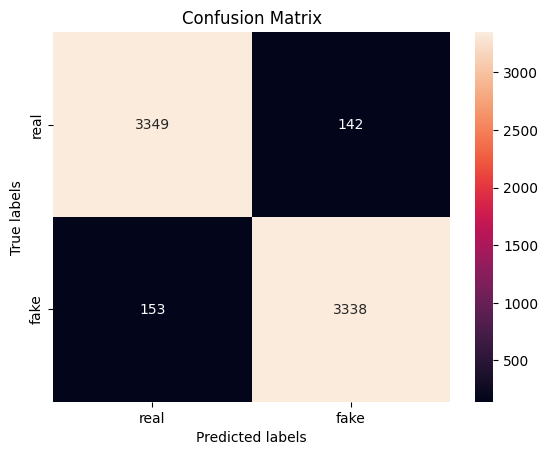

In [753]:
confusion_matrix = metrics.confusion_matrix(test_label_with_stopwords_data, dt_count_with_stopwords_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### Linear SVC classifier with TfidfVectorizer (dataset with stopwords)

In [782]:
linearSVC_tfidf_with_stopwords_model = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LinearSVC(dual=False))
])
get_score(linearSVC_tfidf_with_stopwords_model, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9986035519908336
testing score:0.9786594099112003


In [783]:
linearSVC_tfidf_with_stopwords_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'clf__C':[0.1,1,10] 
}

linearSVC_tfidf_with_stopwords_grid = GridSearchCV(linearSVC_tfidf_with_stopwords_model, linearSVC_tfidf_with_stopwords_parameters)
get_score(linearSVC_tfidf_with_stopwords_grid, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9999641936407906
testing score:0.9812374677742767


In [784]:
linearSVC_tfidf_with_stopwords_best_parameters = linearSVC_tfidf_with_stopwords_grid.best_params_
print(linearSVC_tfidf_with_stopwords_best_parameters)

{'clf__C': 10, 'vect__ngram_range': (1, 2)}


In [785]:
linearSVC_tfidf_with_stopwords_grid_result = pd.DataFrame(linearSVC_tfidf_with_stopwords_grid.cv_results_)[['param_clf__C','param_vect__ngram_range','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
linearSVC_tfidf_with_stopwords_grid_result

,param_clf__C,param_vect__ngram_range,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,0.1,"(1, 1)",0.964587,0.002333,7,8.026760,1.686833
1,0.1,"(1, 2)",0.962940,0.001773,8,40.776939,6.673012
2,0.1,"(1, 3)",0.946577,0.001340,9,104.792601,11.409521
3,1,"(1, 1)",0.975866,0.003080,4,8.493107,1.884952
4,1,"(1, 2)",0.978301,0.002801,2,44.449426,6.719748
5,1,"(1, 3)",0.968347,0.002692,6,115.415721,11.494283
6,10,"(1, 1)",0.976618,0.002836,3,9.210038,1.803543
7,10,"(1, 2)",0.980736,0.002178,1,62.347133,6.717343
8,10,"(1, 3)",0.972178,0.003587,5,166.609910,11.537788


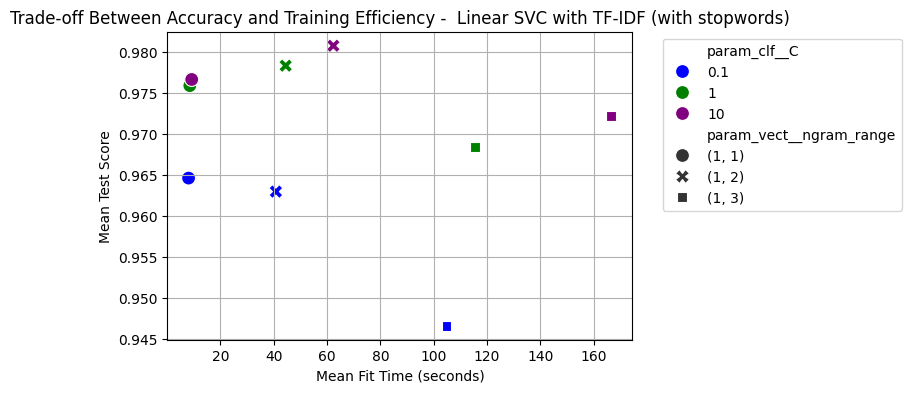

In [789]:
plot_accuracy_vs_efficiency(linearSVC_tfidf_with_stopwords_grid_result, 'Linear SVC with TF-IDF (with stopwords)', 'param_clf__C',  'param_vect__ngram_range')

In [786]:
best_linearSVC_tfidf_with_stopwords_model = linearSVC_tfidf_with_stopwords_grid.best_estimator_
linearSVC_tfidf_with_stopwords_predictions = best_linearSVC_tfidf_with_stopwords_model.predict(test_text_with_stopwords_data)

labels = ['1','0']
linearSVC_tfidf_with_stopwords_report = classification_report(test_label_with_stopwords_data, linearSVC_tfidf_with_stopwords_predictions, target_names=labels)
print(linearSVC_tfidf_with_stopwords_report)

              precision    recall  f1-score   support

           1       0.99      0.97      0.98      3491
           0       0.97      0.99      0.98      3491

    accuracy                           0.98      6982
   macro avg       0.98      0.98      0.98      6982
weighted avg       0.98      0.98      0.98      6982



In [787]:
linearSVC_tfidf_with_stopwords_results = evaluate_model(test_label_with_stopwords_data, linearSVC_tfidf_with_stopwords_predictions)
linearSVC_tfidf_with_stopwords_results

{'accuracy': 0.9812374677742767,
 'precision': 0.9813569471446947,
 'recall': 0.9812374677742767,
 'f1': 0.9812363034228183}

[[3398   93]
 [  38 3453]]


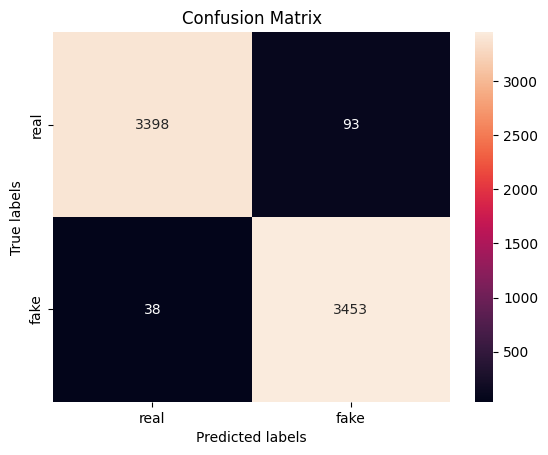

In [788]:
confusion_matrix = metrics.confusion_matrix(test_label_with_stopwords_data, linearSVC_tfidf_with_stopwords_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### Linear SVC classifier with CountVectorizer (dataset with stopwords)

In [790]:
linearSVC_count_with_stopwords_model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LinearSVC(dual=False))
])
get_score(linearSVC_count_with_stopwords_model, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9999641936407906
testing score:0.9689200802062446


In [791]:
linearSVC_count_with_stopwords_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'clf__C':[0.1,1,10] 
}

linearSVC_count_with_stopwords_grid = GridSearchCV(linearSVC_count_with_stopwords_model, linearSVC_count_with_stopwords_parameters)
get_score(linearSVC_count_with_stopwords_grid, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9999641936407906
testing score:0.9776568318533372


In [792]:
linearSVC_count_with_stopwords_best_parameters = linearSVC_count_with_stopwords_grid.best_params_
print(linearSVC_count_with_stopwords_best_parameters)

{'clf__C': 0.1, 'vect__ngram_range': (1, 2)}


In [793]:
linearSVC_count_with_stopwords_grid_result = pd.DataFrame(linearSVC_count_with_stopwords_grid.cv_results_)[['param_clf__C','param_vect__ngram_range','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
linearSVC_count_with_stopwords_grid_result

,param_clf__C,param_vect__ngram_range,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,0.1,"(1, 1)",0.973073,0.002548,7,11.413331,1.664634
1,0.1,"(1, 2)",0.977478,0.002744,1,69.115496,5.409489
2,0.1,"(1, 3)",0.976439,0.002795,4,193.199051,9.185033
3,1,"(1, 1)",0.972894,0.002202,9,8.983888,1.688894
4,1,"(1, 2)",0.977155,0.002925,3,41.870540,5.383172
5,1,"(1, 3)",0.976081,0.002595,5,114.437343,9.000004
6,10,"(1, 1)",0.972930,0.002264,8,8.879694,1.720990
7,10,"(1, 2)",0.977227,0.002872,2,41.954256,5.351142
8,10,"(1, 3)",0.976045,0.002460,6,117.174938,8.987850


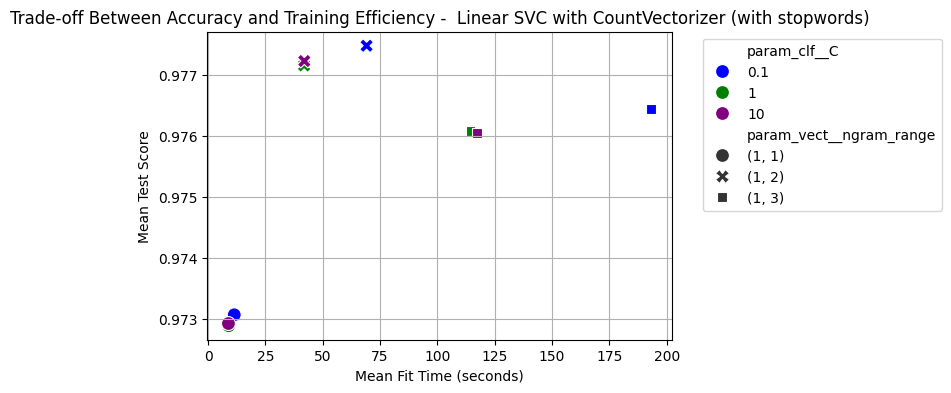

In [797]:
plot_accuracy_vs_efficiency(linearSVC_count_with_stopwords_grid_result, 'Linear SVC with CountVectorizer (with stopwords)', 'param_clf__C',  'param_vect__ngram_range')

In [794]:
best_linearSVC_count_with_stopwords_model = linearSVC_count_with_stopwords_grid.best_estimator_
linearSVC_count_with_stopwords_predictions = best_linearSVC_count_with_stopwords_model.predict(test_text_with_stopwords_data)

labels = ['1','0']
linearSVC_count_with_stopwords_report = classification_report(test_label_with_stopwords_data, linearSVC_count_with_stopwords_predictions, target_names=labels)
print(linearSVC_count_with_stopwords_report)

              precision    recall  f1-score   support

           1       0.98      0.98      0.98      3491
           0       0.98      0.98      0.98      3491

    accuracy                           0.98      6982
   macro avg       0.98      0.98      0.98      6982
weighted avg       0.98      0.98      0.98      6982



In [795]:
linearSVC_count_with_stopwords_results = evaluate_model(test_label_with_stopwords_data, linearSVC_count_with_stopwords_predictions)
linearSVC_count_with_stopwords_results

{'accuracy': 0.9776568318533372,
 'precision': 0.9776582428308094,
 'recall': 0.9776568318533372,
 'f1': 0.9776568153531874}

[[3410   81]
 [  75 3416]]


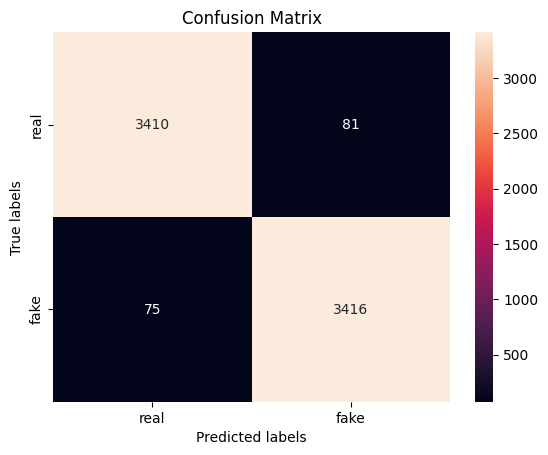

In [796]:
confusion_matrix = metrics.confusion_matrix(test_label_with_stopwords_data, linearSVC_count_with_stopwords_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### SGD classifier with TfidfVectorizer (dataset with stopwords)

In [809]:
SGD_tfidf_with_stopwords_model = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', SGDClassifier())
])
get_score(SGD_tfidf_with_stopwords_model, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9844600401031223
testing score:0.9736465196218849


In [810]:
SGD_tfidf_with_stopwords_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'clf__alpha':[0.0001,0.001,0.1]
}

SGD_tfidf_with_stopwords_grid = GridSearchCV(SGD_tfidf_with_stopwords_model, SGD_tfidf_with_stopwords_parameters)
get_score(SGD_tfidf_with_stopwords_grid, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9898668003437411
testing score:0.9714981380693211


In [811]:
SGD_tfidf_with_stopwords_best_parameters = SGD_tfidf_with_stopwords_grid.best_params_
print(SGD_tfidf_with_stopwords_best_parameters)

{'clf__alpha': 0.0001, 'vect__ngram_range': (1, 2)}


In [812]:
SGD_tfidf_with_stopwords_grid_result = pd.DataFrame(SGD_tfidf_with_stopwords_grid.cv_results_)[['param_clf__alpha','param_vect__ngram_range','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
SGD_tfidf_with_stopwords_grid_result

,param_clf__alpha,param_vect__ngram_range,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,0.0001,"(1, 1)",0.971462,0.002098,2,6.964966,1.637987
1,0.0001,"(1, 2)",0.973038,0.003105,1,35.704375,6.870608
2,0.0001,"(1, 3)",0.961293,0.001994,3,95.938716,12.126984
3,0.001,"(1, 1)",0.941528,0.000806,4,6.985975,1.687829
4,0.001,"(1, 2)",0.929891,0.002234,5,35.768890,6.602483
5,0.001,"(1, 3)",0.898453,0.003279,6,100.166957,13.051901
6,0.1,"(1, 1)",0.605668,0.099896,7,9.416358,2.215671
7,0.1,"(1, 2)",0.529359,0.050463,9,34.669792,6.629007
8,0.1,"(1, 3)",0.530433,0.059794,8,90.950111,11.258976


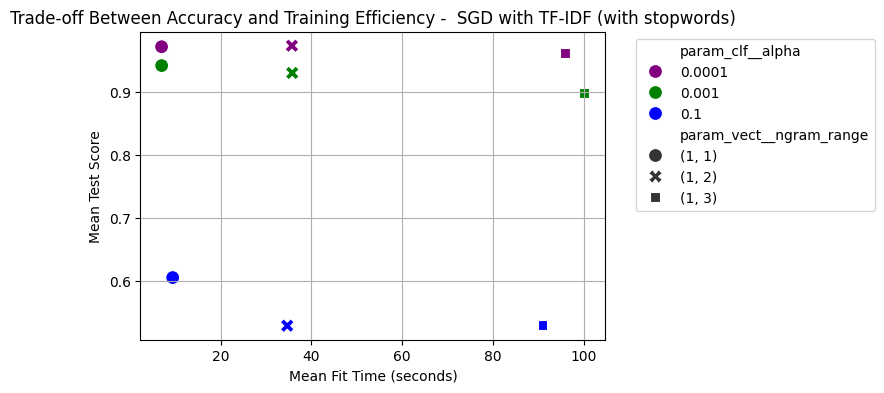

In [816]:
plot_accuracy_vs_efficiency(SGD_tfidf_with_stopwords_grid_result, 'SGD with TF-IDF (with stopwords)', 'param_clf__alpha',  'param_vect__ngram_range')

In [813]:
best_SGD_tfidf_with_stopwords_model = SGD_tfidf_with_stopwords_grid.best_estimator_
SGD_tfidf_with_stopwords_predictions = best_SGD_tfidf_with_stopwords_model.predict(test_text_with_stopwords_data)

labels = ['1','0']
SGD_tfidf_with_stopwords_report = classification_report(test_label_with_stopwords_data, SGD_tfidf_with_stopwords_predictions, target_names=labels)
print(SGD_tfidf_with_stopwords_report)

              precision    recall  f1-score   support

           1       0.98      0.96      0.97      3491
           0       0.96      0.98      0.97      3491

    accuracy                           0.97      6982
   macro avg       0.97      0.97      0.97      6982
weighted avg       0.97      0.97      0.97      6982



In [814]:
SGD_tfidf_with_stopwords_results = evaluate_model(test_label_with_stopwords_data, SGD_tfidf_with_stopwords_predictions)
SGD_tfidf_with_stopwords_results

{'accuracy': 0.9714981380693211,
 'precision': 0.9717911522235045,
 'recall': 0.9714981380693211,
 'f1': 0.971493711987022}

[[3348  143]
 [  56 3435]]


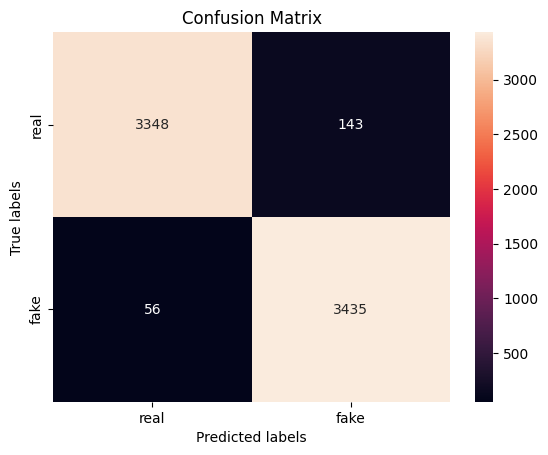

In [815]:
confusion_matrix = metrics.confusion_matrix(test_label_with_stopwords_data, SGD_tfidf_with_stopwords_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

#### SGD classifier with CountVectorizer (dataset with stopwords)

In [817]:
SGD_count_with_stopwords_model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', SGDClassifier())
])
get_score(SGD_count_with_stopwords_model, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9988541965052994
testing score:0.9713549126324835


In [818]:
SGD_count_with_stopwords_parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'clf__alpha':[0.0001,0.001,0.1]
}

SGD_count_with_stopwords_grid = GridSearchCV(SGD_count_with_stopwords_model, SGD_count_with_stopwords_parameters)
get_score(SGD_count_with_stopwords_grid, train_text_with_stopwords_data, test_text_with_stopwords_data, train_label_with_stopwords_data, test_label_with_stopwords_data)

training score:0.9997135491263248
testing score:0.9785161844743626


In [819]:
SGD_count_with_stopwords_best_parameters = SGD_count_with_stopwords_grid.best_params_
print(SGD_count_with_stopwords_best_parameters)

{'clf__alpha': 0.0001, 'vect__ngram_range': (1, 2)}


In [820]:
SGD_count_with_stopwords_grid_result = pd.DataFrame(SGD_count_with_stopwords_grid.cv_results_)[['param_clf__alpha','param_vect__ngram_range','mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time']]
SGD_count_with_stopwords_grid_result

,param_clf__alpha,param_vect__ngram_range,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time
0,0.0001,"(1, 1)",0.971247,0.003186,6,7.655200,1.687260
1,0.0001,"(1, 2)",0.975616,0.002049,1,32.614228,5.434830
2,0.0001,"(1, 3)",0.970889,0.004966,7,83.439559,9.366720
3,0.001,"(1, 1)",0.969851,0.003412,8,7.560959,1.666699
4,0.001,"(1, 2)",0.972786,0.009908,3,32.415775,5.418186
5,0.001,"(1, 3)",0.974935,0.003984,2,79.828339,9.123659
6,0.1,"(1, 1)",0.962797,0.004388,9,7.562939,1.704658
7,0.1,"(1, 2)",0.972035,0.003551,5,31.943959,5.391633
8,0.1,"(1, 3)",0.972429,0.003112,4,82.119117,9.305173


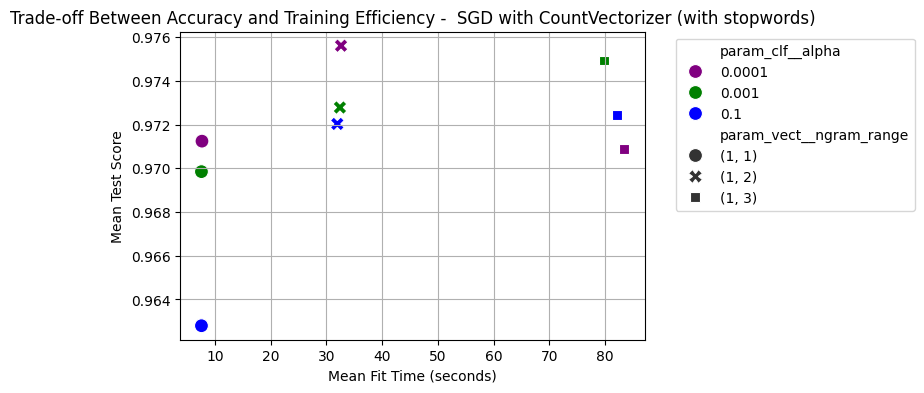

In [821]:
plot_accuracy_vs_efficiency(SGD_count_with_stopwords_grid_result, 'SGD with CountVectorizer (with stopwords)', 'param_clf__alpha',  'param_vect__ngram_range')

In [822]:
best_SGD_count_with_stopwords_model = SGD_count_with_stopwords_grid.best_estimator_
SGD_count_with_stopwords_predictions = best_SGD_count_with_stopwords_model.predict(test_text_with_stopwords_data)

labels = ['1','0']
SGD_count_with_stopwords_report = classification_report(test_label_with_stopwords_data, SGD_count_with_stopwords_predictions, target_names=labels)
print(SGD_count_with_stopwords_report)

              precision    recall  f1-score   support

           1       0.98      0.98      0.98      3491
           0       0.98      0.98      0.98      3491

    accuracy                           0.98      6982
   macro avg       0.98      0.98      0.98      6982
weighted avg       0.98      0.98      0.98      6982



In [823]:
SGD_count_with_stopwords_results = evaluate_model(test_label_with_stopwords_data, SGD_count_with_stopwords_predictions)
SGD_count_with_stopwords_results

{'accuracy': 0.9785161844743626,
 'precision': 0.978517597990325,
 'recall': 0.9785161844743626,
 'f1': 0.9785161686088341}

[[3413   78]
 [  72 3419]]


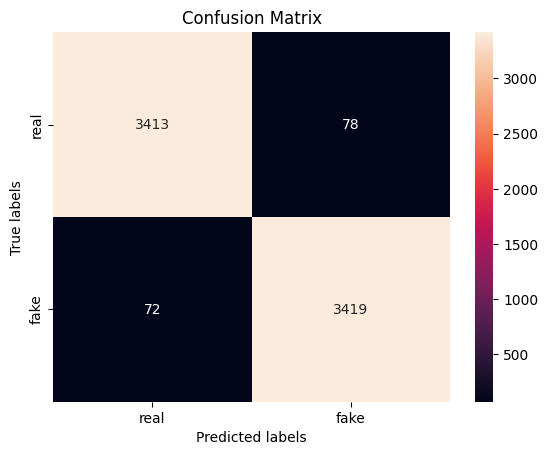

In [824]:
confusion_matrix = metrics.confusion_matrix(test_label_with_stopwords_data, SGD_count_with_stopwords_predictions, labels=[0,1])
plot_confusion_matrix(confusion_matrix)

In [835]:
confusion_matrix

array([[3413,   78],
       [  72, 3419]])

## Results Visualization

When comparing the results of grid searches across multiple classifiers, especially in the context of selecting the best model for a given task, it's essential to focus on properties that provide a clear and comprehensive view of each classifier's performance, efficiency, and robustness. Here are two to three critical properties that are typically good to compare:

1. Mean Test Score
Why It's Important: The mean_test_score is a direct indicator of how well a model performed on the validation set during cross-validation. It reflects the accuracy, precision, recall, F1-score, or whatever metric was specified for evaluation. This score is crucial for understanding the effectiveness of a classifier under its current configuration.
Comparison: By comparing the mean_test_score across different classifiers, you can identify which models are most effective at capturing and generalizing patterns from the training data to new, unseen data.
2. Standard Deviation of Test Score (std_test_score)
Why It's Important: The std_test_score provides insight into the consistency and reliability of the classifier across different cross-validation folds. A lower standard deviation indicates that the classifier is stable and robust across varying data samples, which is especially important in applications where the data may vary significantly.
Comparison: Evaluating the stability of classifiers can help determine which model is more likely to perform well consistently, regardless of minor changes in the input data or operational environment.
3. Mean Fit Time
Why It's Important: The mean_fit_time measures the time taken to train the model on the training set for each fold of the cross-validation. This metric is crucial for understanding the computational efficiency of the classifier, which can be a deciding factor in scenarios where training time is critical or computational resources are limited.
Comparison: By comparing the training times, you can assess the trade-offs between training efficiency and model performance. For instance, a slightly less accurate model might be preferable if it requires significantly less time to train, especially in real-time applications or when dealing with very large datasets.

Visualization can greatly aid in comparing these properties across multiple classifiers:

Bar Charts: Ideal for comparing mean_test_score, std_test_score, and mean_fit_time across different classifiers.
Scatter Plots: Can be used to plot mean_test_score against mean_fit_time to visualize the trade-off between accuracy and training efficiency.
linearSVC_count_with_stopwords_grid_result

In [830]:
all_classifiers_grid_search_results_list = [
    {'data': nb_count_grid_result, 'classifier': 'Naive Bayes', 'feature_extraction': 'CountVectorizer without stopwords'},
    {'data': nb_tfidf_grid_result, 'classifier': 'Naive Bayes', 'feature_extraction': 'TF-IDF without stopwords'},
    {'data': lr_count_grid_result, 'classifier': 'Logistic Regression', 'feature_extraction': 'CountVectorizer without stopwords'},
    {'data': lr_tfidf_grid_result, 'classifier': 'Logistic Regression', 'feature_extraction': 'TF-IDF without stopwords'},
    {'data': rf_count_grid_result, 'classifier': 'Random Forest', 'feature_extraction': 'CountVectorizer without stopwords'},
    {'data': rf_tfidf_grid_result, 'classifier': 'Random Forest', 'feature_extraction': 'TF-IDF without stopwords'},
    {'data': dt_count_grid_result, 'classifier': 'Decision Tree', 'feature_extraction': 'CountVectorizer without stopwords'},
    {'data': dt_tfidf_grid_result, 'classifier': 'Decision Tree', 'feature_extraction': 'TF-IDF without stopwords'},
    {'data': linearSVC_count_grid_result, 'classifier': 'Linear SVC', 'feature_extraction': 'CountVectorizer without stopwords'},
    {'data': linearSVC_tfidf_grid_result, 'classifier': 'Linear SVC', 'feature_extraction': 'TF-IDF without stopwords'},
    {'data': SGD_count_grid_result, 'classifier': 'SGD', 'feature_extraction': 'CountVectorizer without stopwords'},
    {'data': SGD_tfidf_grid_result, 'classifier': 'SGD', 'feature_extraction': 'TF-IDF without stopwords'},
    {'data': nb_count_grid_with_stopwords_result, 'classifier': 'Naive Bayes', 'feature_extraction': 'CountVectorizer with stopwords'},
    {'data': nb_tfidf_grid_with_stopwords_result, 'classifier': 'Naive Bayes', 'feature_extraction': 'TF-IDF with stopwords'},
    {'data': lr_count_with_stopwords_grid_result, 'classifier': 'Logistic Regression', 'feature_extraction': 'CountVectorizer with stopwords'},
    {'data': lr_tfidf_with_stopwords_grid_result, 'classifier': 'Logistic Regression', 'feature_extraction': 'TF-IDF with stopwords'},
    {'data': rf_count_with_stopwords_grid_result, 'classifier': 'Random Forest', 'feature_extraction': 'CountVectorizer with stopwords'},
    {'data': rf_tfidf_with_stopwords_grid_result, 'classifier': 'Random Forest', 'feature_extraction': 'TF-IDF with stopwords'},
    {'data': dt_count_with_stopwords_grid_result, 'classifier': 'Decision Tree', 'feature_extraction': 'CountVectorizer with stopwords'},
    {'data': dt_tfidf_with_stopwords_grid_result, 'classifier': 'Decision Tree', 'feature_extraction': 'TF-IDF with stopwords'},
    {'data': linearSVC_count_with_stopwords_grid_result, 'classifier': 'Linear SVC', 'feature_extraction': 'CountVectorizer with stopwords'},
    {'data': linearSVC_tfidf_with_stopwords_grid_result, 'classifier': 'Linear SVC', 'feature_extraction': 'TF-IDF with stopwords'},
    {'data': SGD_count_with_stopwords_grid_result, 'classifier': 'SGD', 'feature_extraction': 'CountVectorizer with stopwords'},
    {'data': SGD_tfidf_with_stopwords_grid_result, 'classifier': 'SGD', 'feature_extraction': 'TF-IDF with stopwords'},
]

In [831]:
all_results = []

for item in all_classifiers_grid_search_results_list:
    df = item['data']
    df['classifier'] = item['classifier']
    df['feature_extraction'] = item['feature_extraction']
    all_results.append(df)

grid_research_results_df = pd.concat(all_results, ignore_index=True)


In [832]:
grid_research_results_df

,param_vect__ngram_range,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time,classifier,feature_extraction,param_vect__use_idf,param_clf__C,param_clf__alpha
0,"(1, 1)",0.910985,0.005031,2,4.333299,1.016203,Naive Bayes,CountVectorizer without stopwords,NaN,NaN,NaN
1,"(1, 2)",0.915998,0.003461,1,25.890844,3.309869,Naive Bayes,CountVectorizer without stopwords,NaN,NaN,NaN
2,"(1, 3)",0.905972,0.003805,3,60.133995,5.227873,Naive Bayes,CountVectorizer without stopwords,NaN,NaN,NaN
3,"(1, 1)",0.881266,0.003652,2,4.601900,1.136682,Naive Bayes,TF-IDF without stopwords,True,NaN,NaN
4,"(1, 1)",0.886171,0.003605,1,4.455821,1.113017,Naive Bayes,TF-IDF without stopwords,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
154,"(1, 2)",0.929891,0.002234,5,35.768890,6.602483,SGD,TF-IDF with stopwords,NaN,NaN,0.001
155,"(1, 3)",0.898453,0.003279,6,100.166957,13.051901,SGD,TF-IDF with stopwords,NaN,NaN,0.001
156,"(1, 1)",0.605668,0.099896,7,9.416358,2.215671,SGD,TF-IDF with stopwords,NaN,NaN,0.1
157,"(1, 2)",0.529359,0.050463,9,34.669792,6.629007,SGD,TF-IDF with stopwords,NaN,NaN,0.1


In [833]:
# TO DELETE 

import matplotlib.pyplot as plt
import seaborn as sns

def plot_comparison_by_classifier_and_feature_extraction(dataframe, param_to_compare):
    plt.figure(figsize=(10, 8))

    algo_model_figure = sns.barplot(y='classifier', x=param_to_compare, hue='feature_extraction', data=dataframe, width=0.5)

    if param_to_compare == 'mean_test_score':
        plt.title('Performance Comparison by Classifier and Feature Extraction')
        plt.xlabel('Mean Test Score')
    else:
        plt.title('Training Efficiency Comparison by Classifier and Feature Extraction')
        plt.xlabel('Mean Fit Time')    
    plt.ylabel('Classifier')
    plt.legend(title='Feature Extraction Method', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Annotating each bar with the mean test score
    for p in algo_model_figure.patches:
        width = p.get_width()
        # Adjust annotation threshold to skip near-zero values
        if width > 0.001:  # Increase or decrease this threshold based on your data range
            annotation = f'{width:.3f}' if width > 0.001 else ''
            plt.text(p.get_x() + width + 0.01,  # Slight right offset to avoid clutter
                     p.get_y() + p.get_height() / 2,
                     annotation,
                     va='center')

    plt.show()


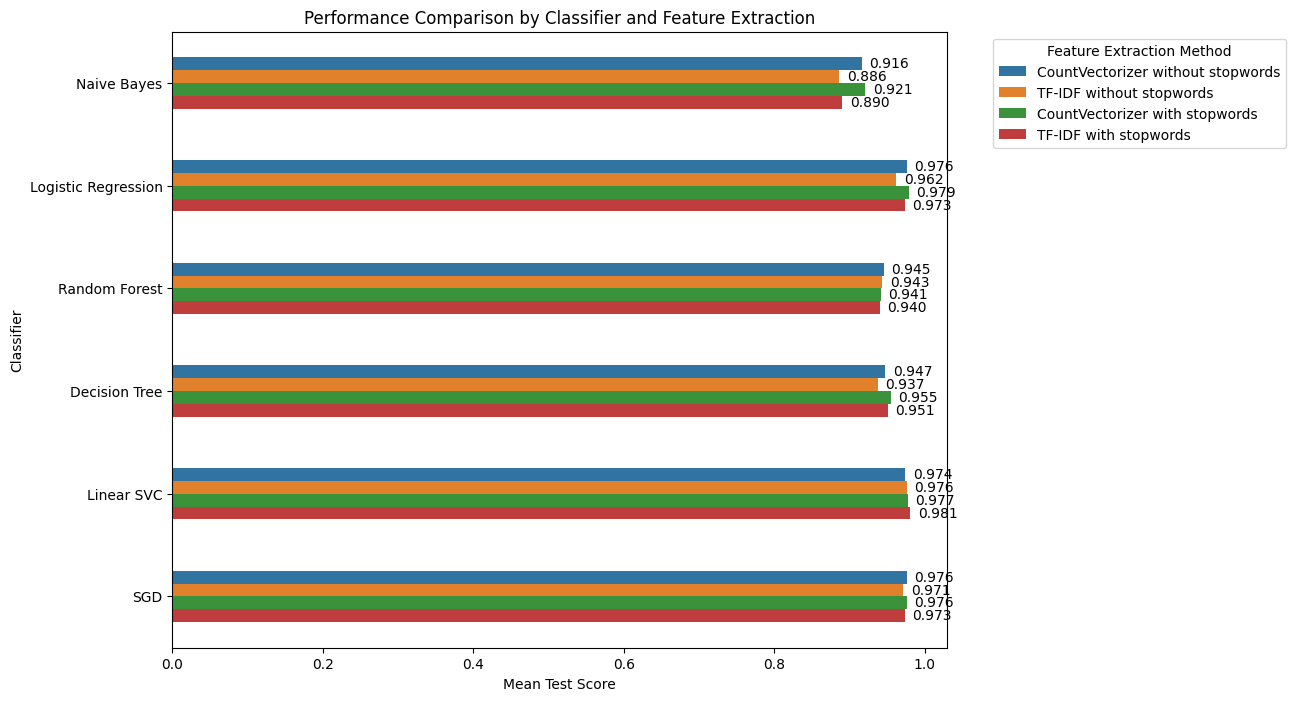

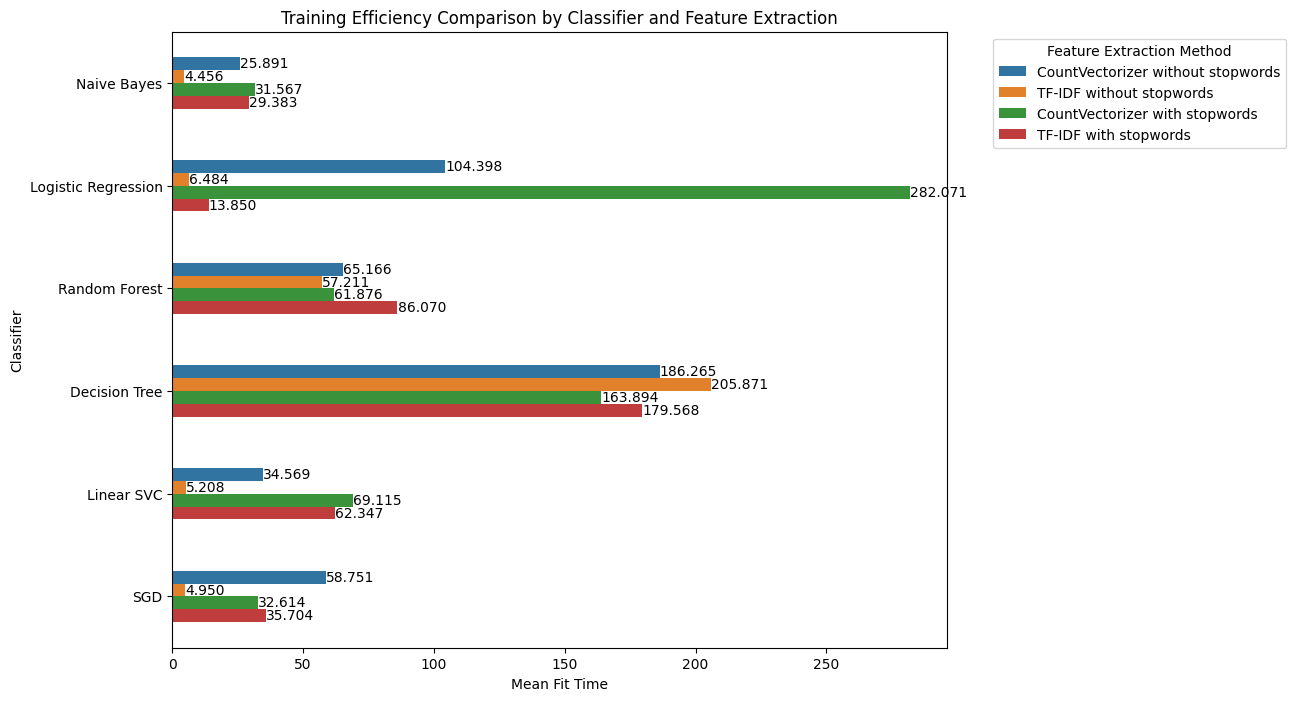

In [834]:
from helpers import plot_comparison_by_classifier_and_feature_extraction

# Step 1: Calculate the maximum mean_test_score for each feature_extraction group
max_scores = grid_research_results_df.groupby(['feature_extraction', 'classifier'])['mean_test_score'].max().reset_index()

# Merge this info back to the DataFrame to identify the rows to annotate
annot_data = pd.merge(grid_research_results_df, max_scores, how='inner', on=['feature_extraction', 'classifier', 'mean_test_score'])

plot_comparison_by_classifier_and_feature_extraction(annot_data, 'mean_test_score')

plot_comparison_by_classifier_and_feature_extraction(annot_data, 'mean_fit_time')

### Visualizing results per classifier

We will use a custom function <b>*visualize_classifier_results*</b> to visualize the performance and training efficiency of a classifier using different vectorization techniques, parameter configurations, and stopword settings. This function accepts two parameters: a dataframe and the name of a classifier.

The dataframe should contain the following columns:
- Vectorizer: The vectorization technique used (TF-IDF or CountVectorizer).
- use_idf: Whether IDF was used (True/False or None).
- C: The regularization parameter (if applicable).
- ngram_range: The n-gram range used.
- Stopwords: Whether stopwords were included ('Yes' or 'No').
- Mean Test Score: The mean test accuracy of the model.
- Mean Fit Time: The mean training time of the model.

In [401]:
# import pandas as pd
from helpers import visualize_classifier_results

# Building a dataframe with combined results of Grid Search for Logistic Regression classifier
# Data for TF-IDF without stopwords
tfidf_without_stopwords_data = {
    'Vectorizer': ['TF-IDF'] * 9,
    'C': [0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10],
    'ngram_range': [(1, 1), (1, 2), (1, 3), (1, 1), (1, 2), (1, 3), (1, 1), (1, 2), (1, 3)],
    'With Stopwords': [False] * 9,
    'Mean Test Score': [0.932039, 0.925523, 0.910770, 0.961222, 0.954383, 0.937804, 0.973324, 0.966772, 0.952413],
    'Mean Fit Time': [8.492136, 60.116720, 136.183078, 7.689603, 77.170383, 171.275960, 9.792086, 93.966036, 246.964605]
}

# Data for CountVectorizer without stopwords
count_vectorizer_without_stopwords_data = {
    'Vectorizer': ['CountVectorizer'] * 9,
    'C': [0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10],
    'ngram_range': [(1, 1), (1, 2), (1, 3), (1, 1), (1, 2), (1, 3), (1, 1), (1, 2), (1, 3)],
    'With Stopwords': [False] * 9,
    'Mean Test Score': [0.973969, 0.976081, 0.974076, 0.973217, 0.976117, 0.974792, 0.972751, 0.976081, 0.974506],
    'Mean Fit Time': [9.748505, 99.075391, 223.123067, 11.951553, 104.398353, 240.791584, 11.473408, 113.312856, 278.287383]
}

# Data for TF-IDF with stopwords
tfidf_with_stopwords_data = {
    'Vectorizer': ['TF-IDF'] * 9,
    'C': [0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10],
    'ngram_range': [(1, 1), (1, 2), (1, 3), (1, 1), (1, 2), (1, 3), (1, 1), (1, 2), (1, 3)],
    'With Stopwords': [True] * 9,
    'Mean Test Score': [0.928531, 0.919543, 0.890970, 0.960899, 0.957713, 0.939809, 0.973002, 0.972715, 0.960577],
    'Mean Fit Time': [8.659675, 52.350396, 133.484946, 10.883000, 73.376433, 220.909391, 13.849960, 111.147235, 313.496288]
}

# Data for CountVectorizer with stopwords
count_vectorizer_with_stopwords_data = {
    'Vectorizer': ['CountVectorizer'] * 9,
    'C': [0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10],
    'ngram_range': [(1, 1), (1, 2), (1, 3), (1, 1), (1, 2), (1, 3), (1, 1), (1, 2), (1, 3)],
    'With Stopwords': [True] * 9,
    'Mean Test Score': [0.974828, 0.977979, 0.976905, 0.974541, 0.978230, 0.977442, 0.973933, 0.978552, 0.977442],
    'Mean Fit Time': [25.290289, 200.126111, 565.767856, 33.671354, 246.567712, 728.198246, 39.515429, 282.071462, 778.800085]
}

# Creating DataFrames
df_tfidf_without_stopwords = pd.DataFrame(tfidf_without_stopwords_data)
df_count_vectorizer_without_stopwords = pd.DataFrame(count_vectorizer_without_stopwords_data)
df_tfidf_with_stopwords = pd.DataFrame(tfidf_with_stopwords_data)
df_count_vectorizer_with_stopwords = pd.DataFrame(count_vectorizer_with_stopwords_data)

# Combining all DataFrames
lr_combined_df = pd.concat([
    df_tfidf_without_stopwords,
    df_count_vectorizer_without_stopwords,
    df_tfidf_with_stopwords,
    df_count_vectorizer_with_stopwords
], ignore_index=True)

In [454]:
def visualize_classifier_results_with_params(df, classifier_name, hue_param, size_param, style_param):
    """
    Visualizes the performance and training efficiency of a classifier using different
    vectorization techniques, parameter configurations, and stopword settings.

    Parameters:
    df (DataFrame): A pandas DataFrame containing the results of classifier models.
                    The DataFrame should have the following columns:
                    - Vectorizer: The vectorization technique used (TF-IDF or CountVectorizer).
                    - use_idf: Whether IDF was used (True/False or None).
                    - C: The regularization parameter (if applicable, or can be None).
                    - alpha: The regularization parameter for SGD, if applicable.
                    - n-gram range: The n-gram range used.
                    - Stopwords: Whether stopwords were included ('Yes' or 'No').
                    - Mean Test Score: The mean test accuracy of the model.
                    - Mean Fit Time: The mean training time of the model.
    classifier_name (str): The name of the classifier to display in the plot titles.
    """
    
    # Set the style and context for the plots
    sns.set(style="whitegrid")
    
    # Filter data for TF-IDF and CountVectorizer separately
    tfidf_df = df[df['Vectorizer'] == 'TF-IDF']
    count_vect_df = df[df['Vectorizer'] == 'CountVectorizer']
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
    
    # Define a color palette (modify colors as needed)
    color_palette = {0.1: 'blue', 1: 'green', 10: 'red', 0.0001: 'purple', 0.001: 'orange', 0: 'red', (1, 1): 'blue', (1, 2): 'green', (1, 3): 'purple'}

    # Plot for TF-IDF with stopwords as size and alpha/C as color
    sns.scatterplot(
        ax=axes[0],
        data=tfidf_df,
        x='Mean Fit Time',
        y='Mean Test Score',
        hue=hue_param, 
        style=style_param,
        size=size_param, 
        sizes=(50, 150),  # Set size range
        palette=color_palette,  # Color palette for alpha or C
        legend='full'
    )
    
    # Plot for CountVectorizer with stopwords as size and alpha/C as color
    sns.scatterplot(
        ax=axes[1],
        data=count_vect_df,
        x='Mean Fit Time',
        y='Mean Test Score',
        hue=hue_param,  
        style=style_param,
        size=size_param,  
        sizes=(50, 150),  # Set size range
        palette=color_palette,  # Color palette for alpha or C
        legend='full'
    )
    
    # Set titles and labels
    axes[0].set_title(f'{classifier_name} Performance with TF-IDF Vectorizer')
    axes[0].set_xlabel('Mean Fit Time (seconds)')
    axes[0].set_ylabel('Mean Test Score')
    
    axes[1].set_title(f'{classifier_name} Performance with CountVectorizer')
    axes[1].set_xlabel('Mean Fit Time (seconds)')
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


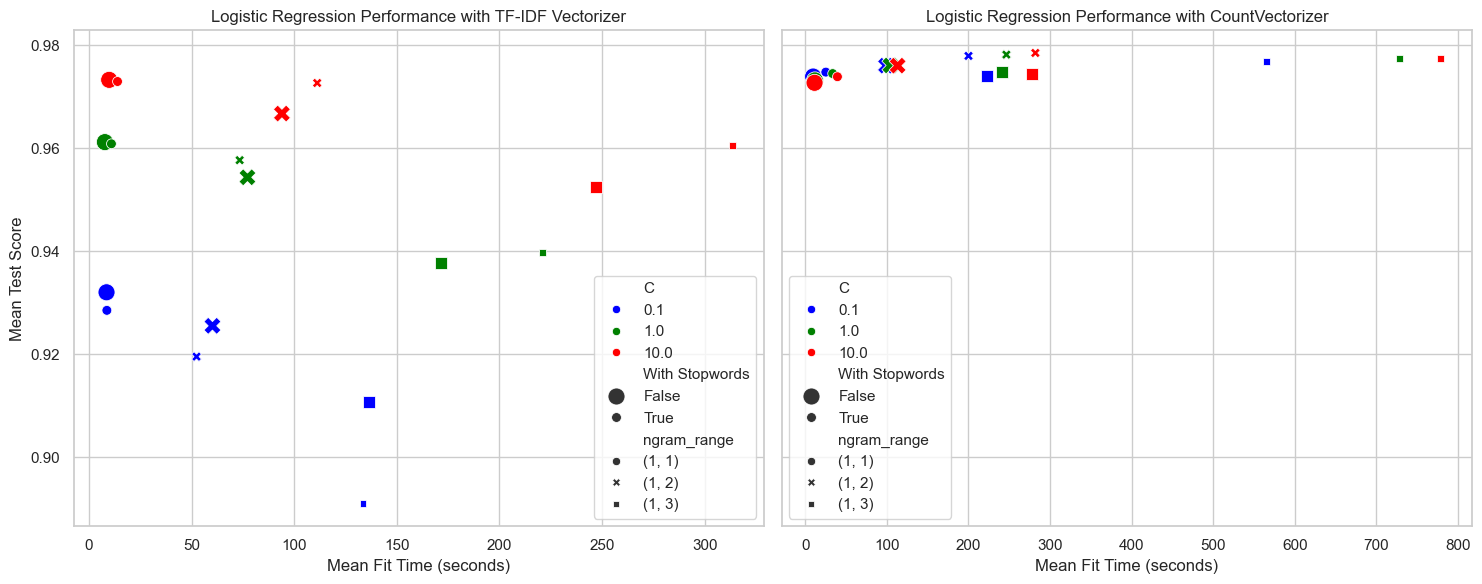

In [439]:
visualize_classifier_results_with_params(lr_combined_df, 'Logistic Regression', 'C', 'With Stopwords', 'ngram_range')

In [407]:
# Building a dataframe with combined results of Grid Search for Naive Bayes classifier
# Data for TF-IDF without stopwords
nb_tfidf_without_stopwords_data = {
    'Vectorizer': ['TF-IDF'] * 6,
    'use_idf': [True, False, True, False, True, False],
    'ngram_range': [(1, 1), (1, 1), (1, 2), (1, 2), (1, 3), (1, 3)],
    'With Stopwords': [False] * 6,
    'Mean Test Score': [0.881266, 0.886171, 0.858207, 0.867659, 0.857813, 0.864795],
    'Mean Fit Time': [5.193389, 4.816371, 30.031484, 26.132051, 71.364222, 62.045584]
}

# Data for CountVectorizer without stopwords
nb_count_vectorizer_without_stopwords_data = {
    'Vectorizer': ['CountVectorizer'] * 3,
    'use_idf': [None] * 3,  # Not applicable for CountVectorizer
    'ngram_range': [(1, 1), (1, 2), (1, 3)],
    'With Stopwords': [False] * 3,
    'Mean Test Score': [0.910985, 0.915998, 0.905972],
    'Mean Fit Time': [4.333299, 25.890844, 60.133995]
}

# Data for TF-IDF with stopwords
nb_tfidf_with_stopwords_data = {
    'Vectorizer': ['TF-IDF'] * 6,
    'use_idf': [True, False, True, False, True, False],
    'ngram_range': [(1, 1), (1, 1), (1, 2), (1, 2), (1, 3), (1, 3)],
    'With Stopwords': [True] * 6,
    'Mean Test Score': [0.882340, 0.879941, 0.866084, 0.890433, 0.858171, 0.888750],
    'Mean Fit Time': [6.732835, 6.575809, 34.054101, 29.382821, 86.841199, 76.210045]
}

# Data for CountVectorizer with stopwords
nb_count_vectorizer_with_stopwords_data = {
    'Vectorizer': ['CountVectorizer'] * 3,
    'use_idf': [None] * 3,  # Not applicable for CountVectorizer
    'ngram_range': [(1, 1), (1, 2), (1, 3)],
    'With Stopwords': [True] * 3,
    'Mean Test Score': [0.910699, 0.920724, 0.910054],
    'Mean Fit Time': [7.745594, 31.566670, 78.439710]
}

# Creating DataFrames
nb_df_tfidf_without_stopwords = pd.DataFrame(nb_tfidf_without_stopwords_data)
nb_df_count_vectorizer_without_stopwords = pd.DataFrame(nb_count_vectorizer_without_stopwords_data)
nb_df_tfidf_with_stopwords = pd.DataFrame(nb_tfidf_with_stopwords_data)
nb_df_count_vectorizer_with_stopwords = pd.DataFrame(nb_count_vectorizer_with_stopwords_data)

# Combining all DataFrames
nb_combined_df = pd.concat([
    nb_df_tfidf_without_stopwords,
    nb_df_count_vectorizer_without_stopwords,
    nb_df_tfidf_with_stopwords,
    nb_df_count_vectorizer_with_stopwords
], ignore_index=True)

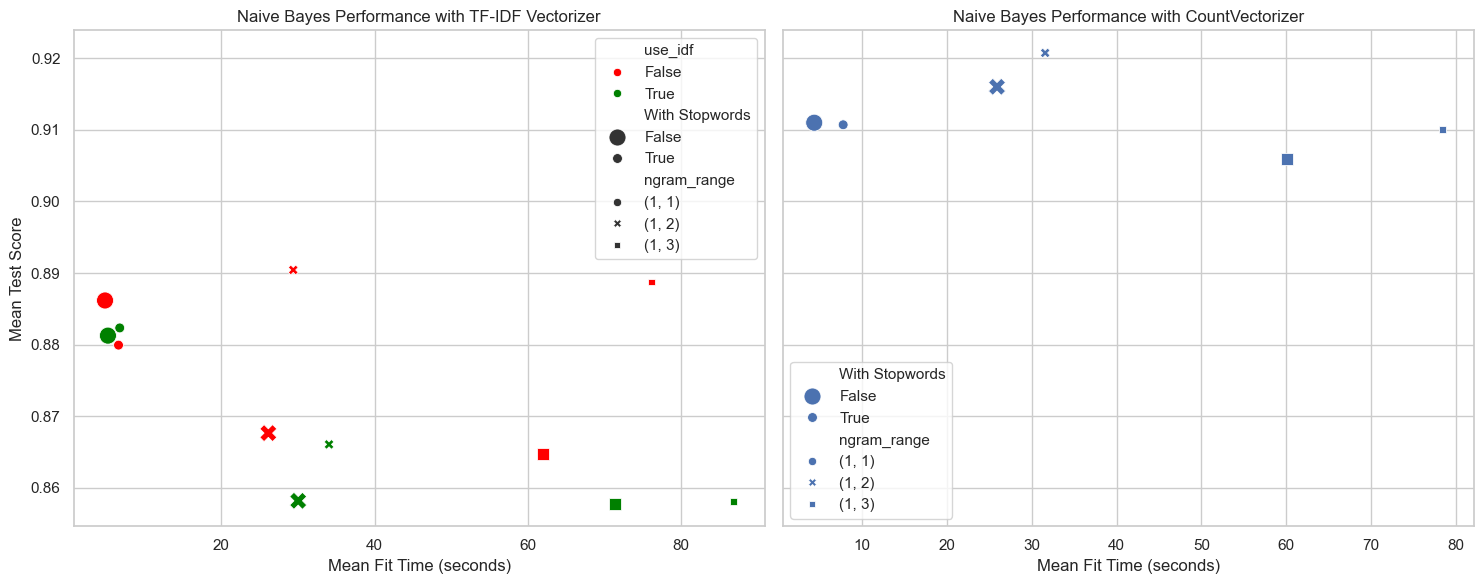

In [455]:
visualize_classifier_results_with_params(nb_combined_df, 'Naive Bayes', 'use_idf', 'With Stopwords', 'ngram_range')

In [449]:
# Building a dataframe with combined results of Grid Search for Random Forest classifier
# Data for TF-IDF without stopwords
rf_tfidf_without_stopwords_data = {
    'Vectorizer': ['TF-IDF'] * 6,
    'use_idf': [True, False, True, False, True, False],
    'ngram_range': [(1, 1), (1, 1), (1, 2), (1, 2), (1, 3), (1, 3)],
    'Stopwords': ['No'] * 6,
    'Mean Test Score': [0.943390, 0.941528, 0.931073, 0.931073, 0.922980, 0.928423],
    'Mean Fit Time': [57.211132, 54.320357, 540.152237, 551.811790, 1116.868884, 1122.735309]
}

# Data for CountVectorizer without stopwords
rf_count_vectorizer_without_stopwords_data = {
    'Vectorizer': ['CountVectorizer'] * 3,
    'use_idf': [None] * 3,  # Not applicable for CountVectorizer
    'ngram_range': [(1, 1), (1, 2), (1, 3)],
    'Stopwords': ['No'] * 3,
    'Mean Test Score': [0.945073, 0.933400, 0.932684],
    'Mean Fit Time': [65.165834, 600.444068, 1168.479469]
}

# Data for TF-IDF with stopwords
rf_tfidf_with_stopwords_data = {
    'Vectorizer': ['TF-IDF'] * 6,
    'use_idf': [True, False, True, False, True, False],
    'ngram_range': [(1, 1), (1, 1), (1, 2), (1, 2), (1, 3), (1, 3)],
    'Stopwords': ['Yes'] * 6,
    'Mean Test Score': [0.940239, 0.938306, 0.935047, 0.933937, 0.929927, 0.932469],
    'Mean Fit Time': [86.070057, 99.316671, 629.195709, 636.637402, 1168.493408, 1054.129885]
}

# Data for CountVectorizer with stopwords
rf_count_vectorizer_with_stopwords_data = {
    'Vectorizer': ['CountVectorizer'] * 3,
    'use_idf': [None] * 3,  # Not applicable for CountVectorizer
    'ngram_range': [(1, 1), (1, 2), (1, 3)],
    'Stopwords': ['Yes'] * 3,
    'Mean Test Score': [0.941098, 0.937804, 0.936730],
    'Mean Fit Time': [61.876218, 419.586939, 1038.506371]
}

# Creating DataFrames
rf_df_tfidf_without_stopwords = pd.DataFrame(rf_tfidf_without_stopwords_data)
rf_df_count_vectorizer_without_stopwords = pd.DataFrame(rf_count_vectorizer_without_stopwords_data)
rf_df_tfidf_with_stopwords = pd.DataFrame(rf_tfidf_with_stopwords_data)
rf_df_count_vectorizer_with_stopwords = pd.DataFrame(rf_count_vectorizer_with_stopwords_data)

# Combining all DataFrames
rf_combined_df = pd.concat([
    rf_df_tfidf_without_stopwords,
    rf_df_count_vectorizer_without_stopwords,
    rf_df_tfidf_with_stopwords,
    rf_df_count_vectorizer_with_stopwords
], ignore_index=True)

ValueError: Could not interpret value `With Stopwords` for `hue`. An entry with this name does not appear in `data`.

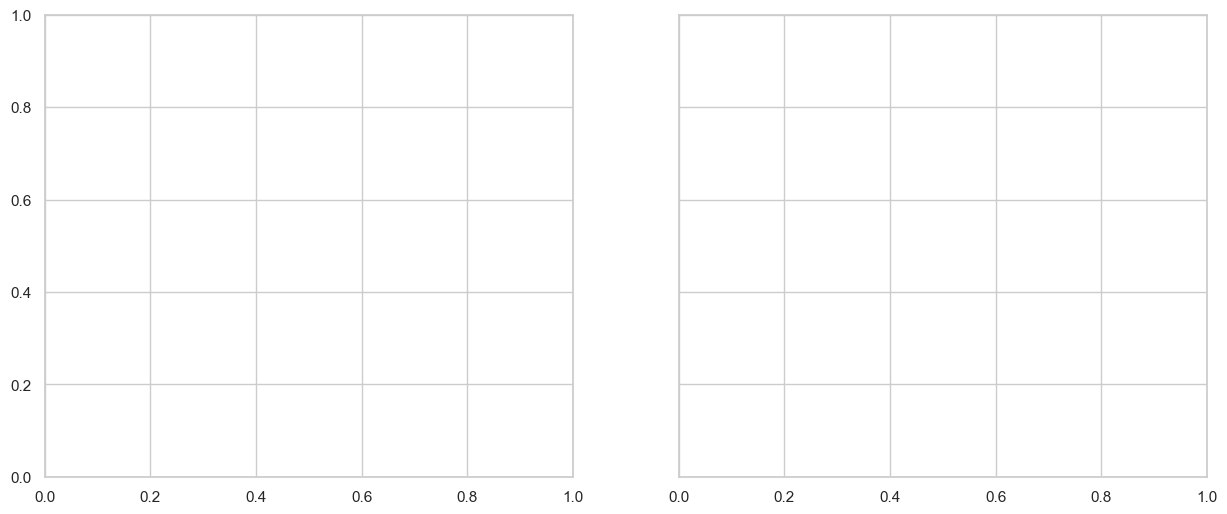

In [457]:
visualize_classifier_results_with_params(rf_combined_df, 'Random Forest', 'With Stopwords','use_idf', 'ngram_range')

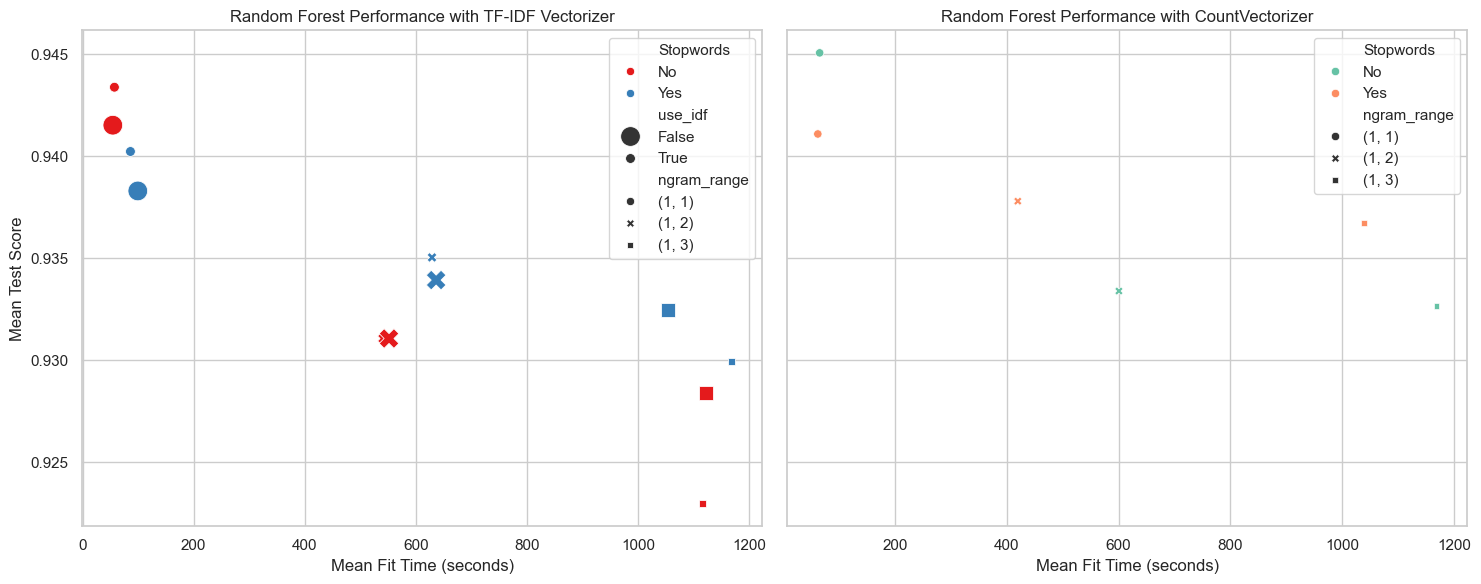

In [376]:
visualize_classifier_results_without_C(rf_combined_df, 'Random Forest', 'use_idf', 'With Stopwords', 'ngram_range')

In [383]:
# Building a dataframe with combined results of Grid Search for Decision Tree classifier
# Data for TF-IDF without stopwords
dt_tfidf_without_stopwords_data = {
    'Vectorizer': ['TF-IDF'] * 6,
    'use_idf': [True, False, True, False, True, False],
    'ngram_range': [(1, 1), (1, 1), (1, 2), (1, 2), (1, 3), (1, 3)],
    'Stopwords': ['No'] * 6,
    'Mean Test Score': [0.930249, 0.933472, 0.933042, 0.937160, 0.928673, 0.936121],
    'Mean Fit Time': [37.055893, 35.082374, 214.775478, 205.870566, 468.121136, 472.441839]
}

# Data for CountVectorizer without stopwords
dt_count_vectorizer_without_stopwords_data = {
    'Vectorizer': ['CountVectorizer'] * 3,
    'use_idf': [None] * 3,  # Not applicable for CountVectorizer
    'ngram_range': [(1, 1), (1, 2), (1, 3)],
    'Stopwords': ['No'] * 3,
    'Mean Test Score': [0.940168, 0.947293, 0.946756],
    'Mean Fit Time': [20.908620, 186.265106, 471.447366]
}

# Data for TF-IDF with stopwords
dt_tfidf_with_stopwords_data = {
    'Vectorizer': ['TF-IDF'] * 6,
    'use_idf': [True, False, True, False, True, False],
    'ngram_range': [(1, 1), (1, 1), (1, 2), (1, 2), (1, 3), (1, 3)],
    'Stopwords': ['Yes'] * 6,
    'Mean Test Score': [0.933687, 0.934474, 0.944679, 0.950516, 0.939200, 0.948224],
    'Mean Fit Time': [40.606298, 40.096880, 183.874289, 179.567954, 537.016317, 524.926615]
}

# Data for CountVectorizer with stopwords
dt_count_vectorizer_with_stopwords_data = {
    'Vectorizer': ['CountVectorizer'] * 3,
    'use_idf': [None] * 3,  # Not applicable for CountVectorizer
    'ngram_range': [(1, 1), (1, 2), (1, 3)],
    'Stopwords': ['Yes'] * 3,
    'Mean Test Score': [0.940776, 0.954812, 0.953953],
    'Mean Fit Time': [25.705448, 163.894212, 484.684423]
}

# Creating DataFrames
dt_df_tfidf_without_stopwords = pd.DataFrame(dt_tfidf_without_stopwords_data)
dt_df_count_vectorizer_without_stopwords = pd.DataFrame(dt_count_vectorizer_without_stopwords_data)
dt_df_tfidf_with_stopwords = pd.DataFrame(dt_tfidf_with_stopwords_data)
dt_df_count_vectorizer_with_stopwords = pd.DataFrame(dt_count_vectorizer_with_stopwords_data)

# Combining all DataFrames
dt_combined_df = pd.concat([
    dt_df_tfidf_without_stopwords,
    dt_df_count_vectorizer_without_stopwords,
    dt_df_tfidf_with_stopwords,
    dt_df_count_vectorizer_with_stopwords
], ignore_index=True)

dt_combined_df

,Vectorizer,use_idf,ngram_range,Stopwords,Mean Test Score,Mean Fit Time
0,TF-IDF,True,"(1, 1)",No,0.930249,37.055893
1,TF-IDF,False,"(1, 1)",No,0.933472,35.082374
2,TF-IDF,True,"(1, 2)",No,0.933042,214.775478
3,TF-IDF,False,"(1, 2)",No,0.937160,205.870566
4,TF-IDF,True,"(1, 3)",No,0.928673,468.121136
5,TF-IDF,False,"(1, 3)",No,0.936121,472.441839
6,CountVectorizer,None,"(1, 1)",No,0.940168,20.908620
7,CountVectorizer,None,"(1, 2)",No,0.947293,186.265106
8,CountVectorizer,None,"(1, 3)",No,0.946756,471.447366
9,TF-IDF,True,"(1, 1)",Yes,0.933687,40.606298


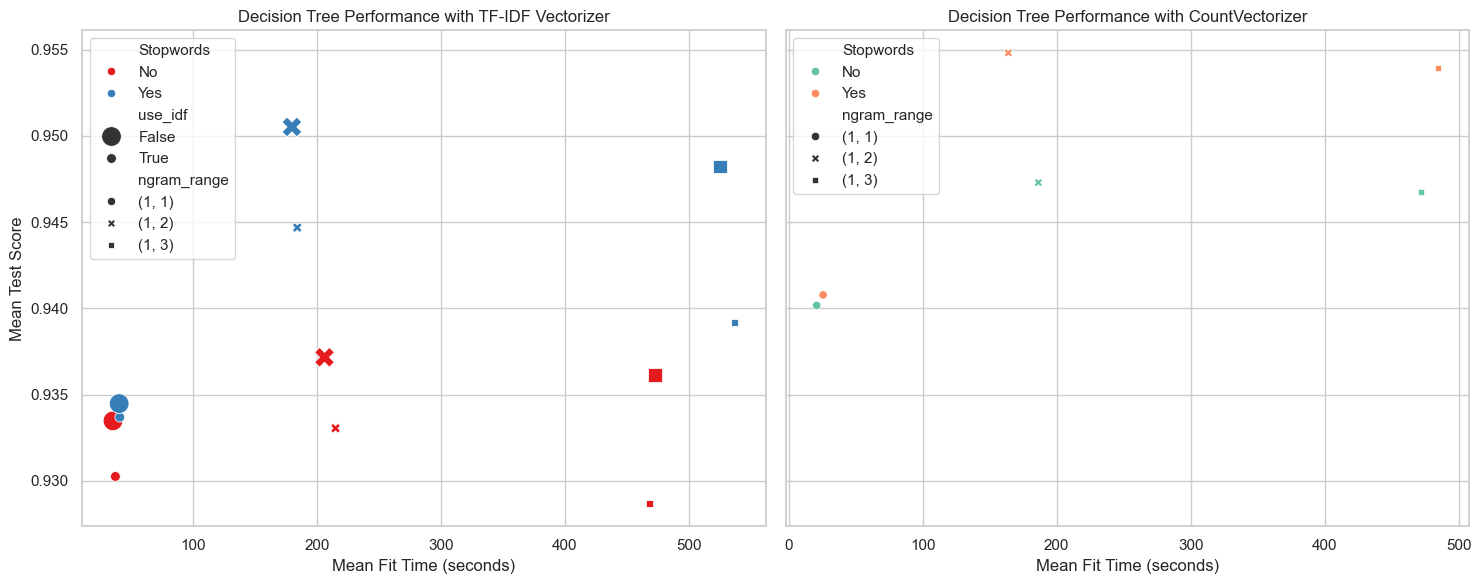

In [384]:
visualize_classifier_results_without_C(dt_combined_df, 'Decision Tree')

### Test the selected model - Logistic Regression classifier with CountVectorizer (without stopwords)

#### Evaluate selected model predictions on the test dataset

In [316]:
def evaluate_model_predictions(test_text_data, test_label_data, model):
    """
    Function to test the selected model on the test dataset and print the output when predictions are incorrect,
    along with the number and percentage of incorrect predictions out of the total.

    Parameters:
    - test_text_data: The text data to use for testing.
    - test_label_data: The actual labels corresponding to the test data.
    - model: Trained model to use for predictions.
    """
    # Model Predictions
    predictions = model.predict(test_text_data)

    # Initialize counters for incorrect predictions
    incorrect_count = 0
    total_count = len(predictions)

    # For each prediction, determine the predicted and actual sentiment
    for i, pred in enumerate(predictions):
        # Get actual label value
        actual_label_value = test_label_data.iloc[i]
        predicted_sentiment = "Real" if pred == 1 else "Fake"
        actual_label = "Real" if actual_label_value == 1 else "Fake"
        
        # Check if the prediction is correct
        if pred != actual_label_value:
            print(f"Review {i}: Predicted Label - {predicted_sentiment}, Actual Label - {actual_label} (Incorrect)")
            incorrect_count += 1

    # Calculate percentage of incorrect predictions
    incorrect_percentage = (incorrect_count / total_count) * 100

    # Print the final count of incorrect predictions with percentage
    print(f"\nTotal Incorrect Predictions: {incorrect_count} out of {total_count} ({incorrect_percentage:.2f}%)")


In [317]:
# from helpers import evaluate_model_predictions

evaluate_model_predictions(test_text_data, test_label_data, best_lr_count_model)

Review 21: Predicted Label - Fake, Actual Label - Real (Incorrect)
Review 107: Predicted Label - Fake, Actual Label - Real (Incorrect)
Review 224: Predicted Label - Real, Actual Label - Fake (Incorrect)
Review 282: Predicted Label - Real, Actual Label - Fake (Incorrect)
Review 289: Predicted Label - Real, Actual Label - Fake (Incorrect)
Review 331: Predicted Label - Real, Actual Label - Fake (Incorrect)
Review 389: Predicted Label - Fake, Actual Label - Real (Incorrect)
Review 398: Predicted Label - Real, Actual Label - Fake (Incorrect)
Review 411: Predicted Label - Real, Actual Label - Fake (Incorrect)
Review 417: Predicted Label - Real, Actual Label - Fake (Incorrect)
Review 441: Predicted Label - Fake, Actual Label - Real (Incorrect)
Review 459: Predicted Label - Fake, Actual Label - Real (Incorrect)
Review 485: Predicted Label - Fake, Actual Label - Real (Incorrect)
Review 511: Predicted Label - Real, Actual Label - Fake (Incorrect)
Review 547: Predicted Label - Real, Actual Label 

In [281]:
def predict_user_input_text(user_input_text, model):
    """
    Predict whether a given news article text is real or fake using the trained model.

    Parameters:
    - user_input_text: str
      The input text (news article) provided by the user.
    - model: Trained model object (Pipeline)
      The trained classification model (Pipeline) used for making predictions.
    """
    # Ensure the input is in the form of a list since the model pipeline expects a list of strings
    user_input_text = [user_input_text]  # Wrapping the input string in a list
    
    # Use the entire model pipeline to transform the input and make a prediction
    prediction = model.predict(user_input_text)[0]
    
    # Interpret the prediction
    predicted_label = "Real" if prediction == 1 else "Fake"
    
    # Output the prediction
    print(f"Predicted Label for the given text: {predicted_label}")


In [ ]:
from helpers import predict_user_input_text

#### Predict user text input with the model biased towards classifying articles as true when they contained the word "Reuters"

In [289]:
best_lr_count_model

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('clf', LogisticRegression(C=1, max_iter=1000))])

In [297]:
user_text = input("Enter news article text to classify: ")
predict_user_input_text(user_text, best_lr_count_model)

Predicted Label for the given text: Fake


#### Predict user text input with the model trained on the dataset that was cleaned from the word "Reuters" in "real" news articles.

In [294]:
best_lr_count_no_reuters_model

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('clf', LogisticRegression(C=0.1, max_iter=1000))])

In [296]:
user_text = input("Enter news article text to classify: ")
predict_user_input_text(user_text, best_lr_count_no_reuters_model)

Predicted Label for the given text: Real
